<a href="https://colab.research.google.com/github/AnantSabharwal/Housing_Price_Kaggle_ML/blob/master/Housing_Price_Dataset_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading Dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anantsabharwal","key":"52b4f31ad606441ab3e8ee085a47c3ea"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Ignore those annoying warnings

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
#import tensorflow_decision_forests as tfdf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.set_option('display.max_columns', None)

## Meta Data

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


## Data Exploration


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

In [ ]:
#df = pd.concat([train, test], axis=0, ignore_index=True)
df = train.copy()

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.describe(include= 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [ ]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
 def check_null_percentage(df):
    missing_info = pd.DataFrame(np.array(df.isnull().sum().sort_values(ascending=False).reset_index())\
                                ,columns=['Columns','Missing_Percentage']).query("Missing_Percentage > 0").set_index('Columns')
    return 100*missing_info/df.shape[0]

In [ ]:
check_null_percentage(df)

Missing_Percentage
Columns                        
PoolQC                99.520548
MiscFeature            96.30137
Alley                 93.767123
Fence                 80.753425
FireplaceQu           47.260274
LotFrontage           17.739726
GarageYrBlt            5.547945
GarageCond             5.547945
GarageType             5.547945
GarageFinish           5.547945
GarageQual             5.547945
BsmtFinType2            2.60274
BsmtExposure            2.60274
BsmtQual               2.534247
BsmtCond               2.534247
BsmtFinType1           2.534247
MasVnrArea             0.547945
MasVnrType             0.547945
Electrical             0.068493

extracting the names of features with atleast one null value

In [ ]:
 features_with_null = [features for features in df.columns if df[features].isnull().sum()>1]

Since there a lot of missing values now we have to find the relationship between missing values and salesprice before we decide on which columns to remove or not

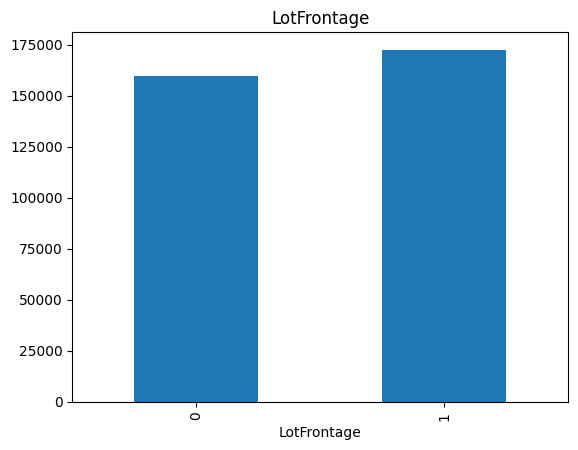

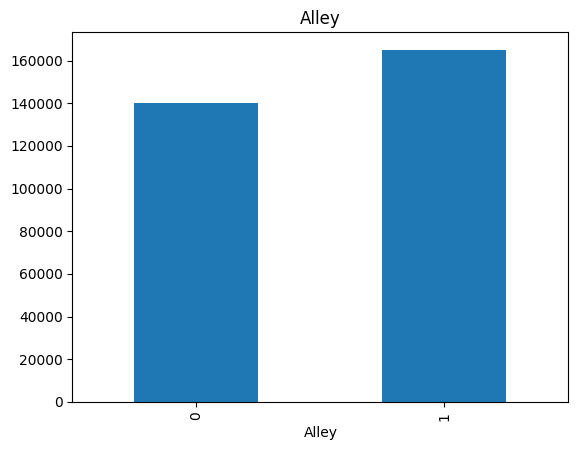

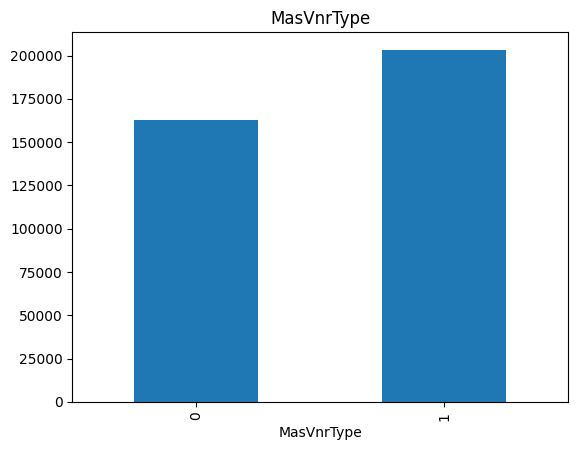

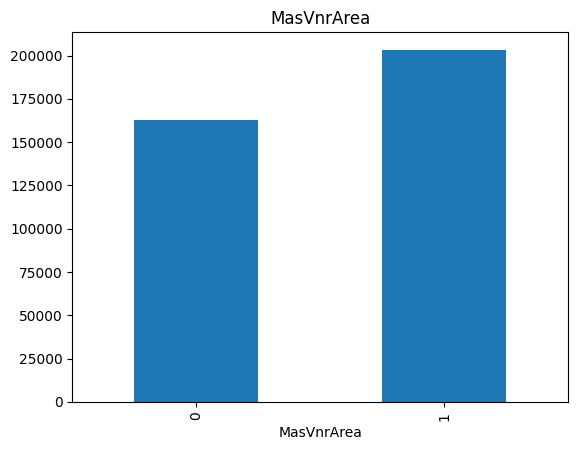

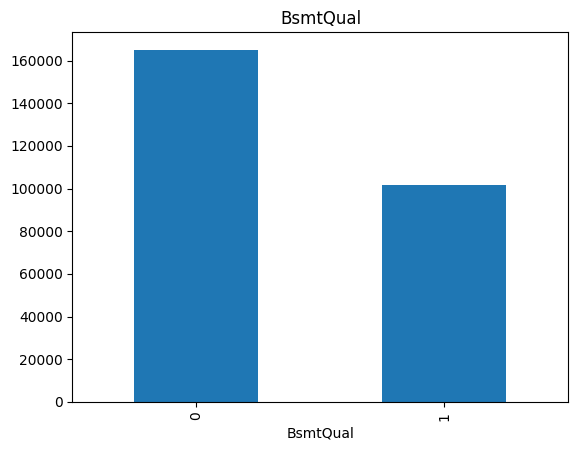

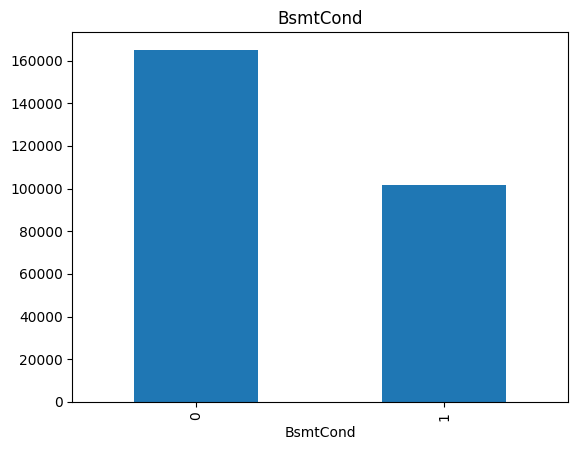

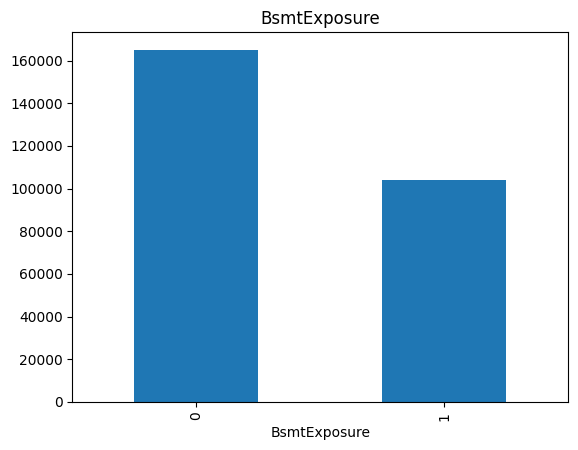

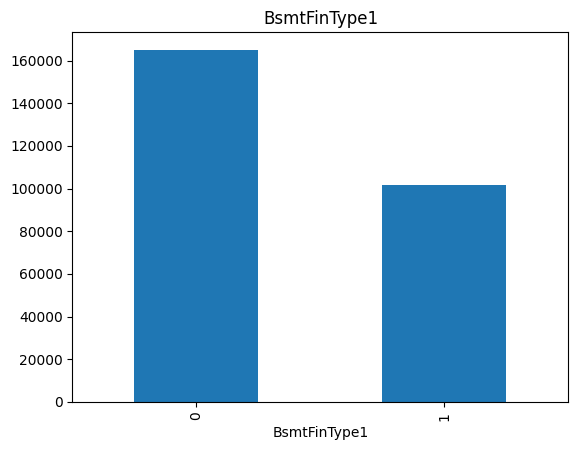

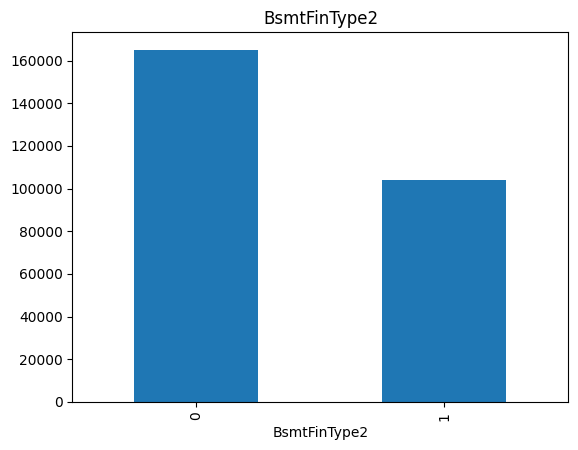

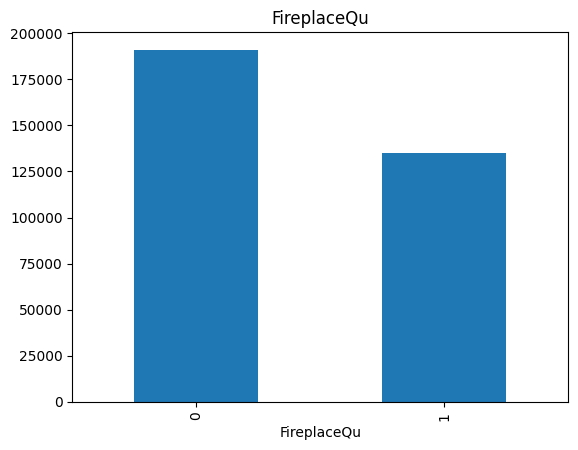

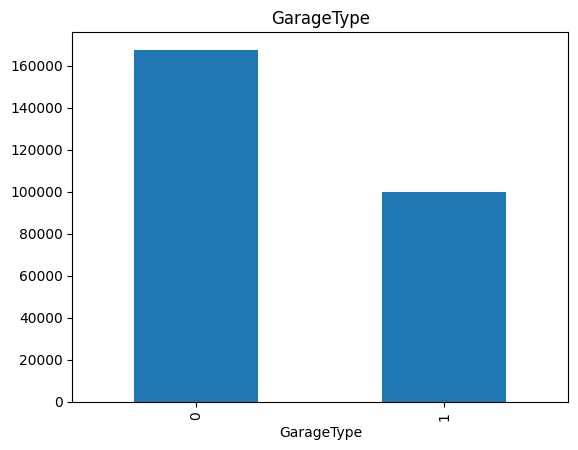

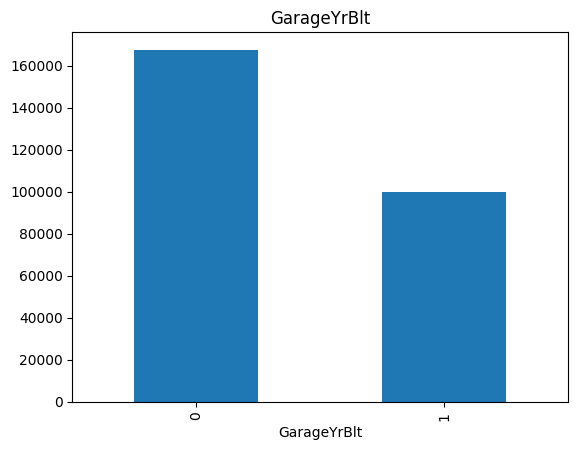

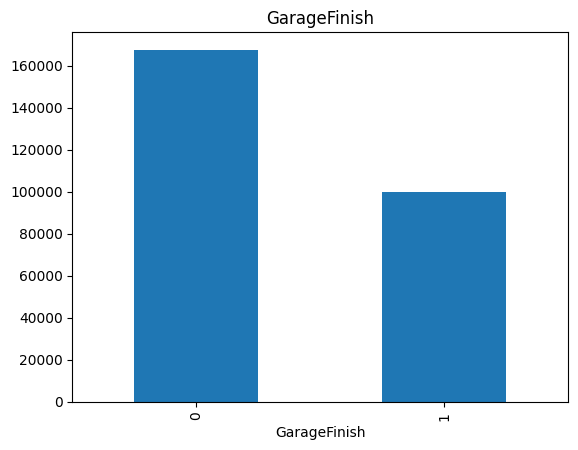

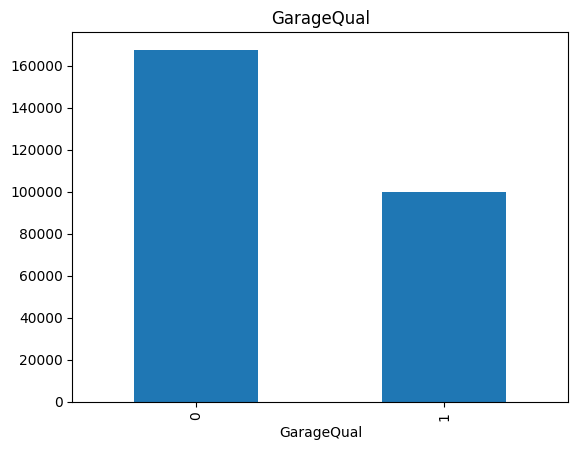

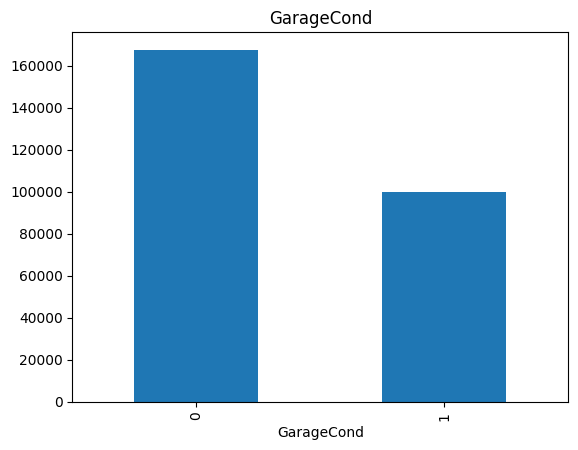

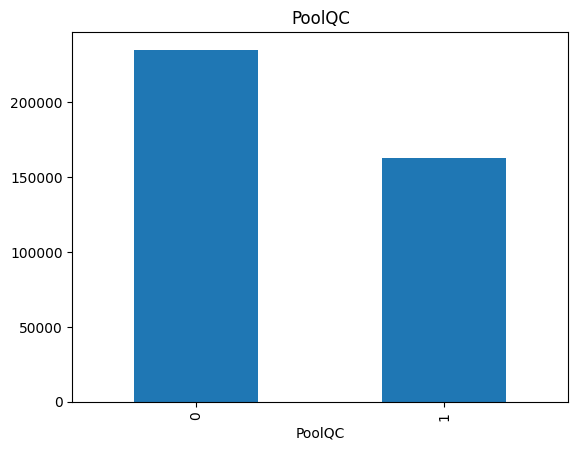

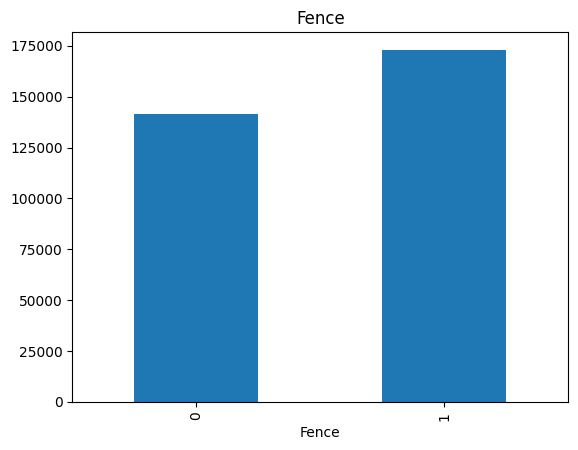

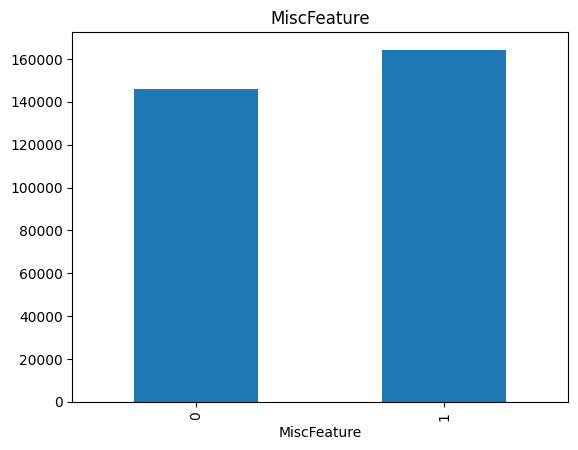

In [ ]:
for feature in features_with_null:
  data = df.copy()
  data[feature] = np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

here we find that the relationship between the null/missing values is clearly visible and therefore we will need to replace them with suitable values.

we also find that

- PoolQC	99.520548
- MiscFeature	96.30137
- Alley	93.767123
- Fence	80.753425
have extremely high amount of missing data however we deal with this later

In [ ]:
#numerical variables

In [ ]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print(f"Number of Numerical Features: {len(numerical_features)}")

Number of Numerical Features: 38


In [ ]:
#datetime variables

In [ ]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for feature in year_feature:
    print(feature+"\n", df[feature].unique())
    print("\n")

YearBuilt
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


YearRemodAdd
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962

In [ ]:
houses_sold_by_year = df['YrSold'].value_counts().sort_index()

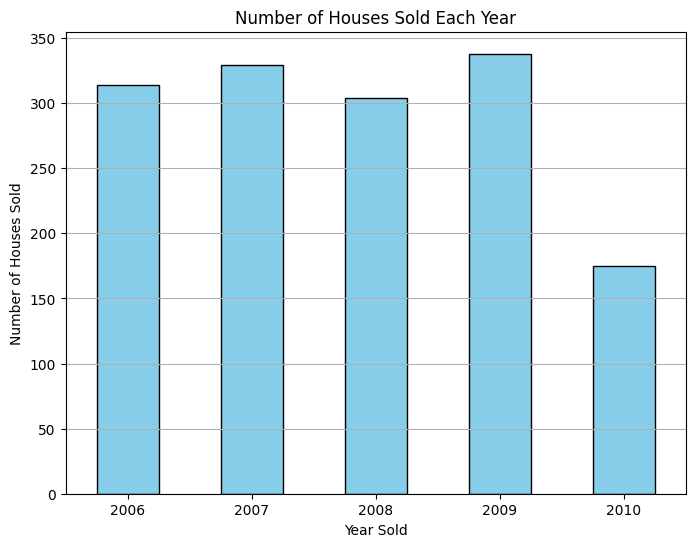

In [ ]:
plt.figure(figsize=(8, 6))
houses_sold_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year Sold')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold Each Year')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'House Price vs YearSold')

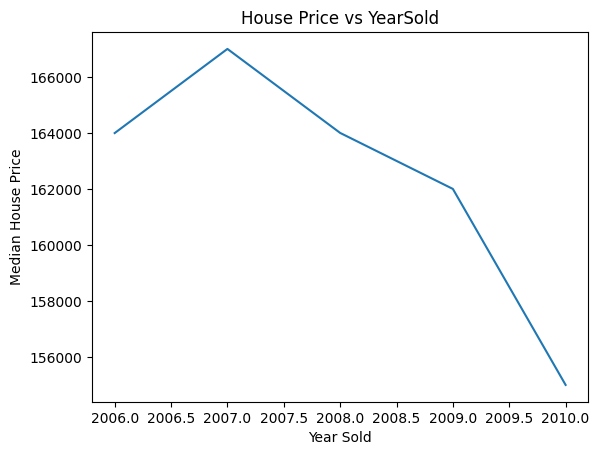

In [ ]:
#now analyzing the median price of the house sold in each year to find a relationship between the year and the house price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

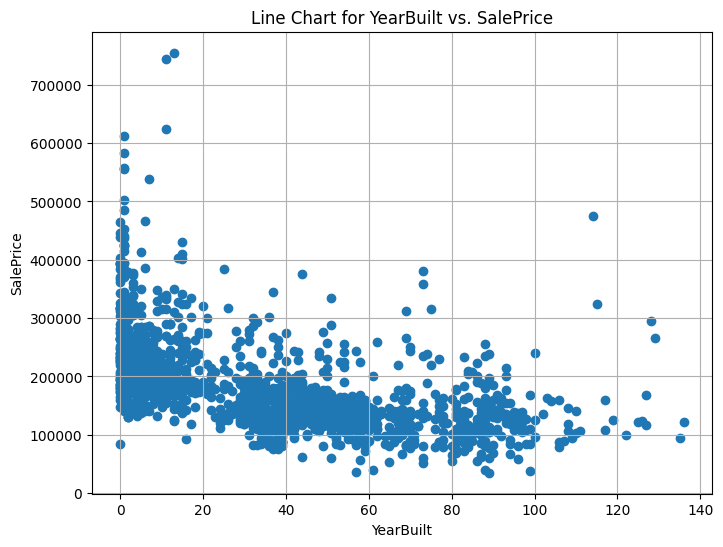

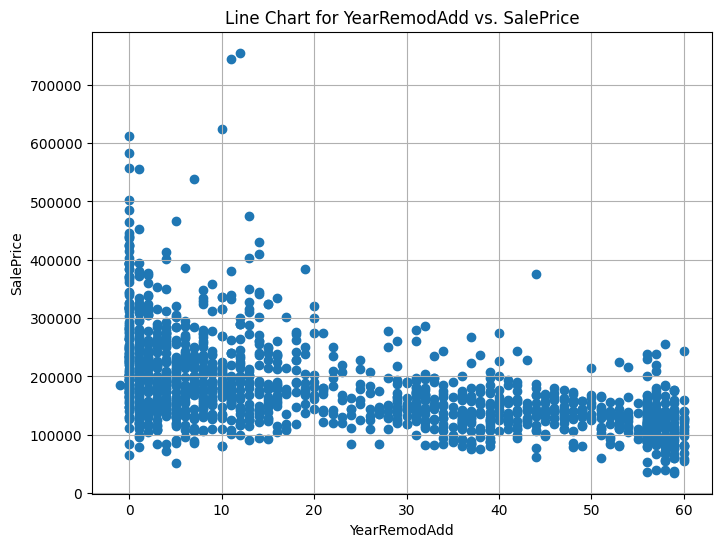

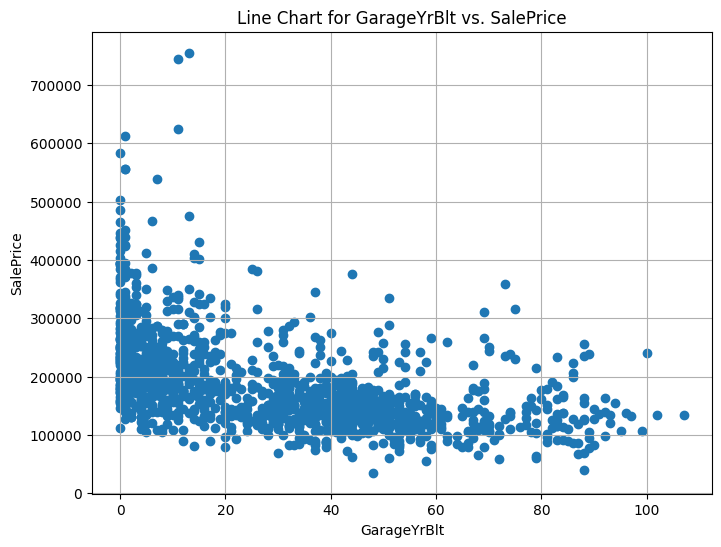

In [ ]:
#this shouldn't be true therefore we look into it a little more
# we now want to find it there is relationship between the price of the house sold and other year features such as
# the year when it was remodeled and all
for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.figure(figsize=(8, 6))
        plt.scatter(data[feature], data['SalePrice'], marker='o', linestyle='-')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(f'Line Chart for {feature} vs. SalePrice')
        plt.grid(True)
        plt.show()

this shows a general sloping trend which makes sense when it comes to the number of years ago when the house was remoddled or the garage was built

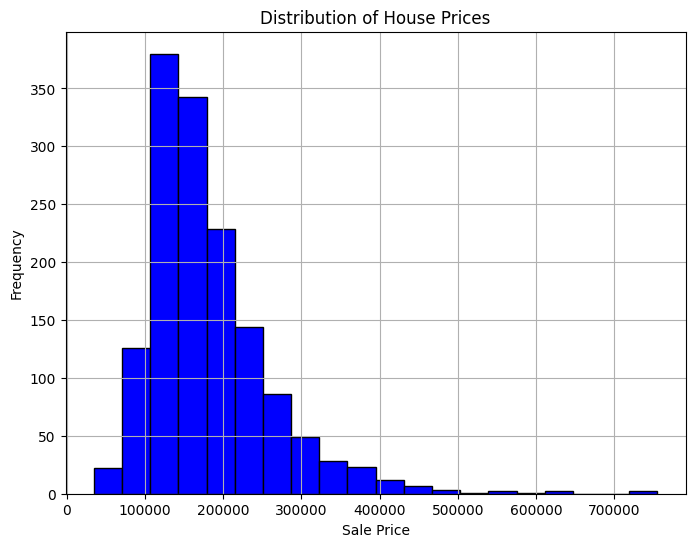

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['SalePrice'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.grid(True)
plt.show()

when we look at the dataset we also notice that numerical variables can have discrete values and therefore they need to ananlyzed as categorical

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<30 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


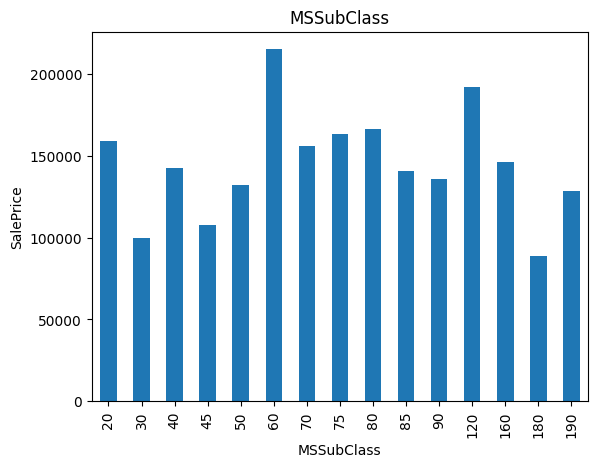

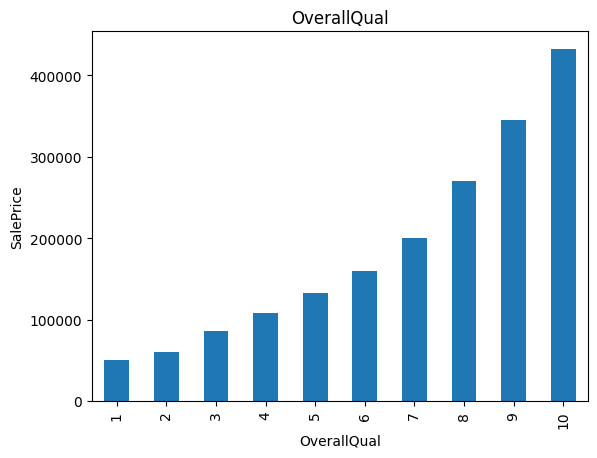

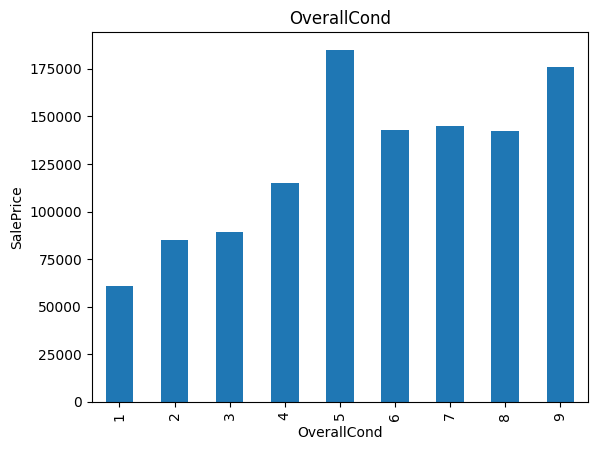

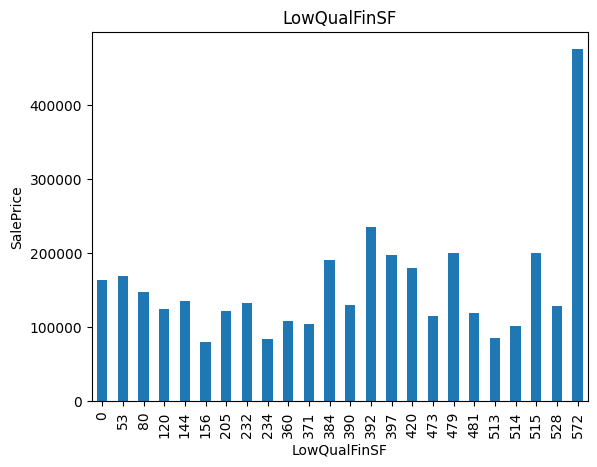

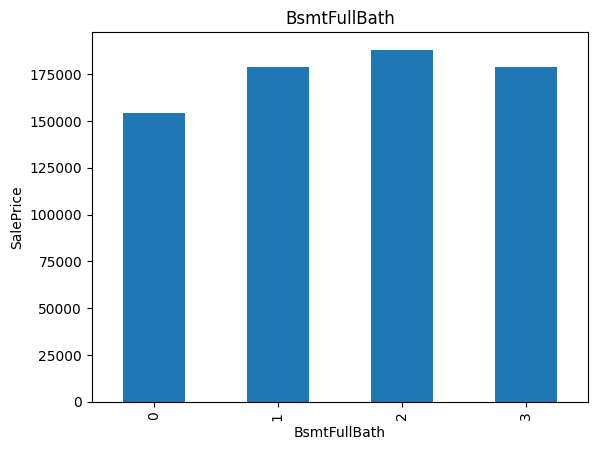

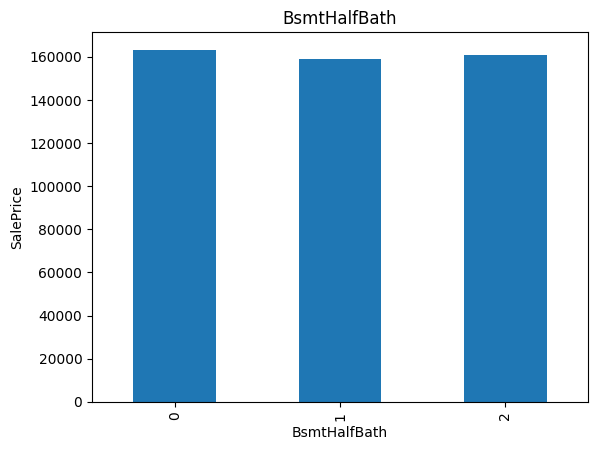

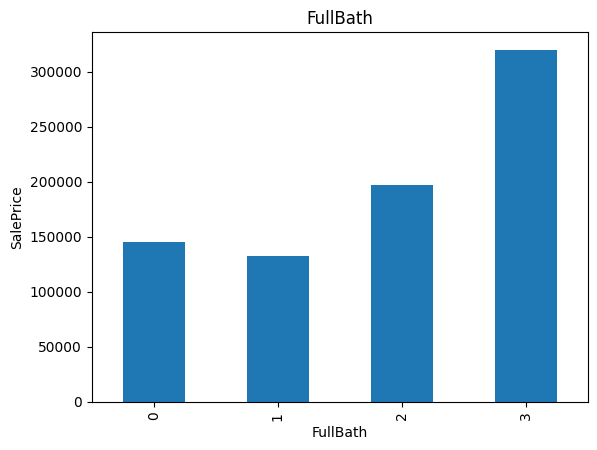

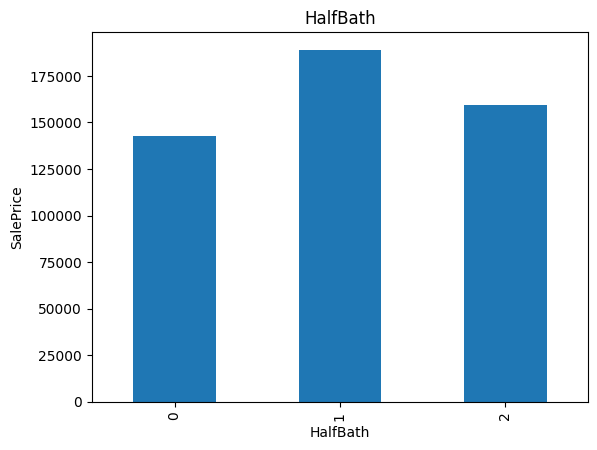

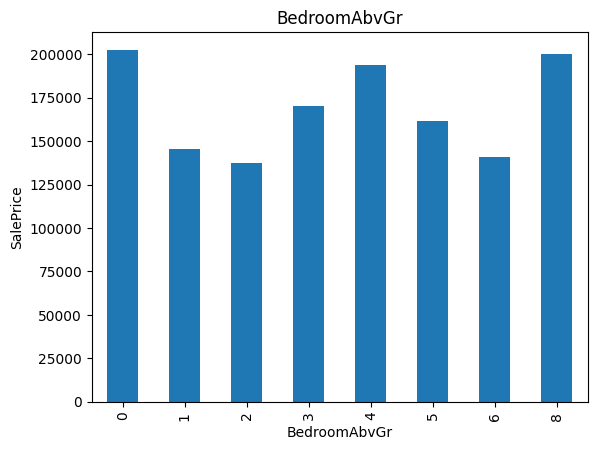

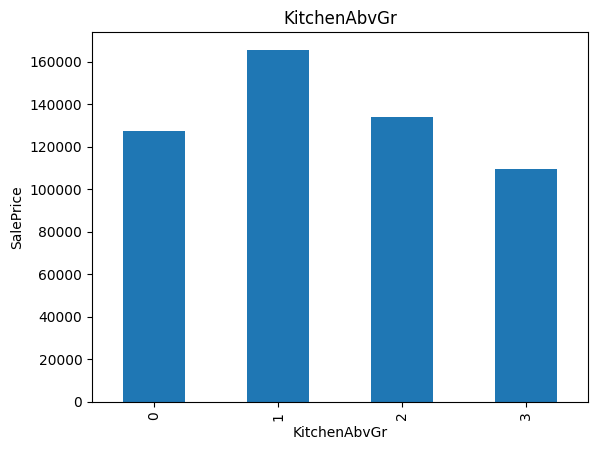

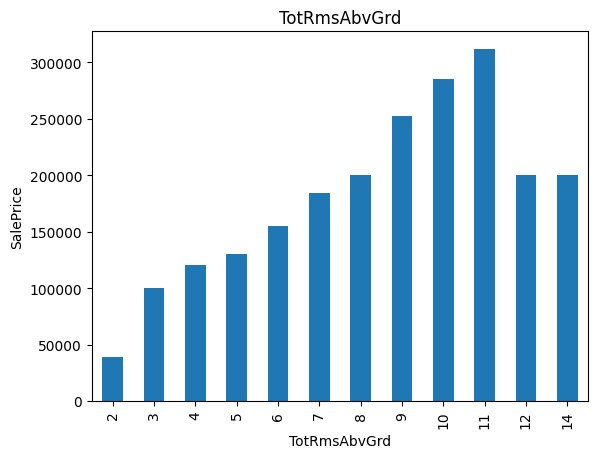

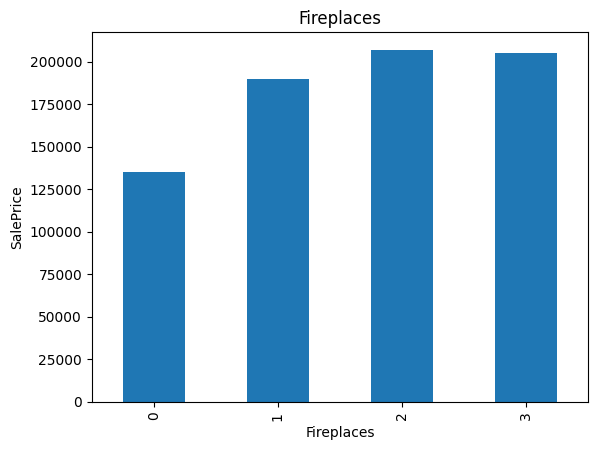

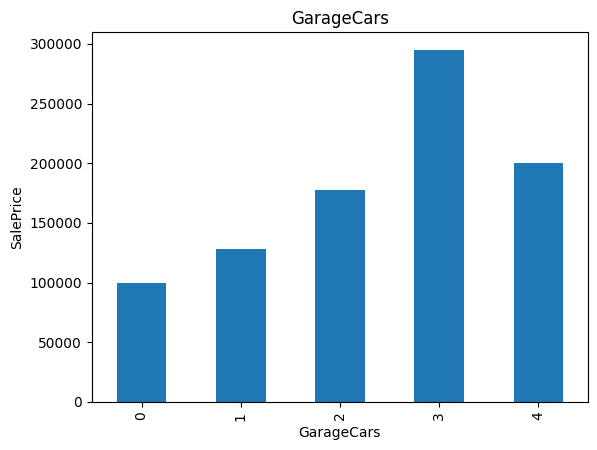

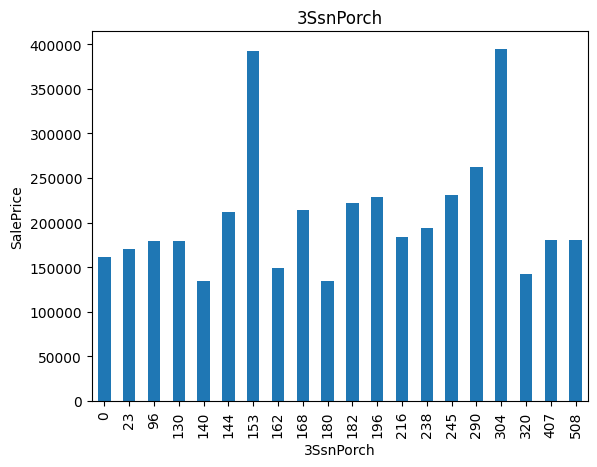

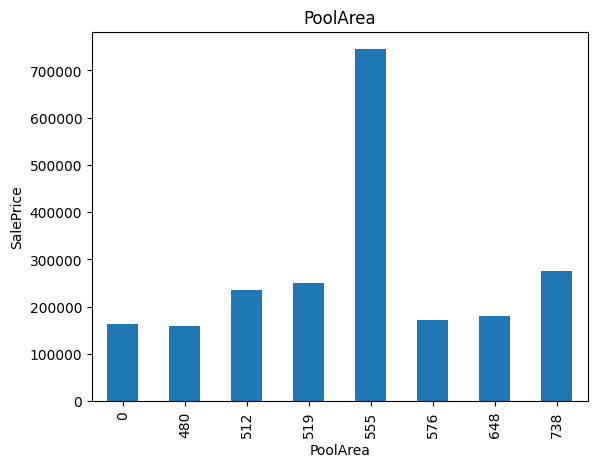

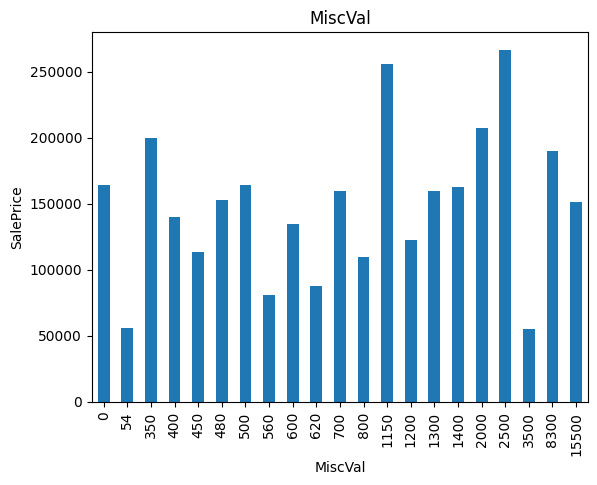

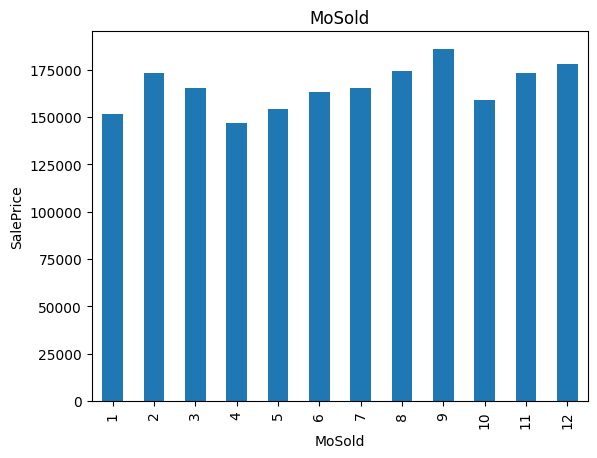

In [ ]:
#plotting graphs to find relationships between them and sales price
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

we end up finding interesting relationships from the following . Here MSSubclass will be changed to an object type during further as on refereing to the metadata we find there is a mapping that exists between the numbers and type of house.

In [ ]:
mssubclass_mapping = {
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '1-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

In [ ]:
df['MSSubClass'] = df['MSSubClass'].map(mssubclass_mapping)

In [ ]:
#we can do the same for continuous variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


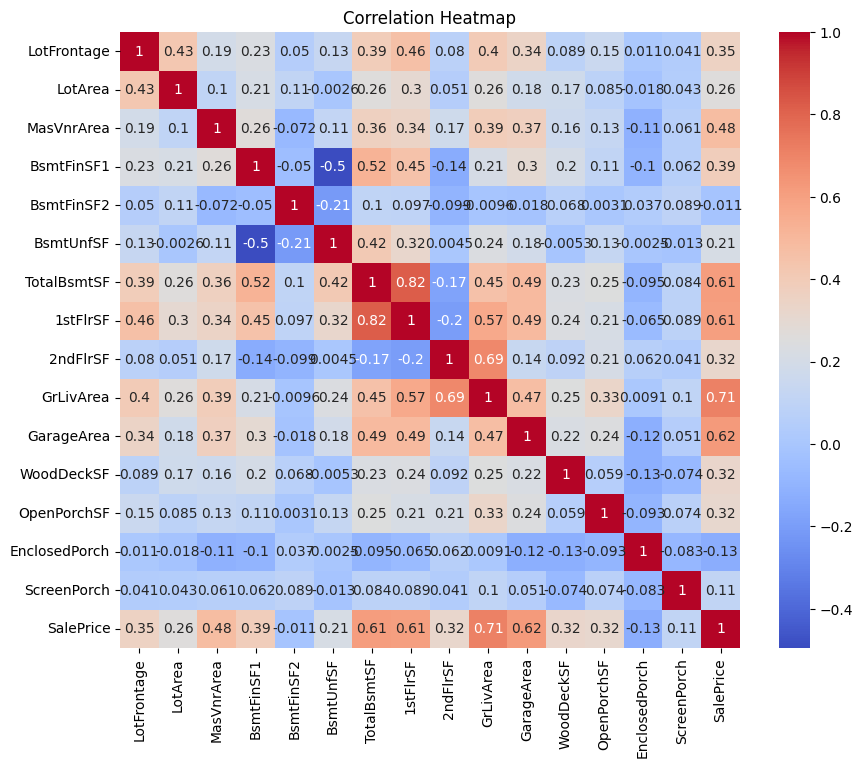

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[continuous_feature].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

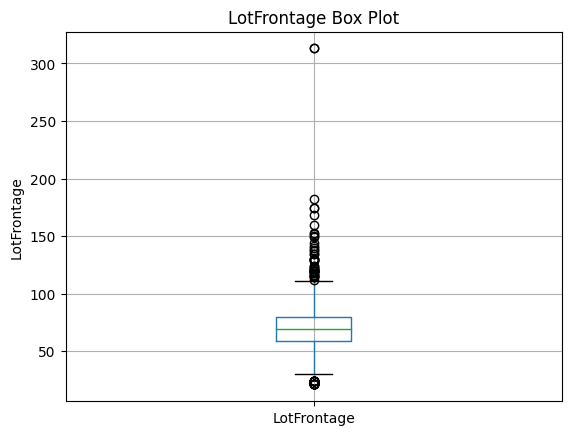

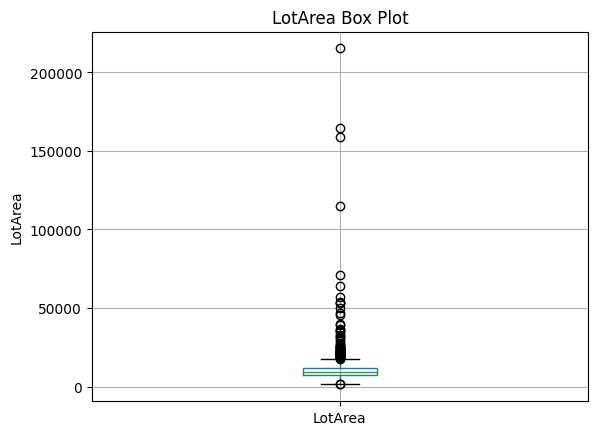

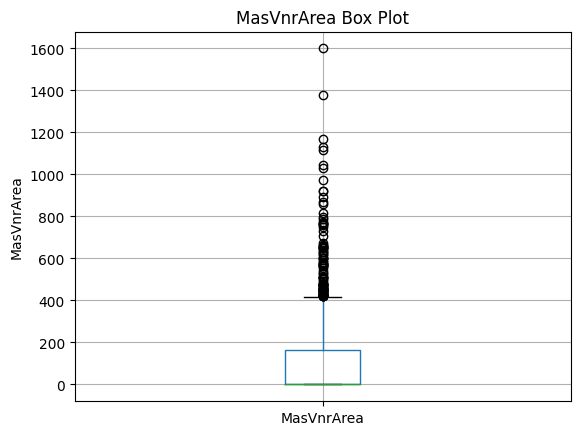

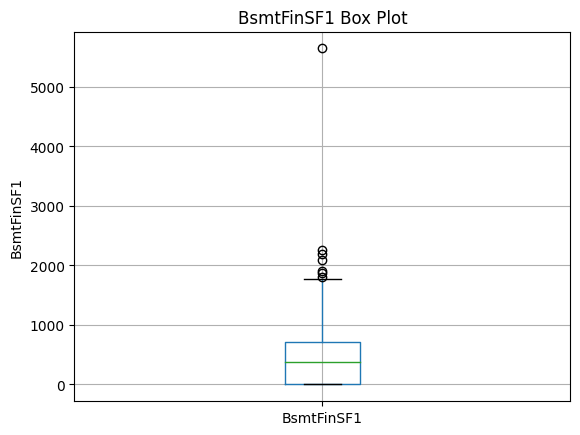

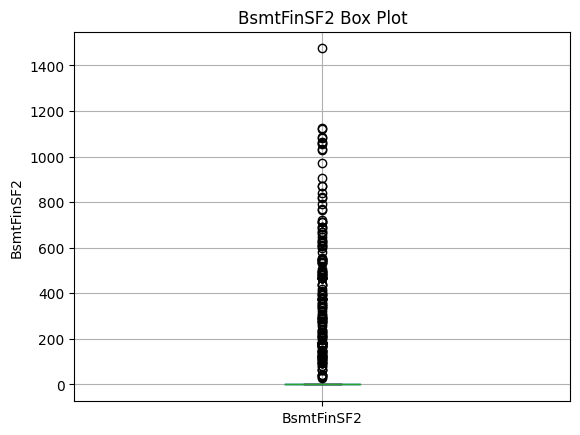

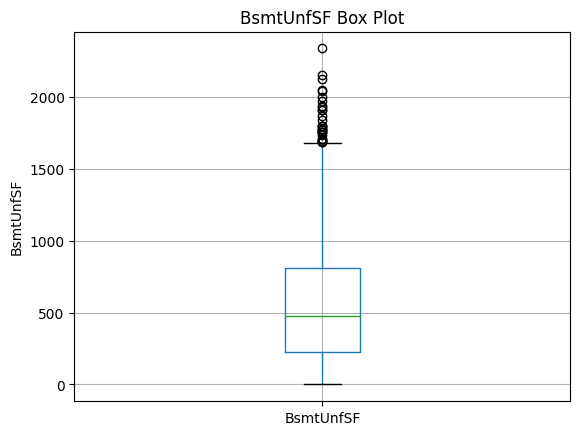

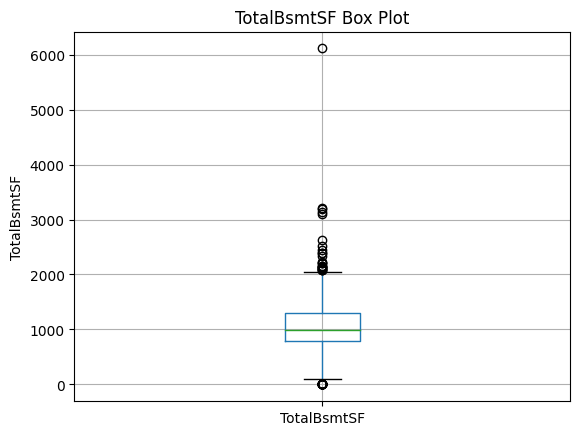

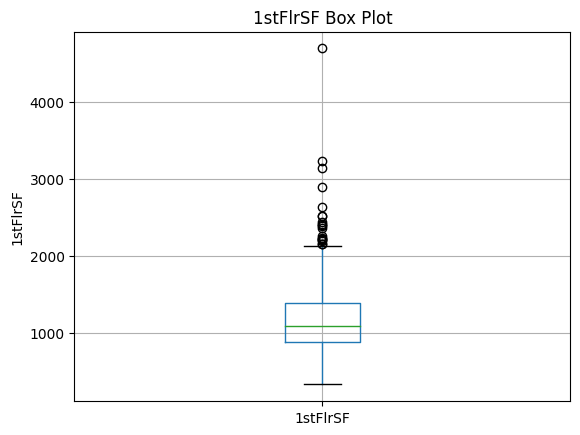

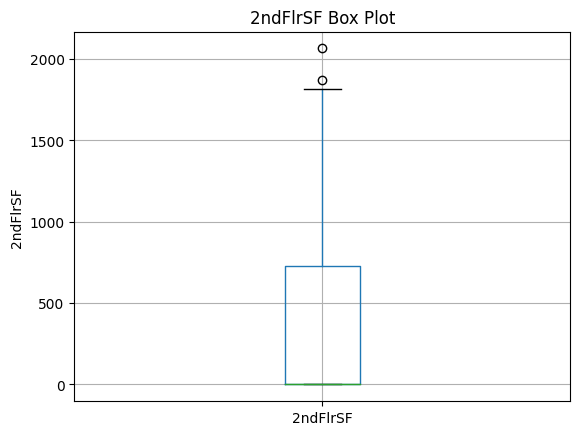

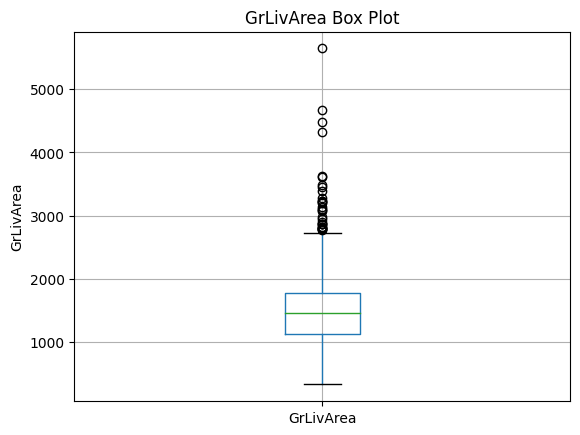

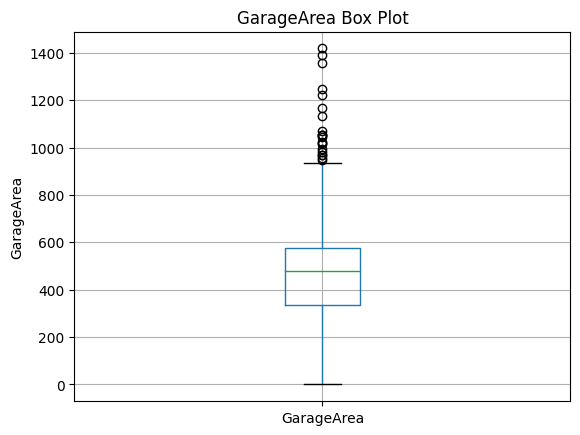

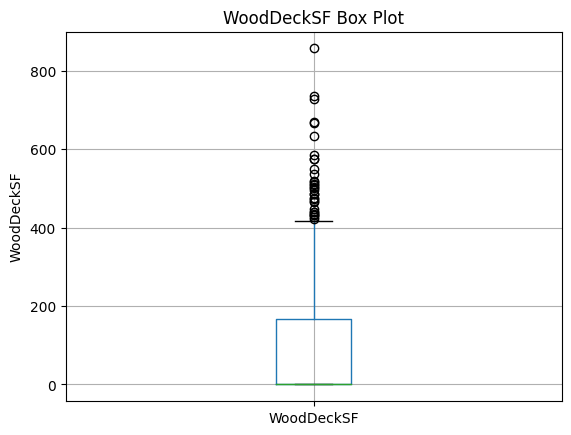

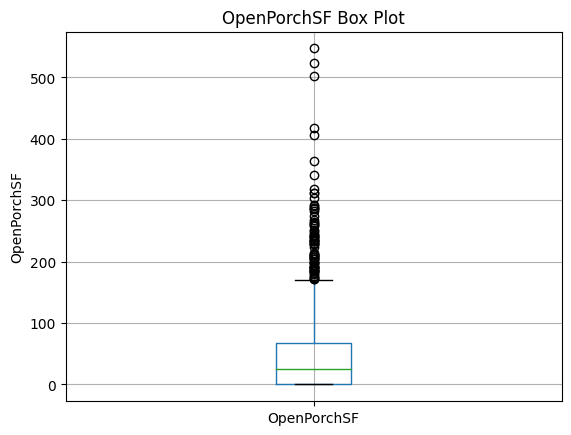

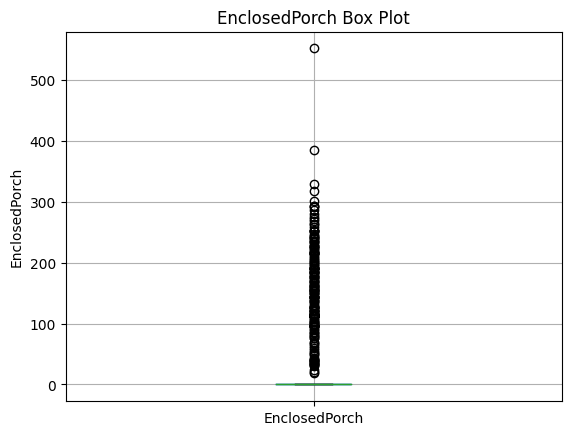

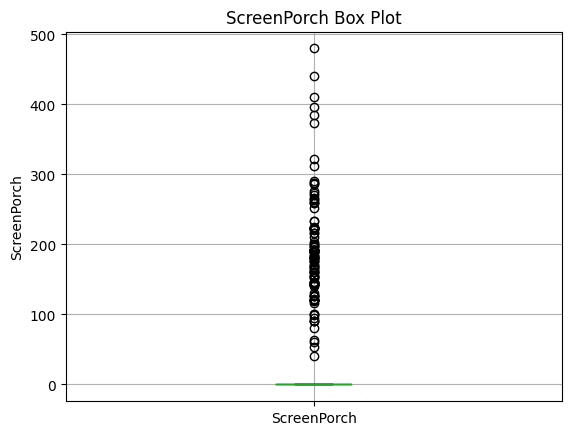

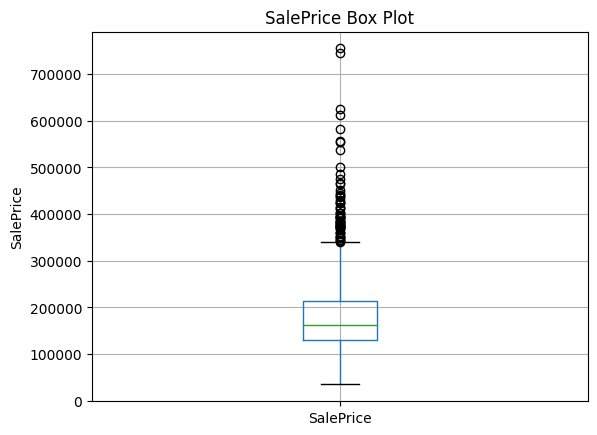

In [ ]:
for feature in continuous_feature:
    data = df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(f"{feature} Box Plot")
    plt.show()

one thing that we analyze from the box plots is the presence of a huge number of outliers in the data. This also has to be dealt with

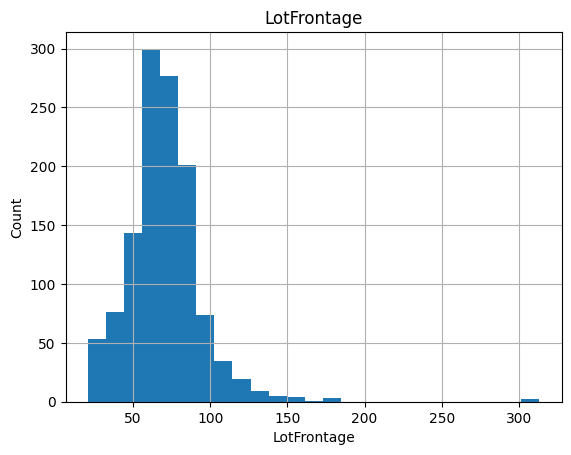

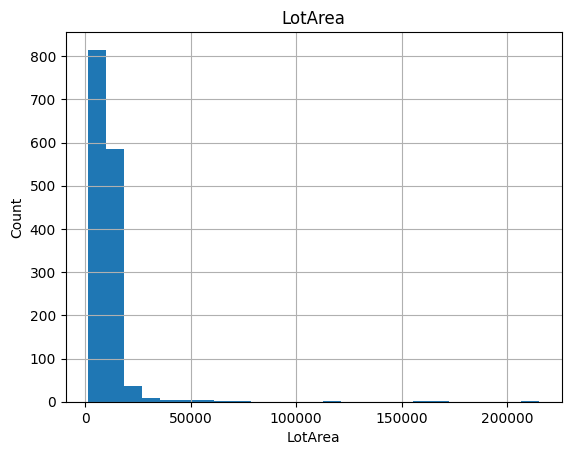

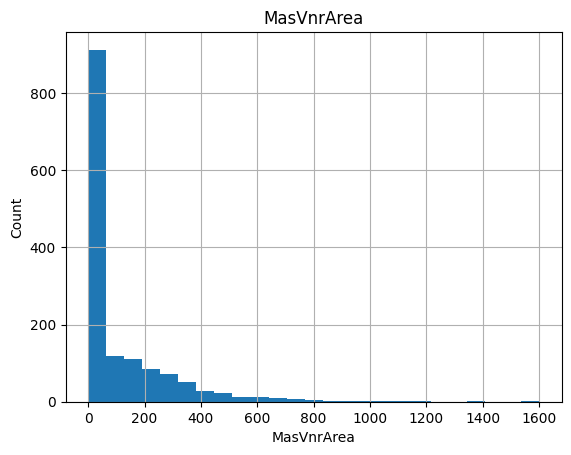

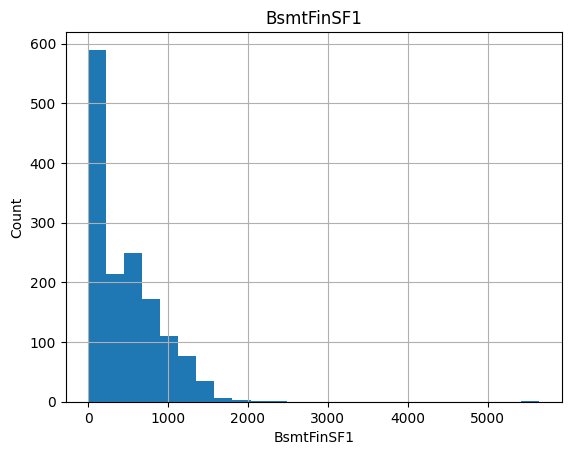

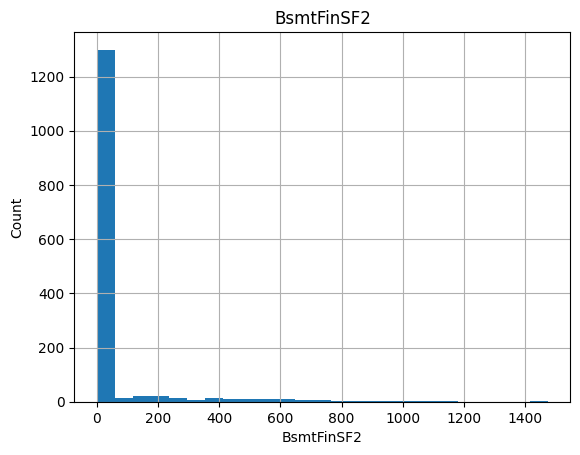

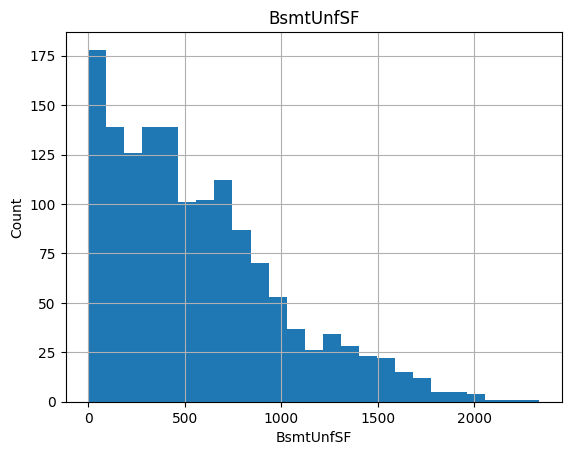

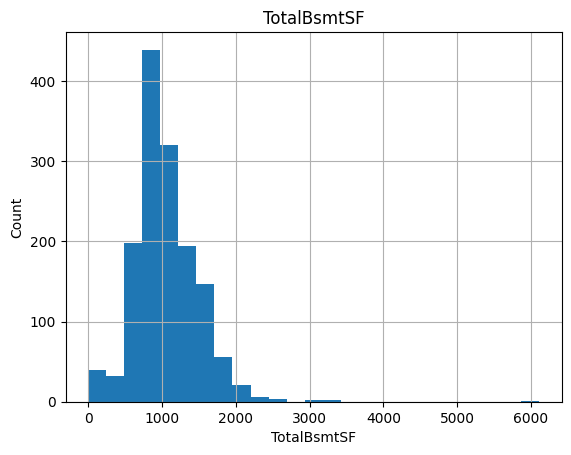

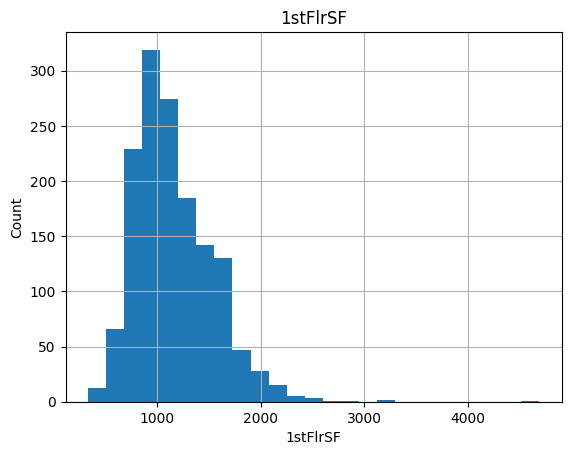

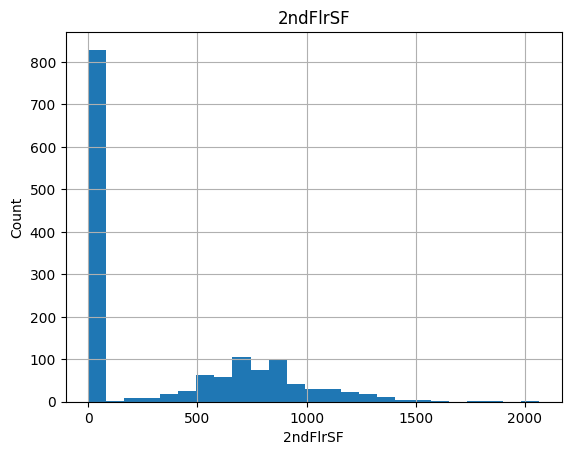

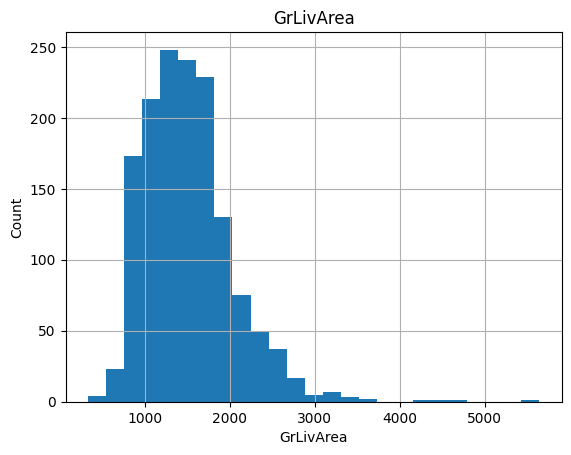

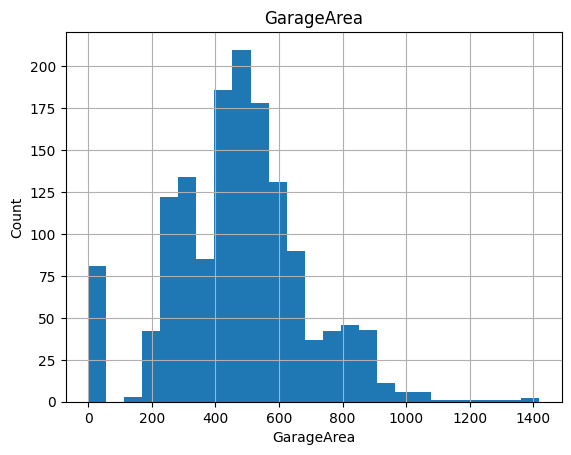

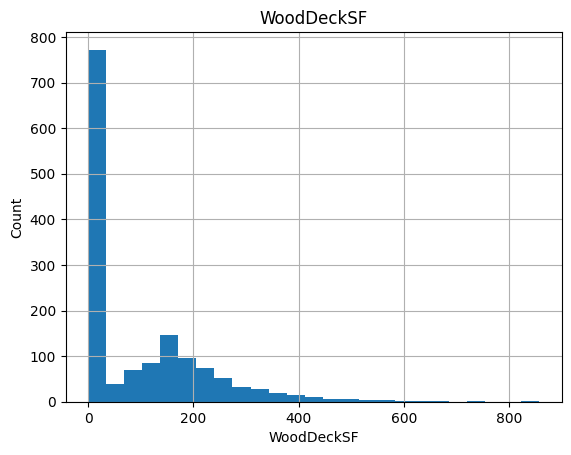

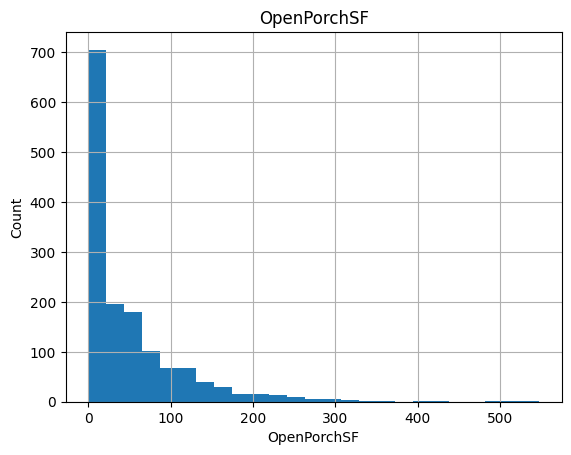

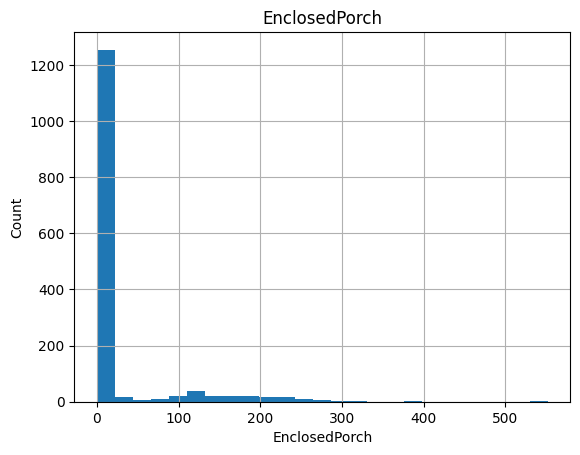

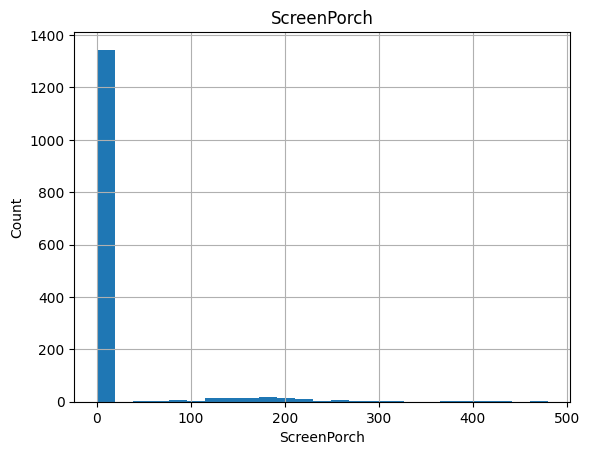

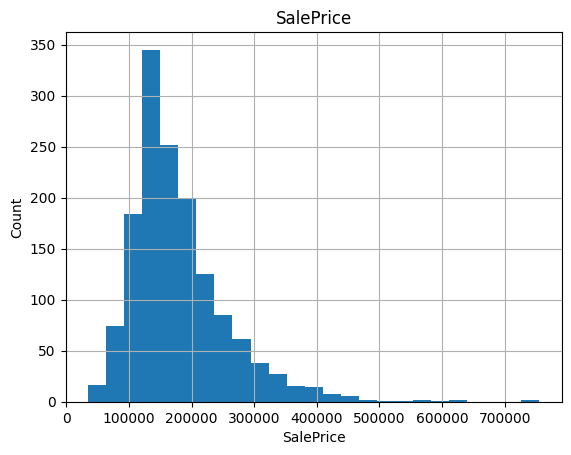

In [ ]:
#plotting a histogram for better insight
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
#exploring for outliers that might be present in the data
def detect_outliers_iqr(feature):
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in feature if x < lower_bound or x > upper_bound]
    return outliers

In [ ]:
outliers_dict = {}
for feature in continuous_feature:
    feature_data = df[feature]
    outliers = detect_outliers_iqr(feature_data)
    outliers_dict[feature] = outliers

# Print the outliers for each continuous feature
for feature, outliers in outliers_dict.items():
    if len(outliers) > 0:
        print(f"Outliers in {feature}: {len(outliers)}")
    else:
        print(f"No outliers detected in {feature}")

No outliers detected in LotFrontage
Outliers in LotArea: 69
No outliers detected in MasVnrArea
Outliers in BsmtFinSF1: 7
Outliers in BsmtFinSF2: 167
Outliers in BsmtUnfSF: 29
Outliers in TotalBsmtSF: 61
Outliers in 1stFlrSF: 20
Outliers in 2ndFlrSF: 2
Outliers in GrLivArea: 31
Outliers in GarageArea: 21
Outliers in WoodDeckSF: 32
Outliers in OpenPorchSF: 77
Outliers in EnclosedPorch: 208
Outliers in ScreenPorch: 116
Outliers in SalePrice: 61


these also need to be dealt with

we now want to analyze the categorical features

In [ ]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print(f"Number of Categorical Features: {len(categorical_features)}")

Number of Categorical Features: 44


In [ ]:
def plot_categorical_frequency(df, categorical_features):
    for feature in categorical_features:
        category_counts = df[feature].value_counts()
        category_counts.plot(kind='bar')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.title(f'{feature} Frequency Distribution')
        plt.show()

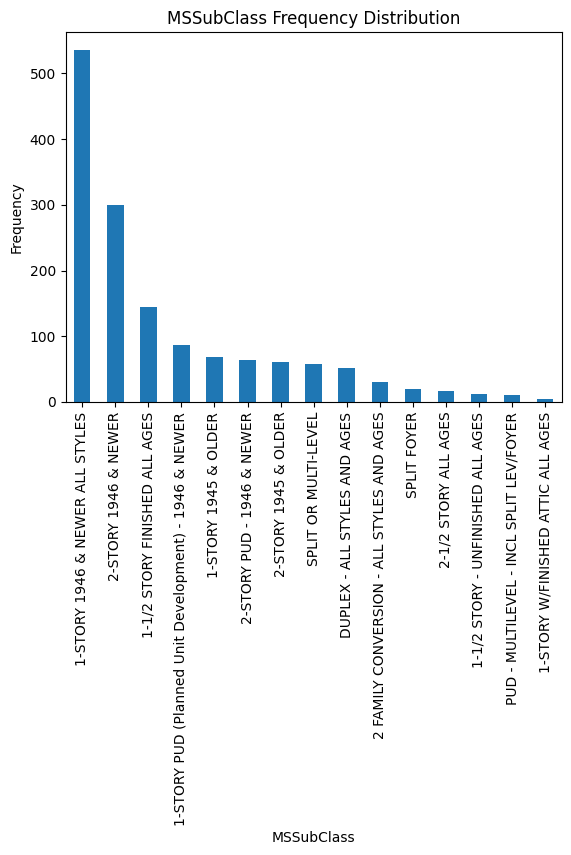

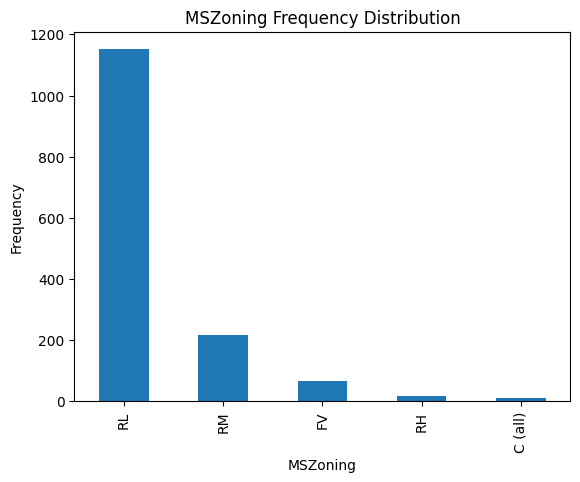

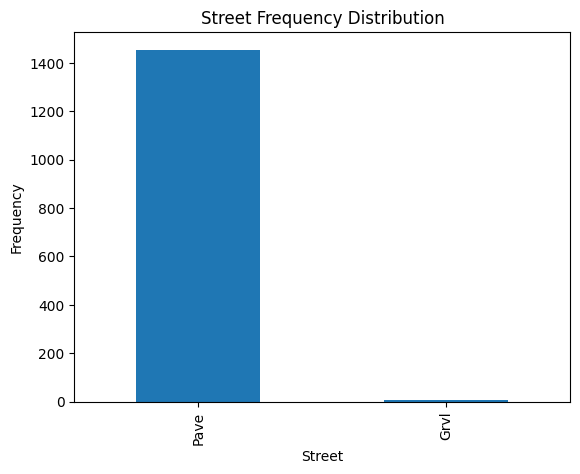

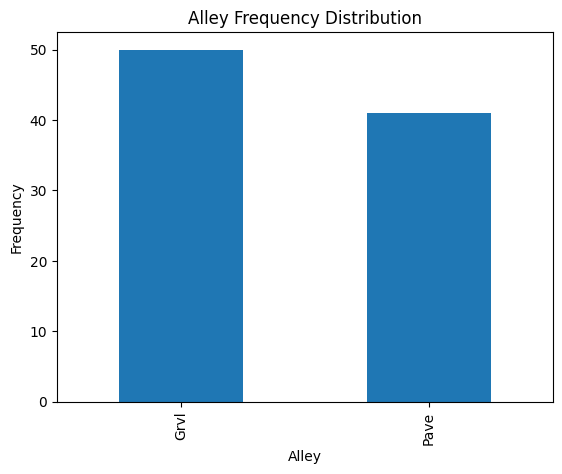

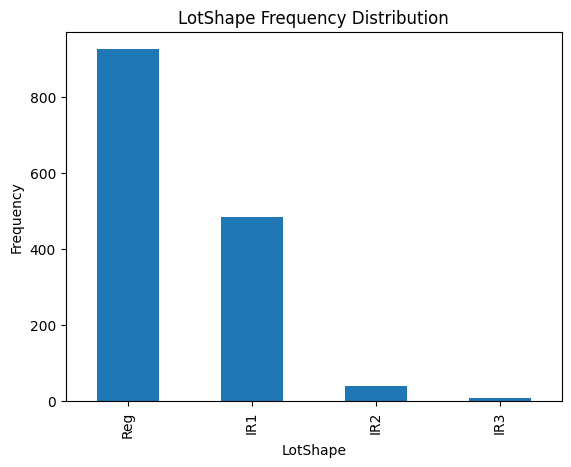

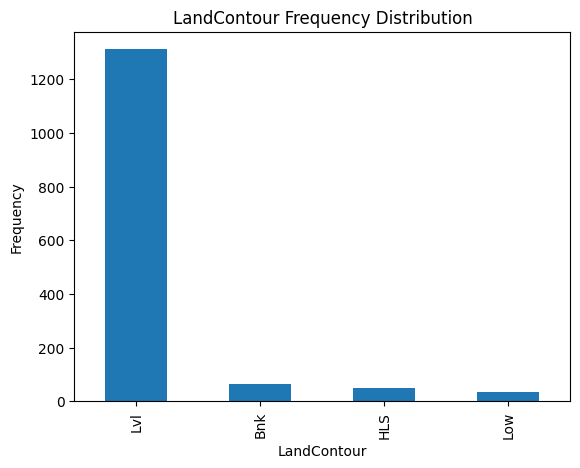

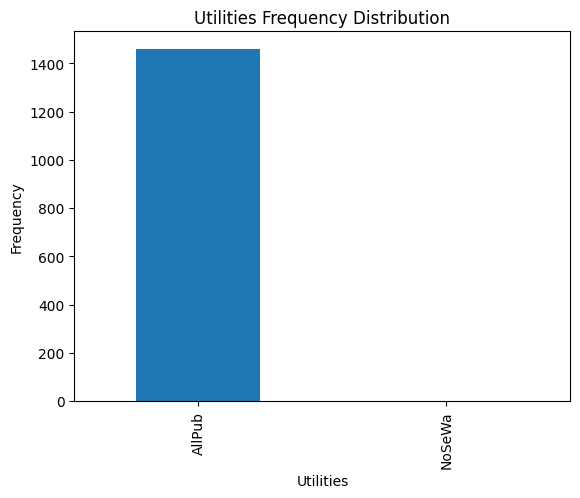

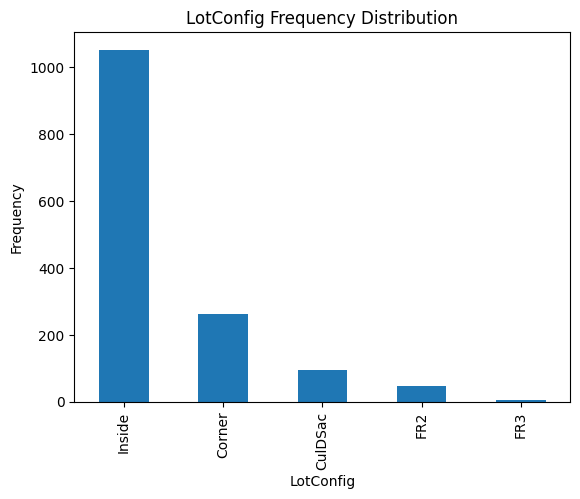

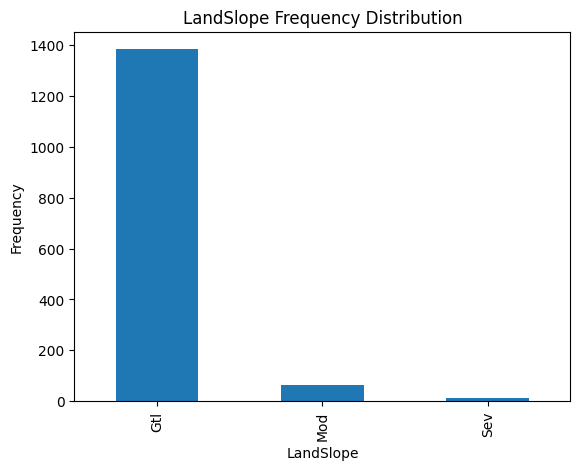

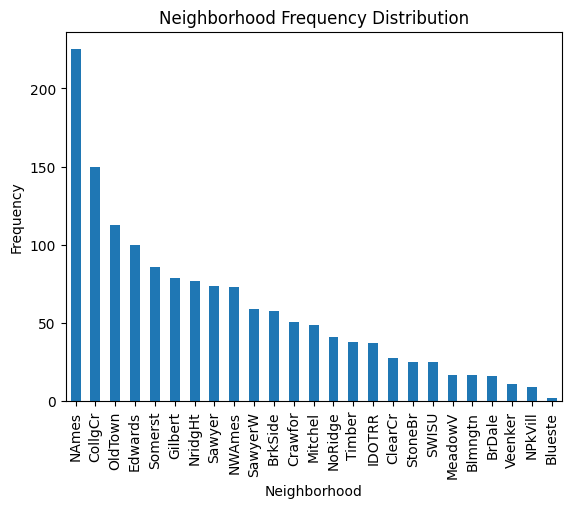

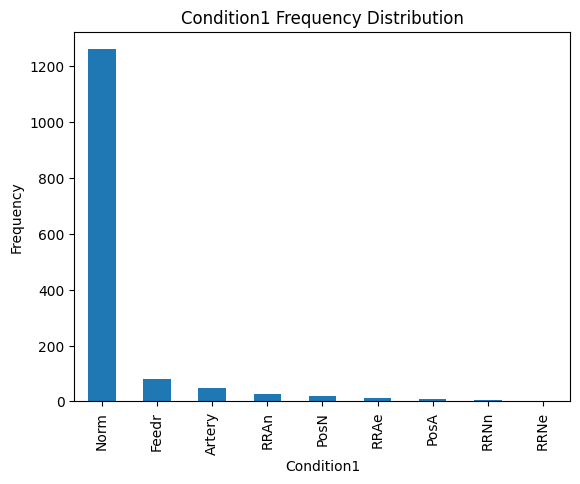

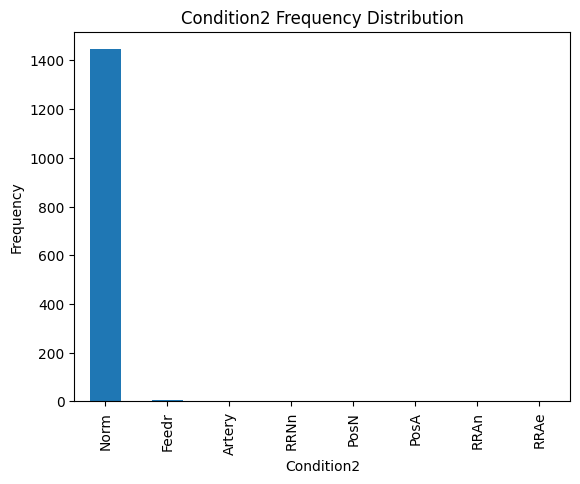

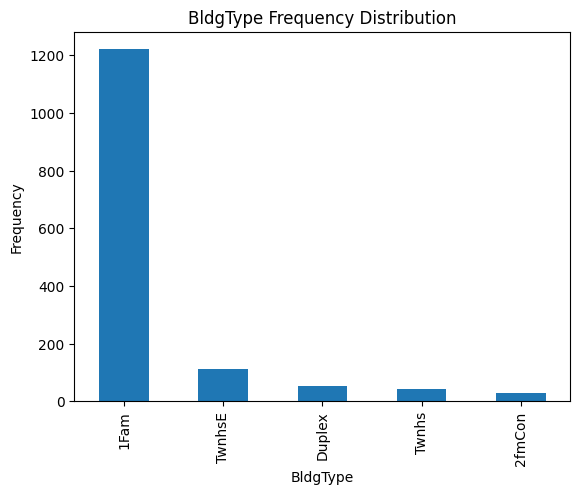

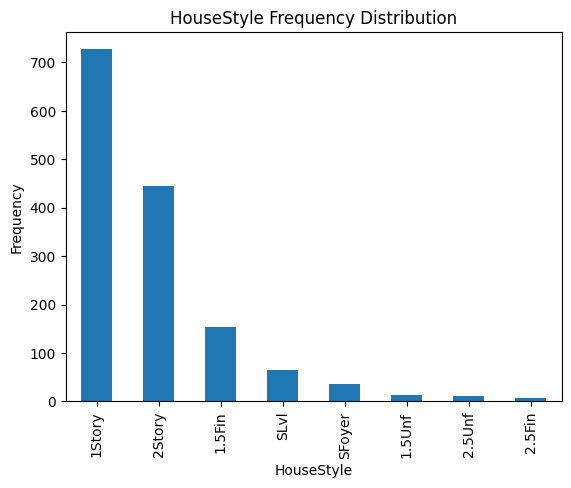

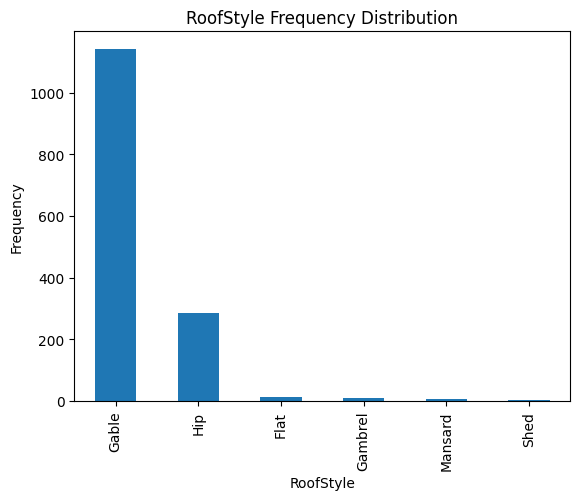

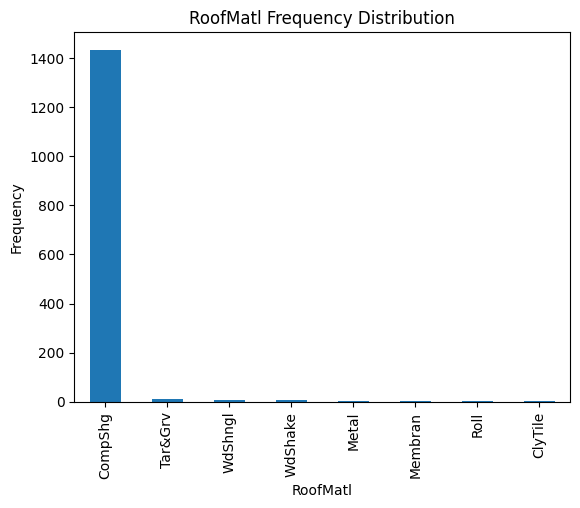

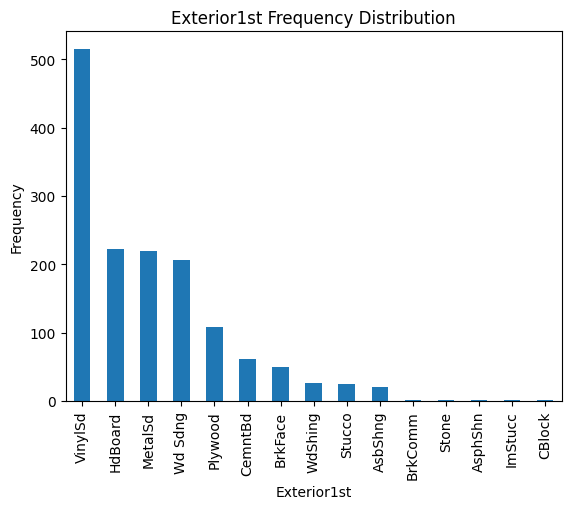

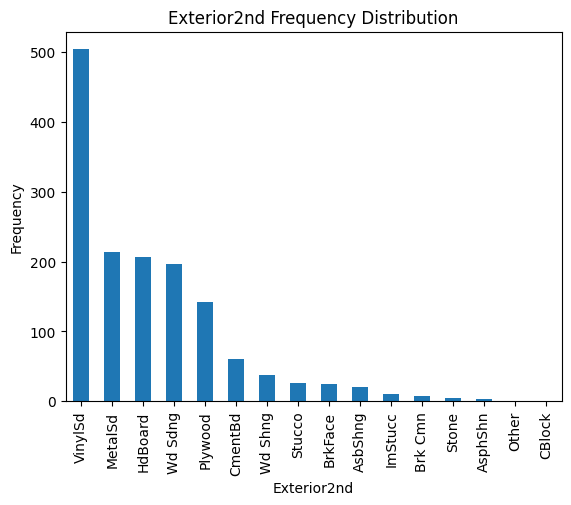

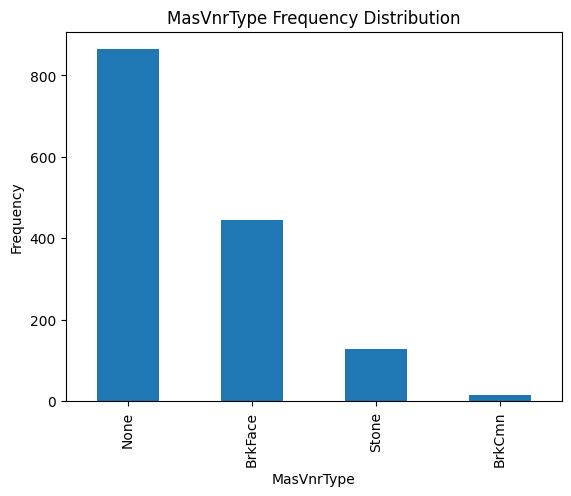

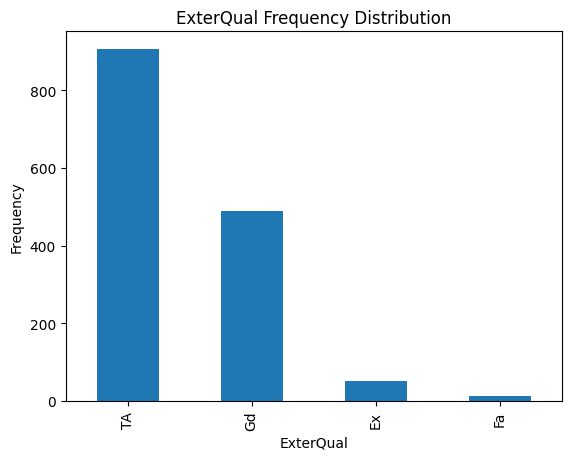

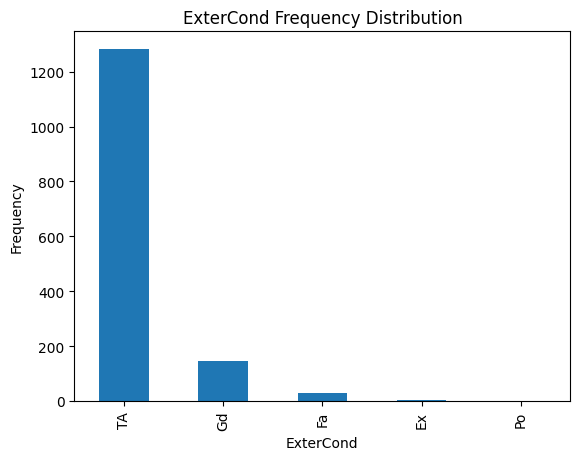

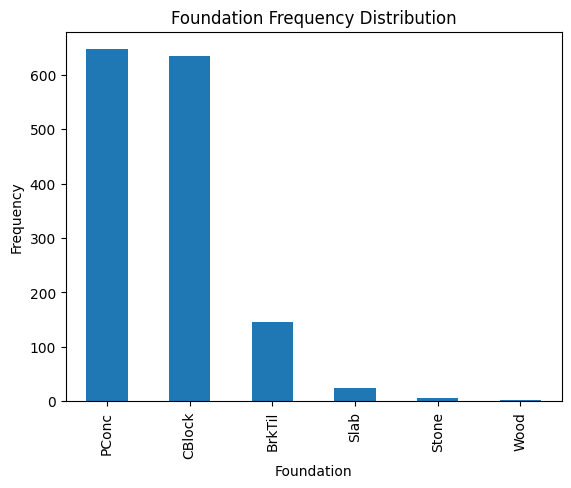

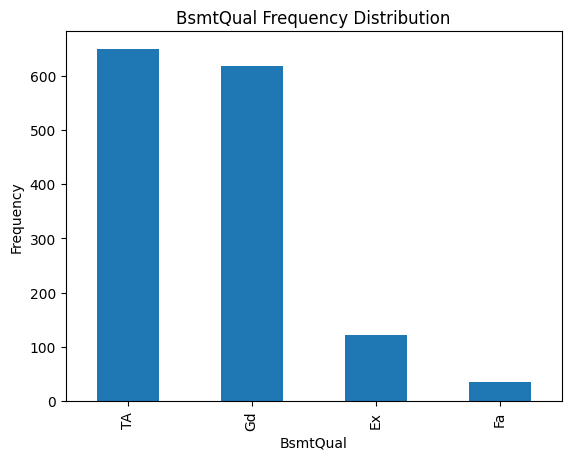

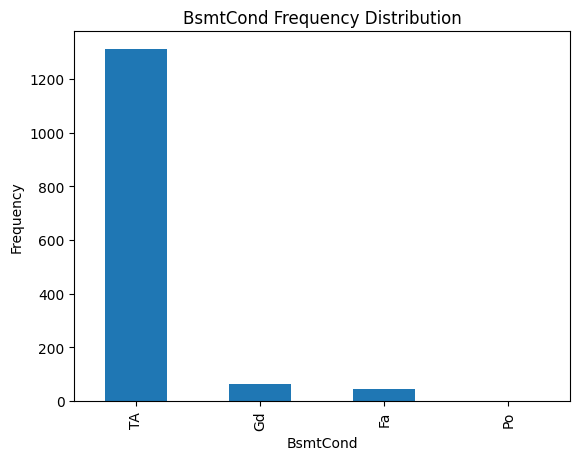

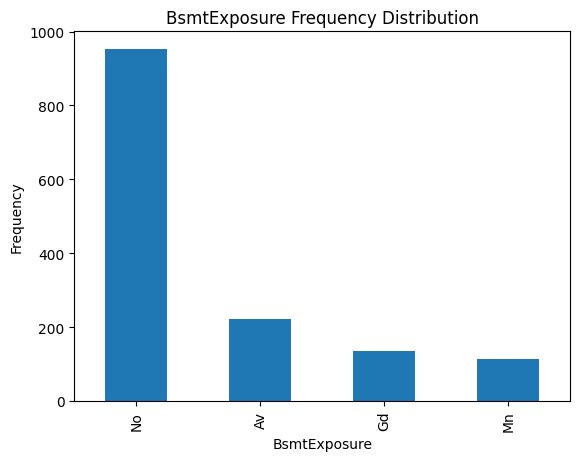

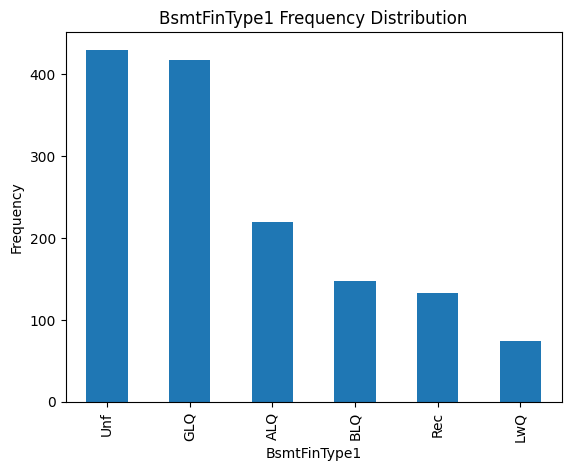

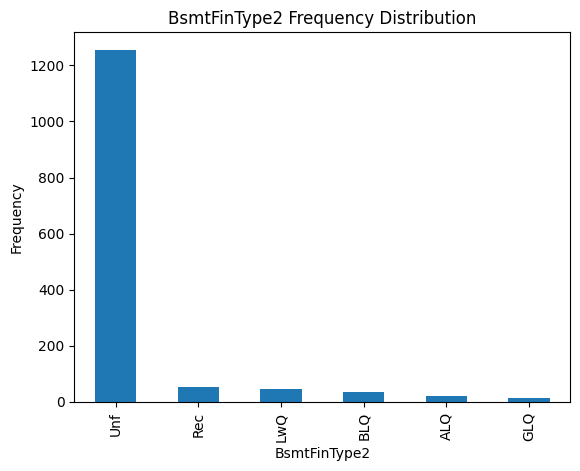

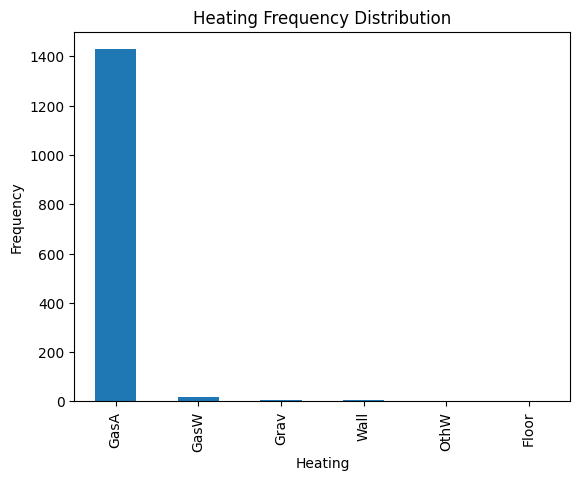

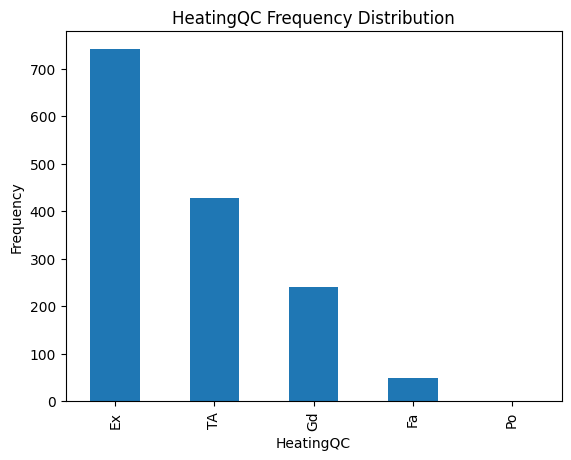

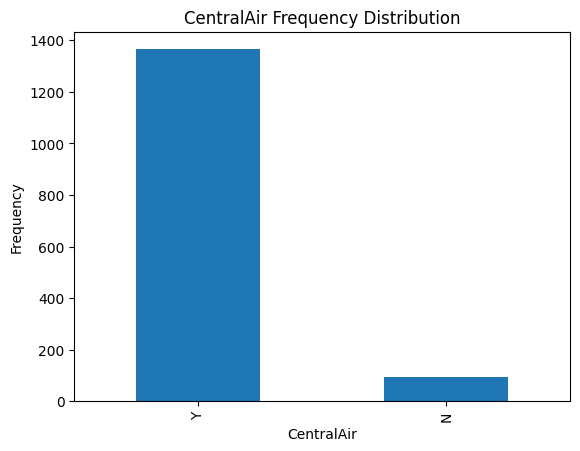

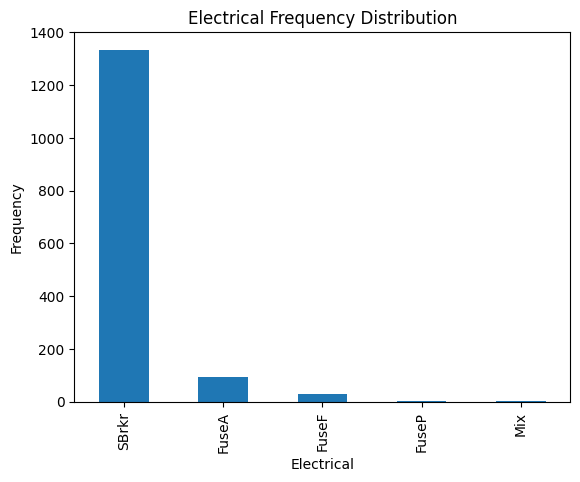

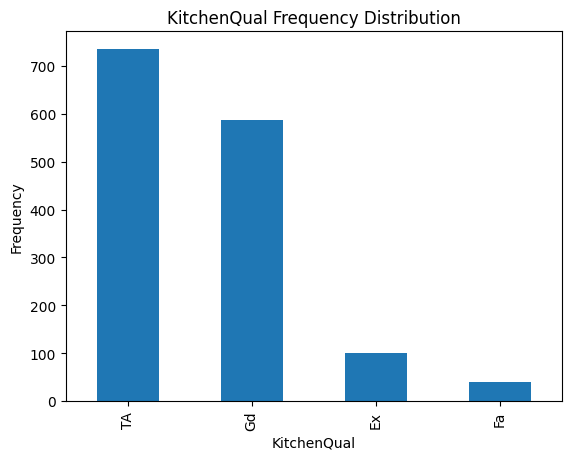

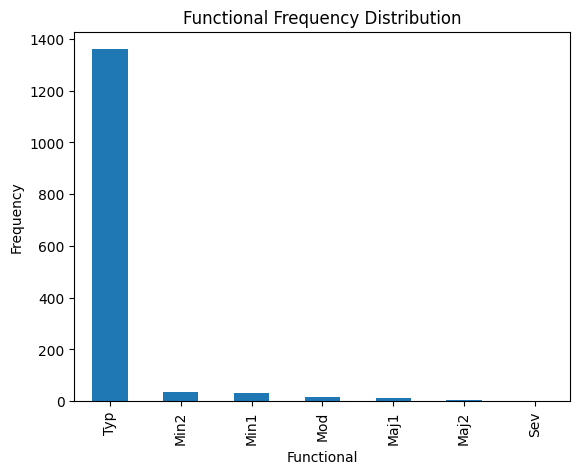

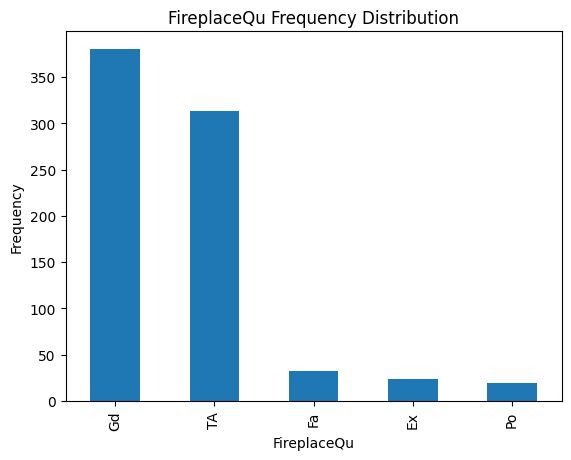

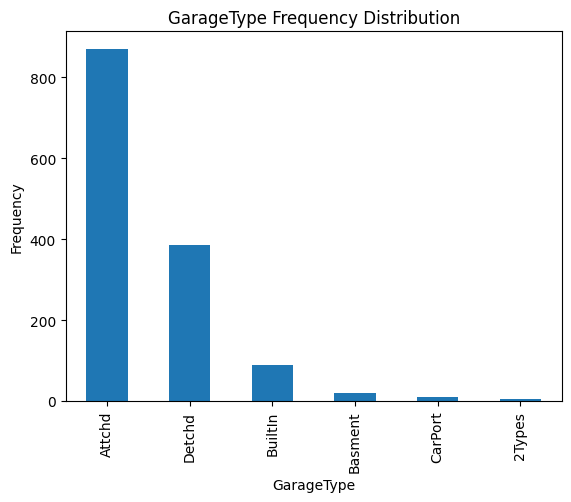

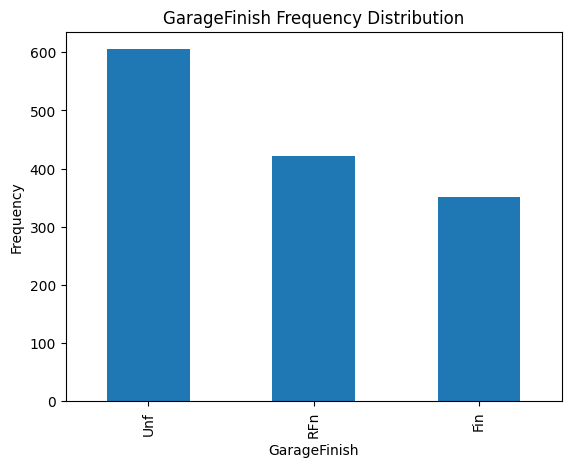

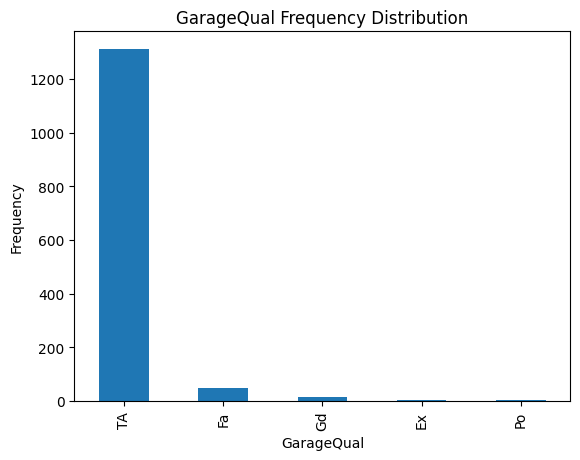

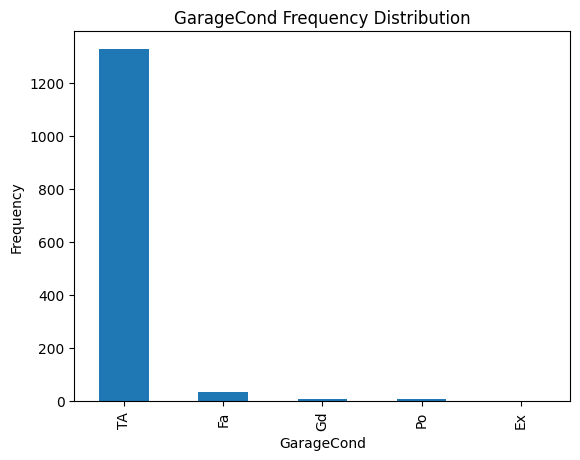

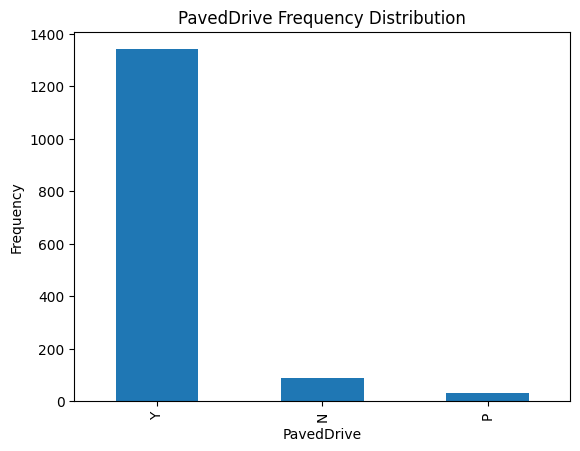

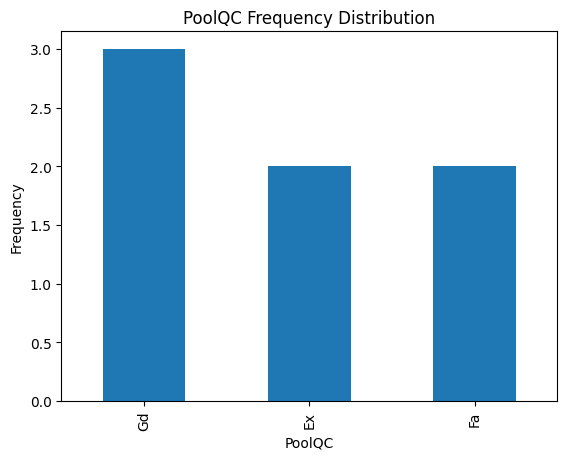

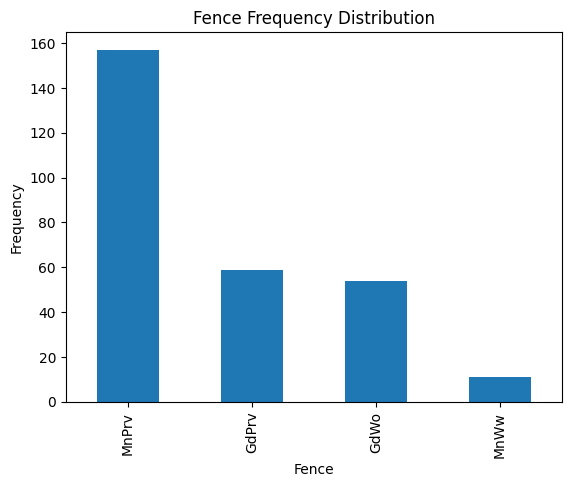

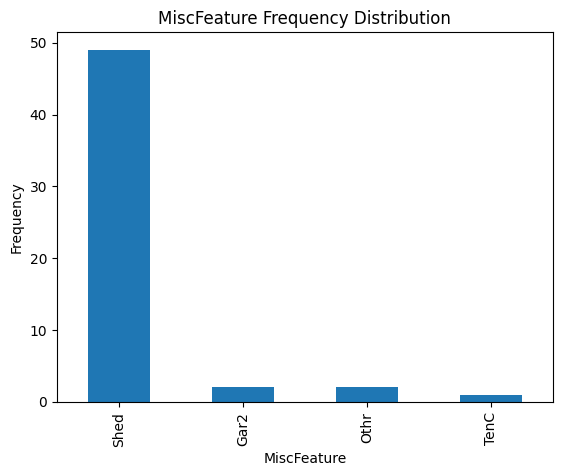

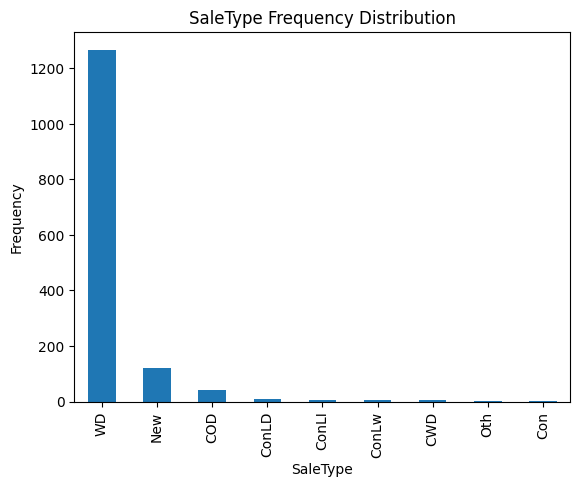

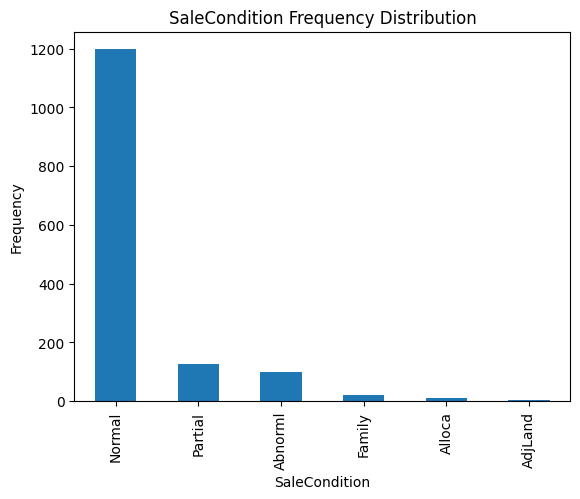

In [ ]:
plot_categorical_frequency(df, categorical_features)

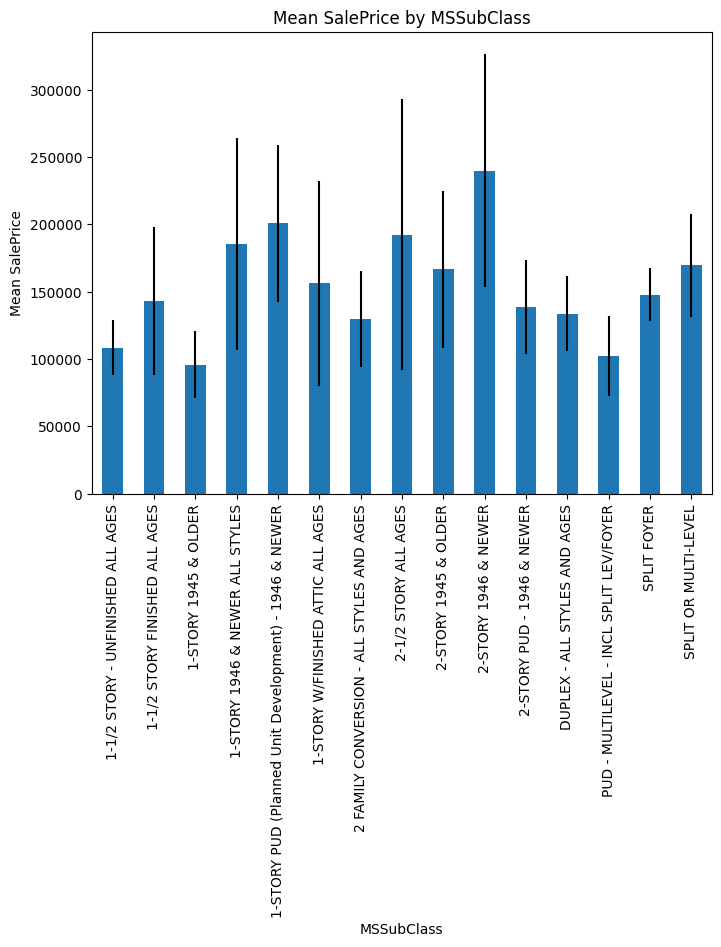

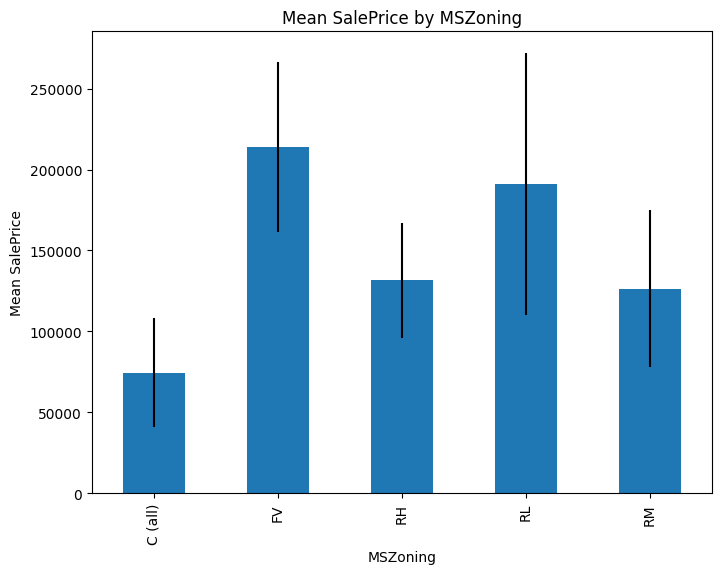

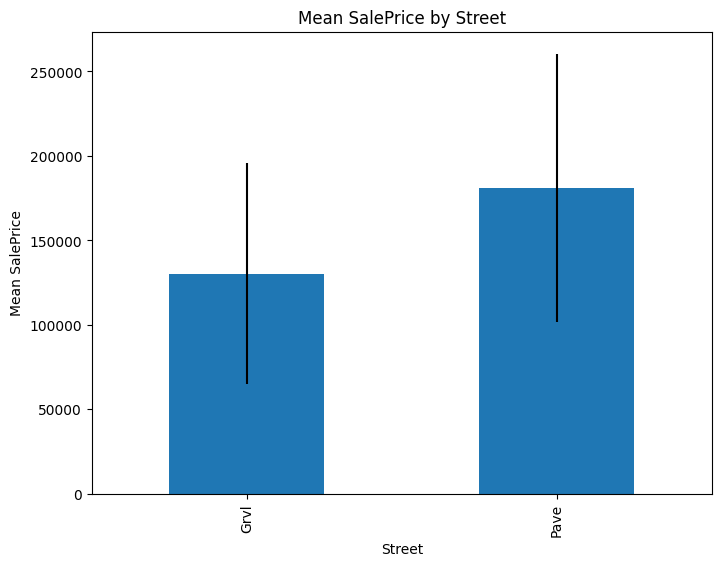

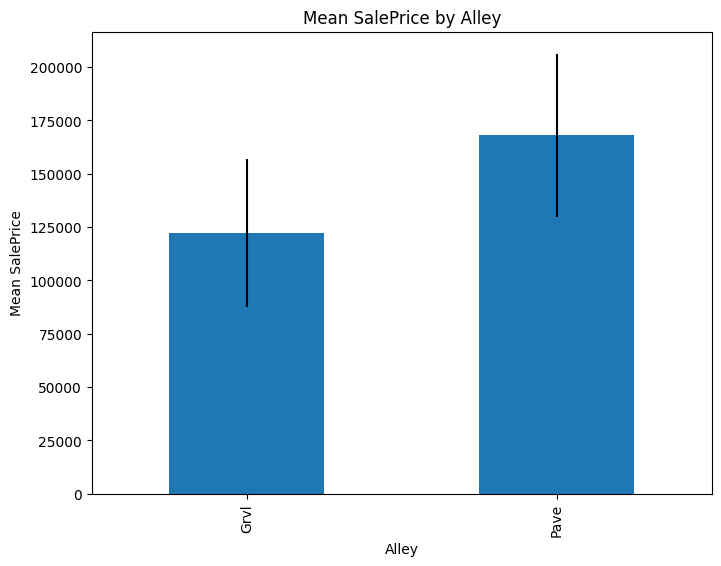

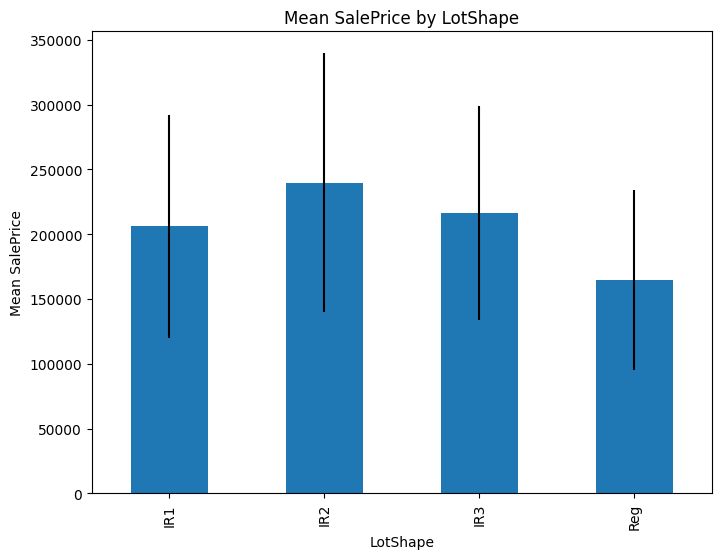

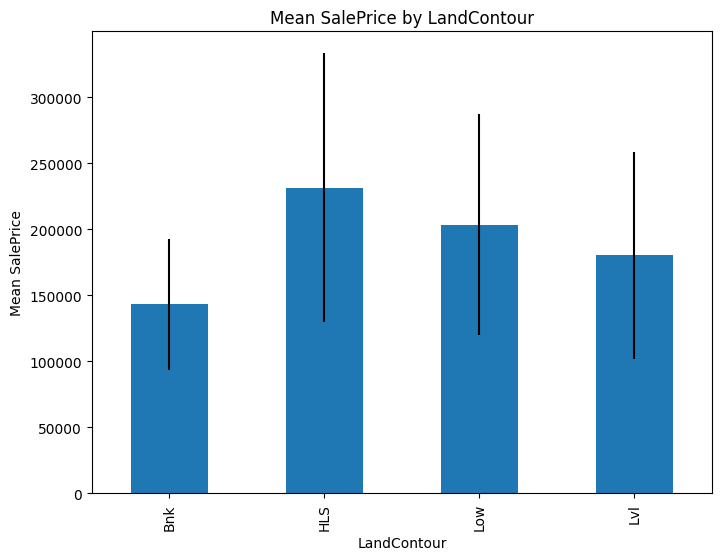

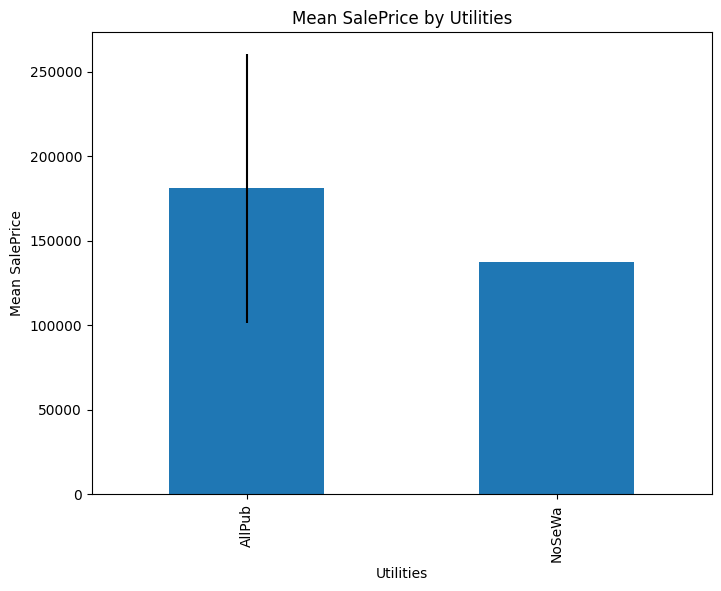

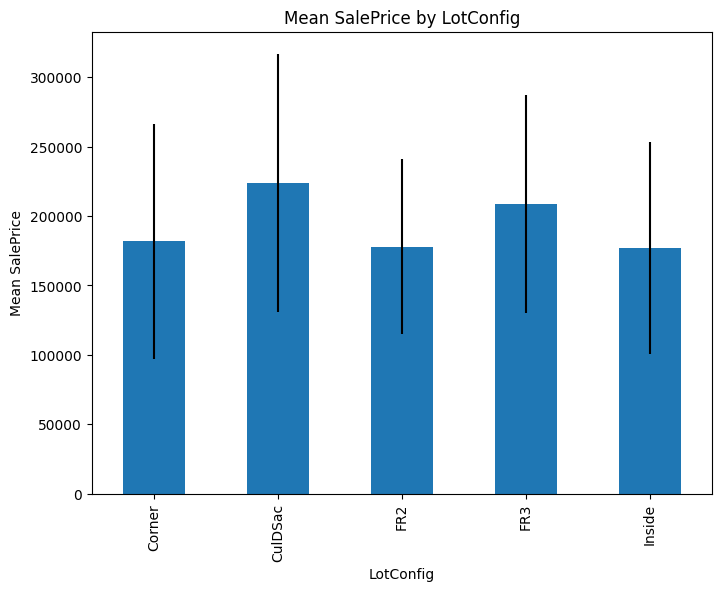

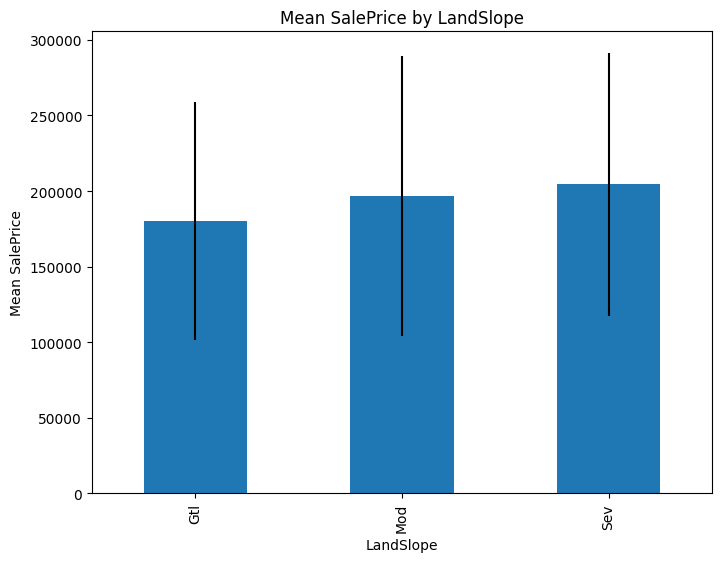

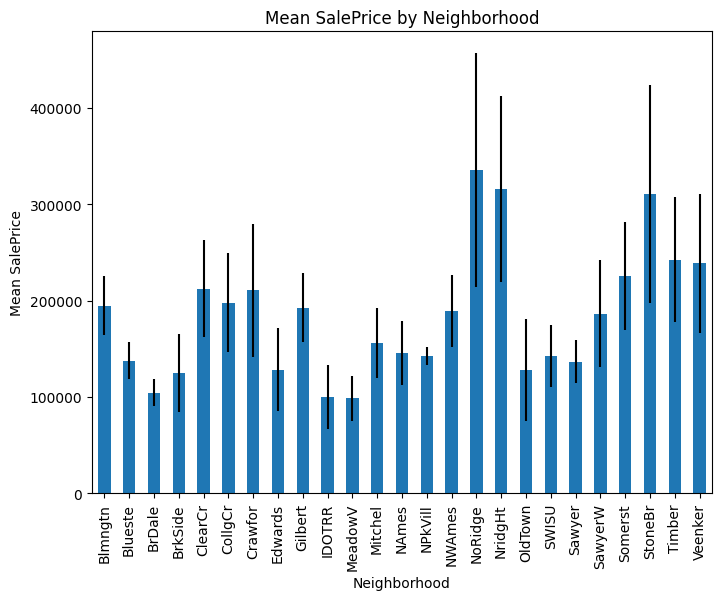

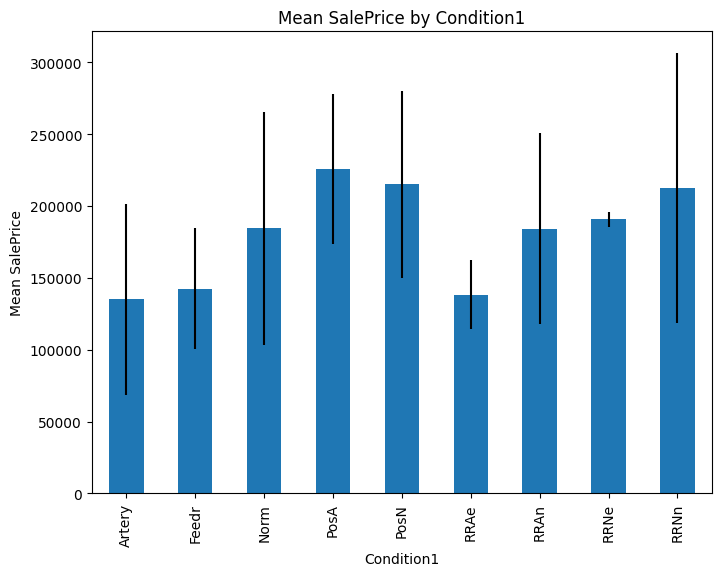

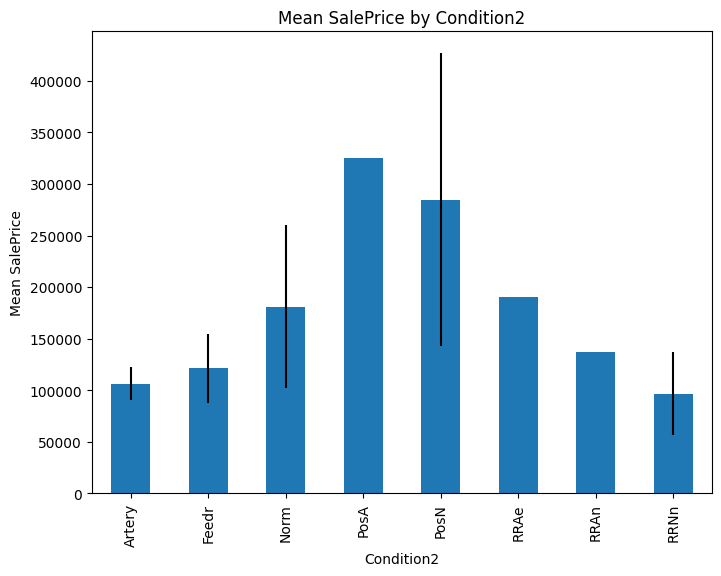

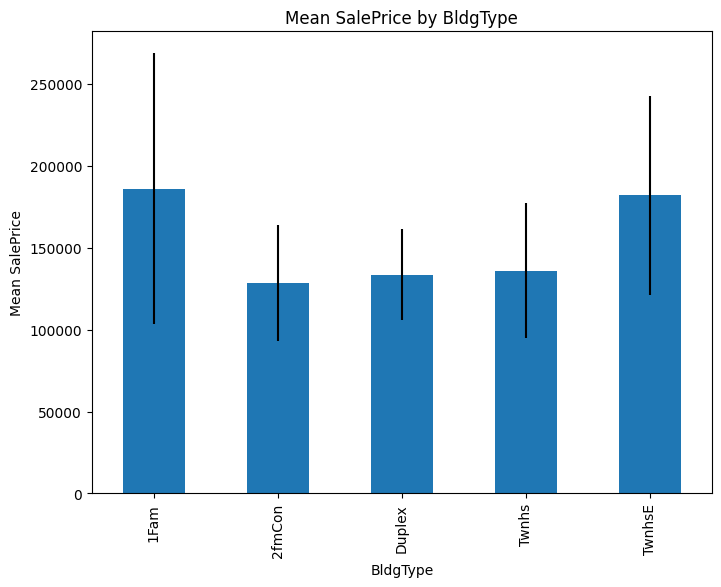

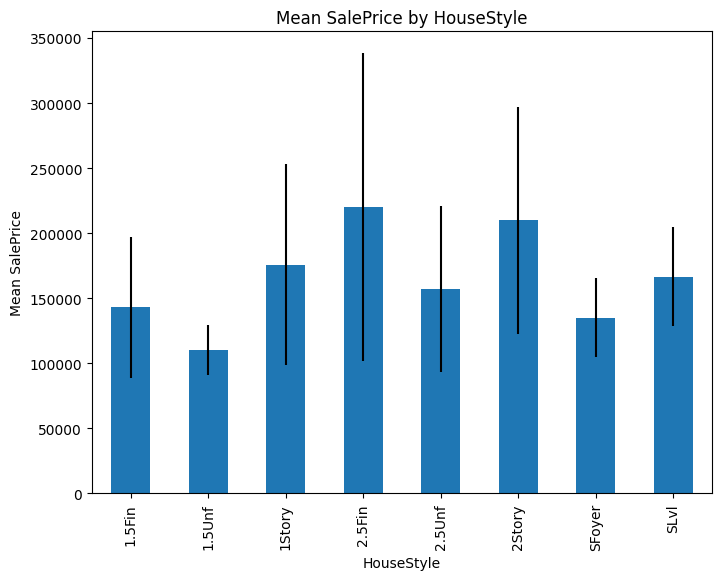

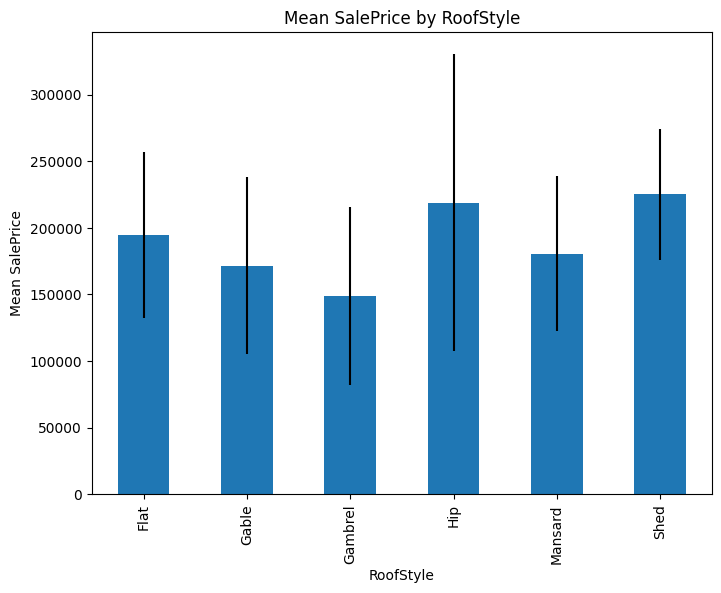

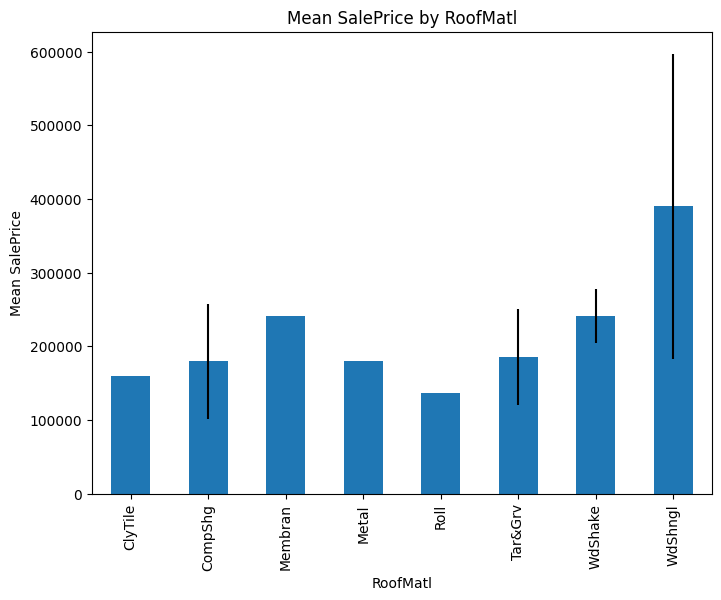

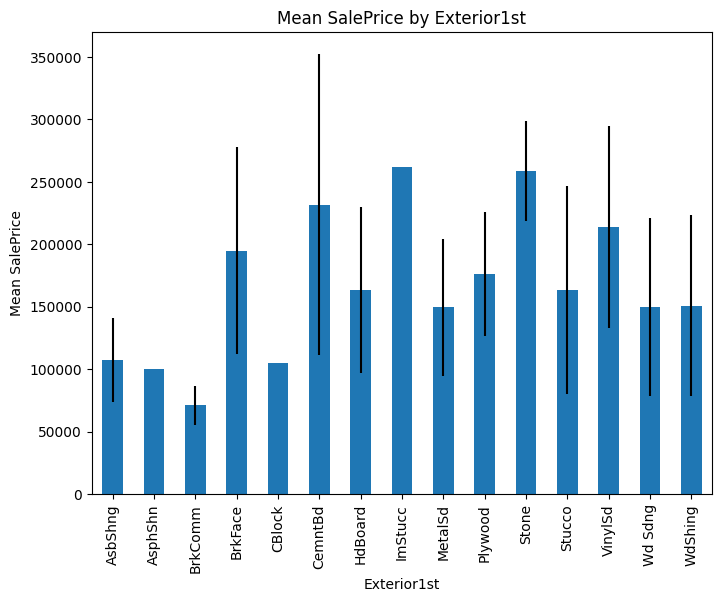

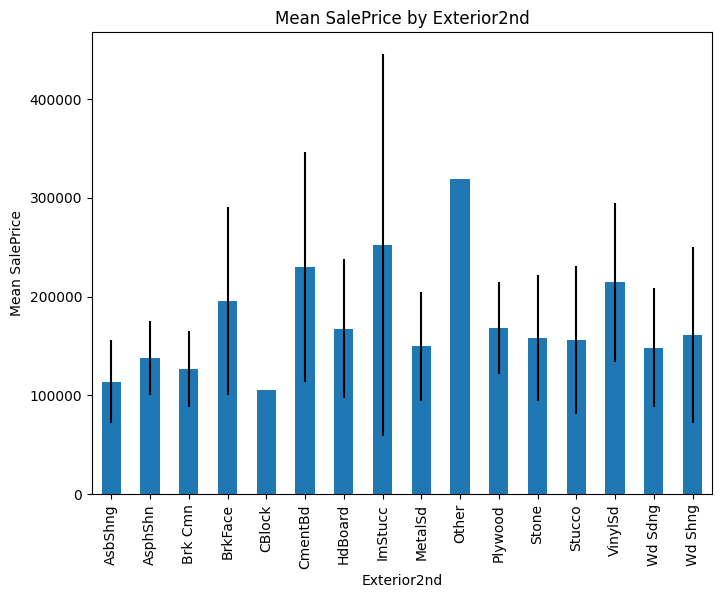

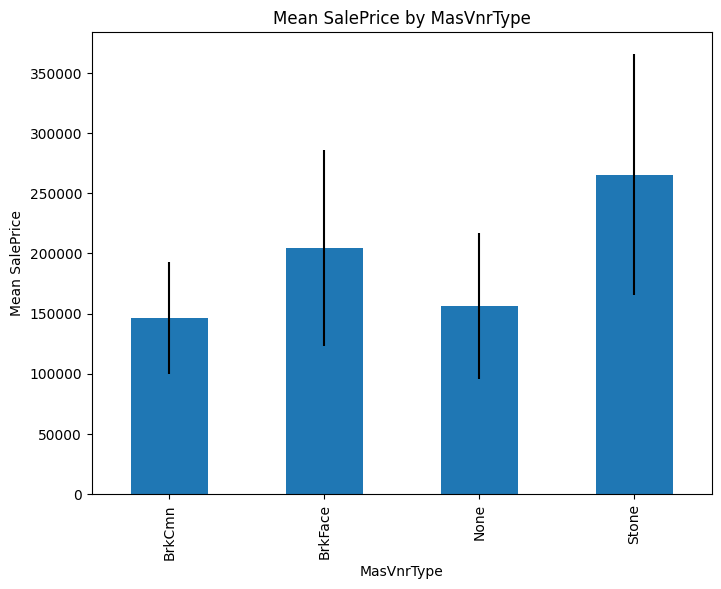

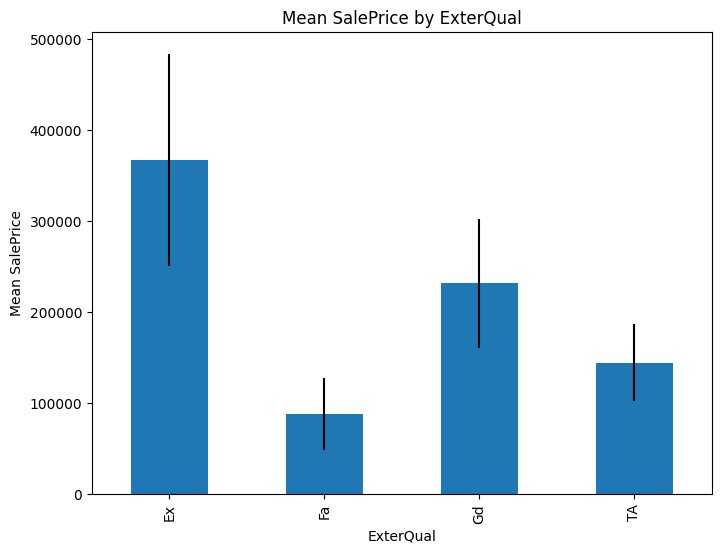

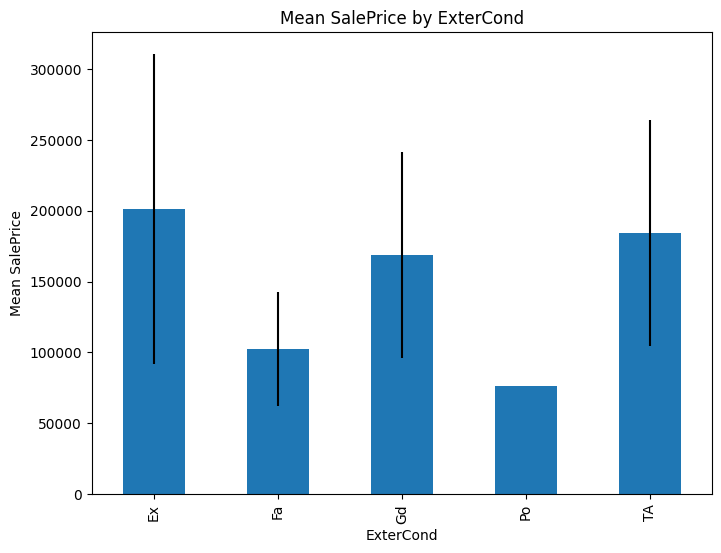

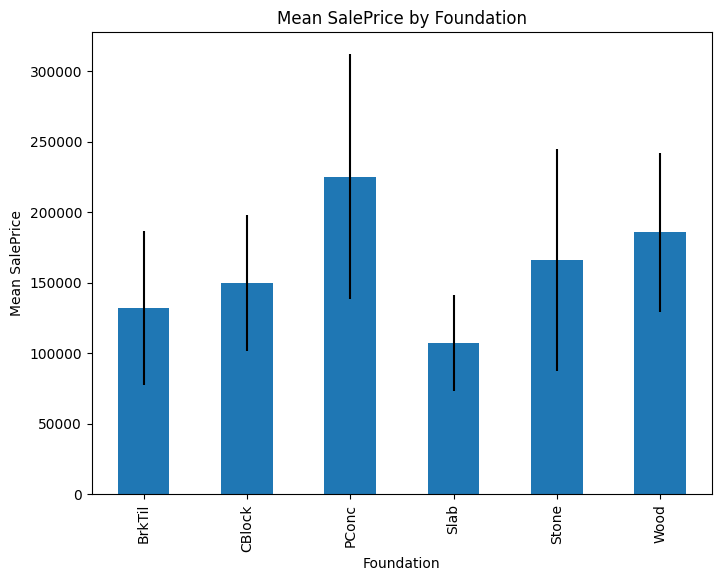

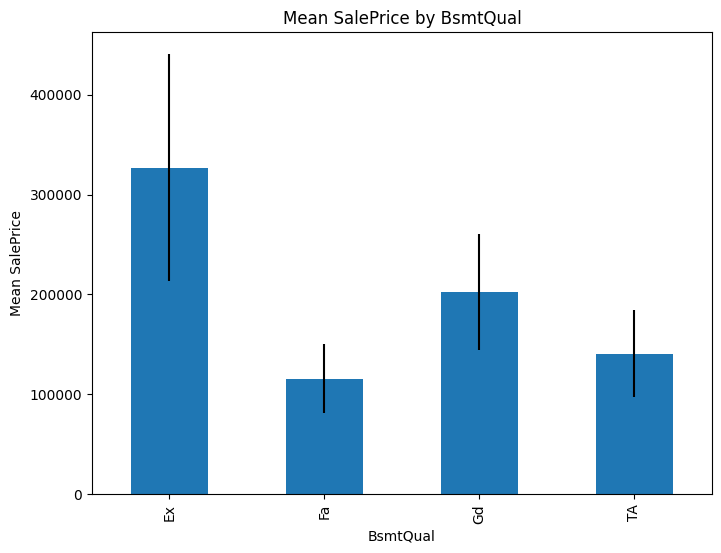

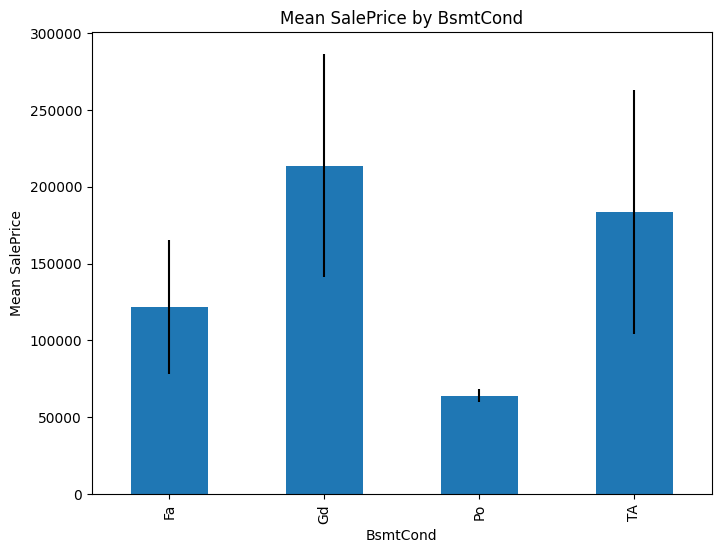

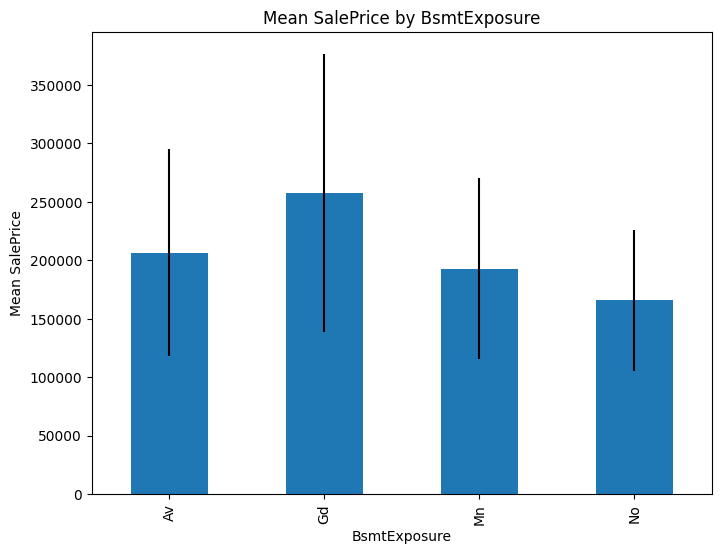

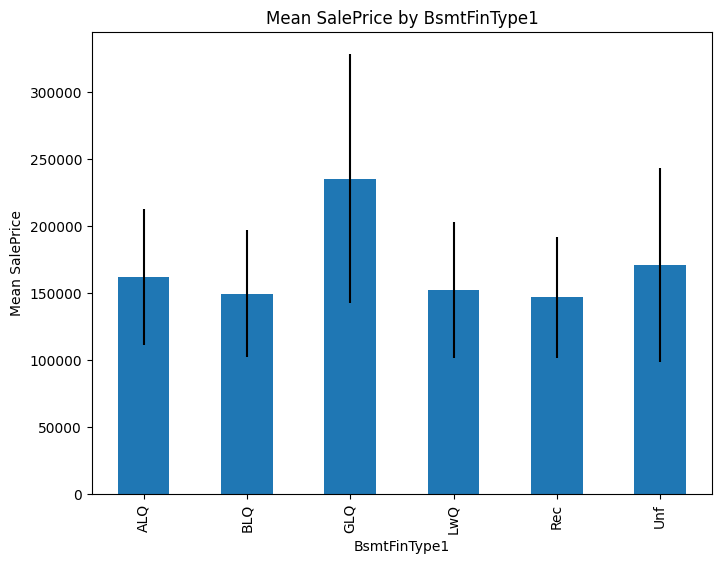

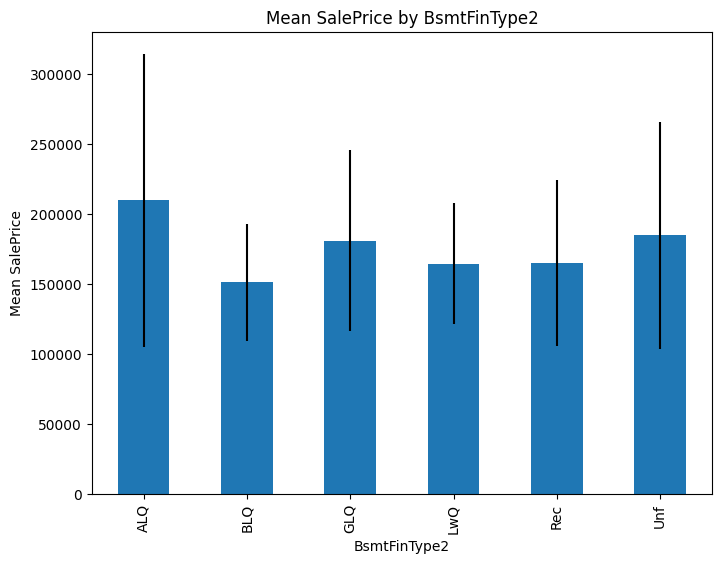

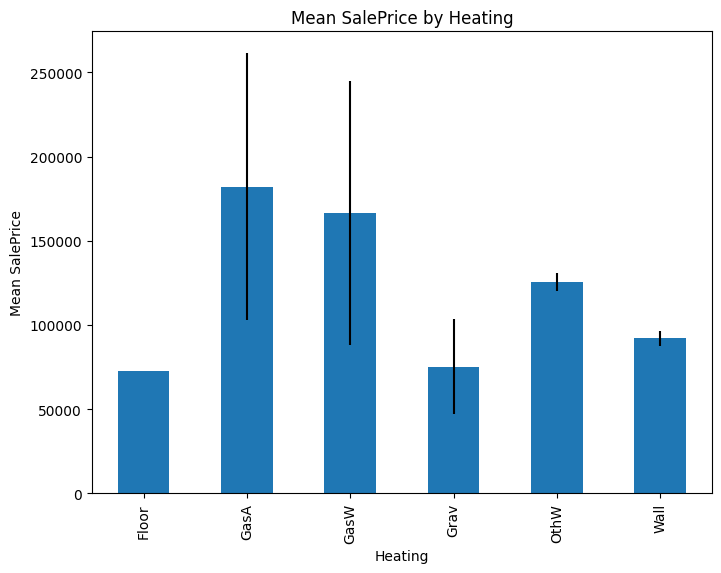

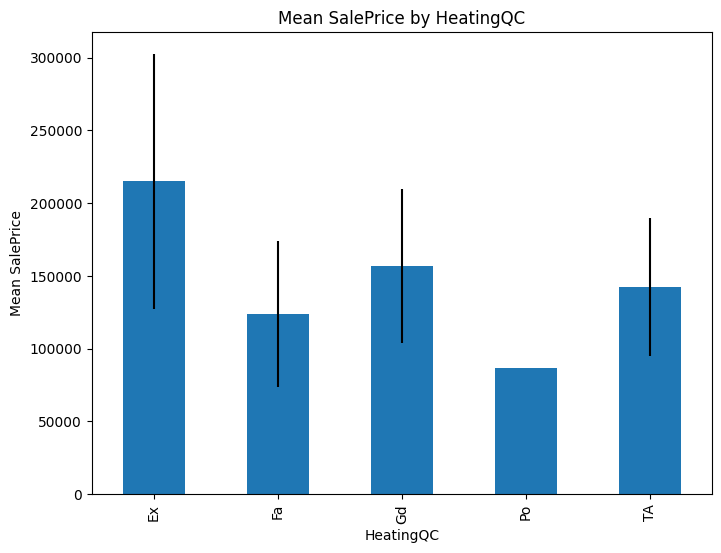

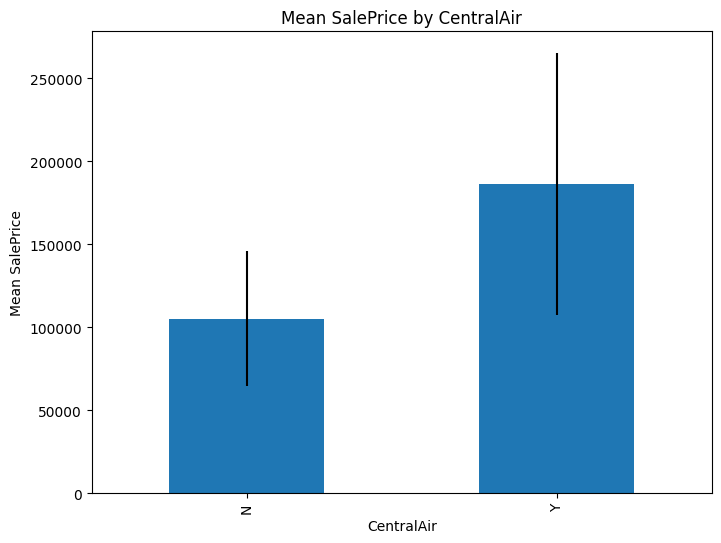

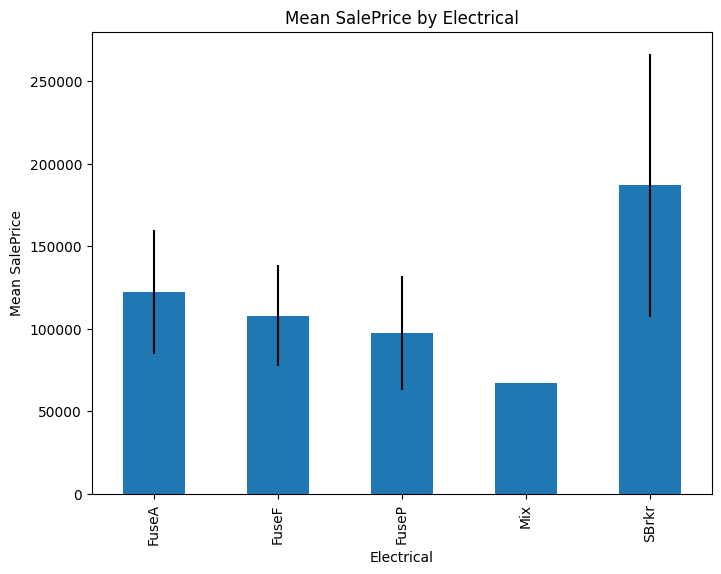

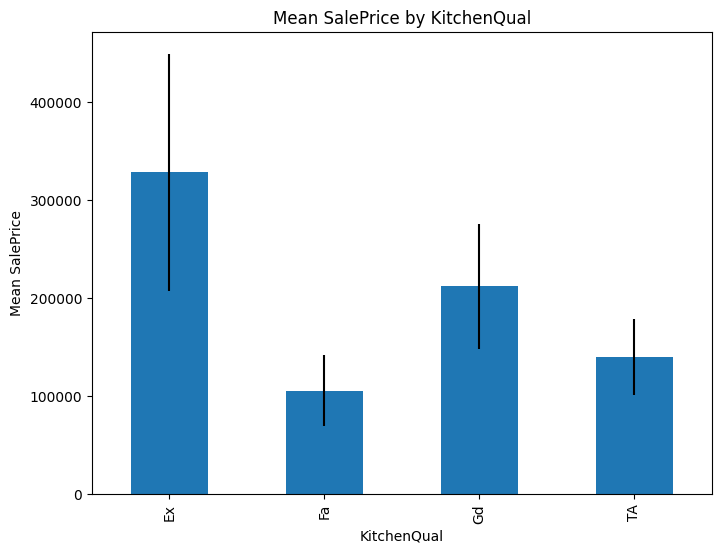

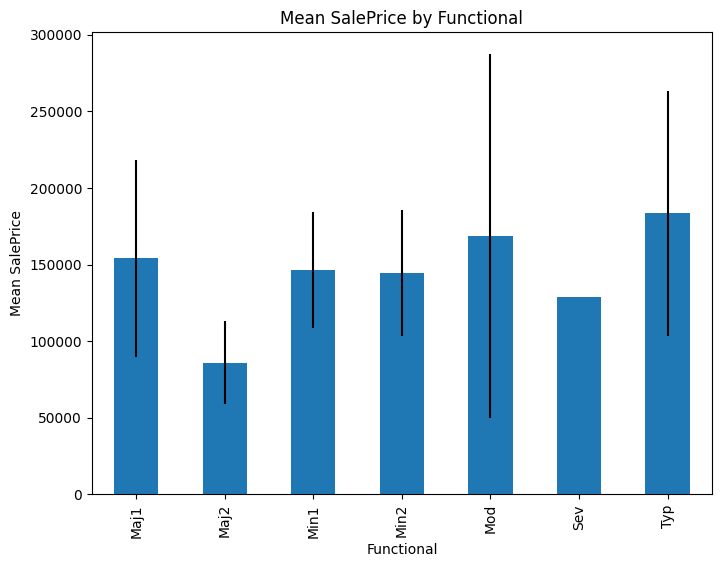

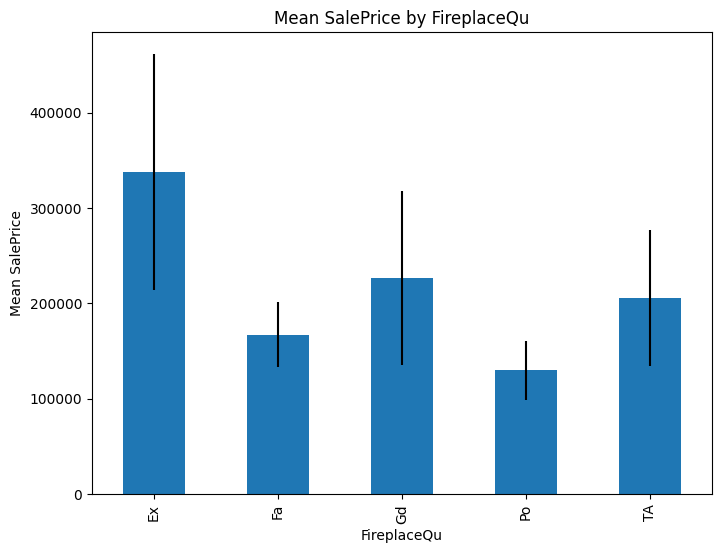

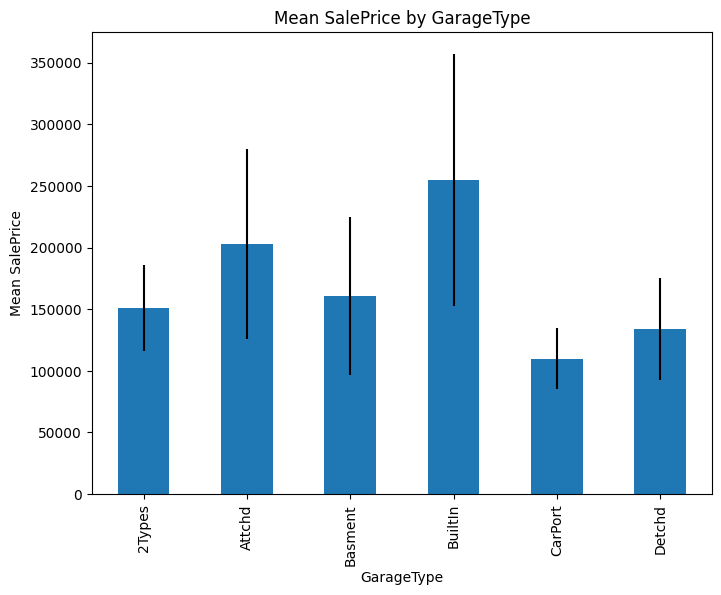

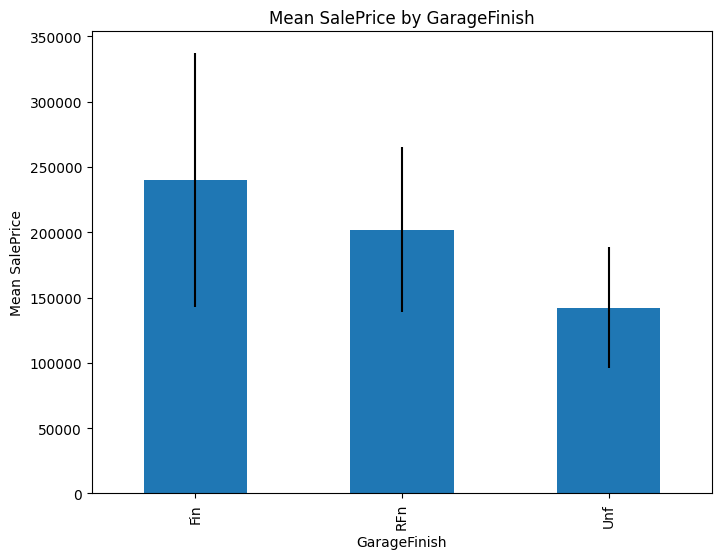

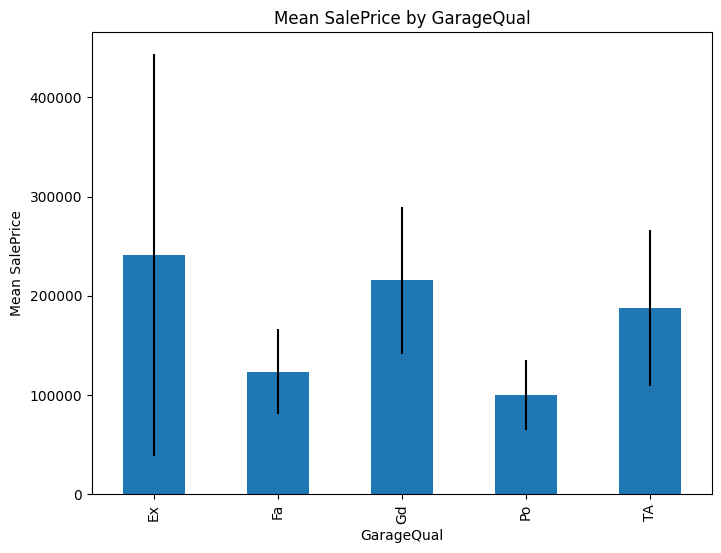

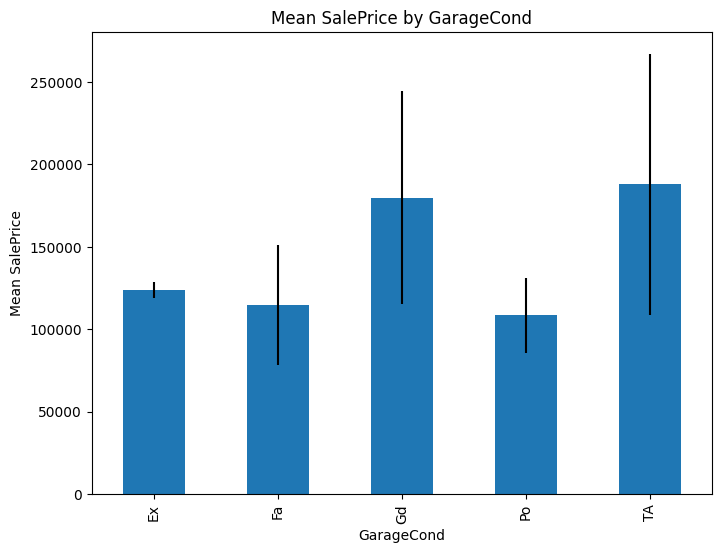

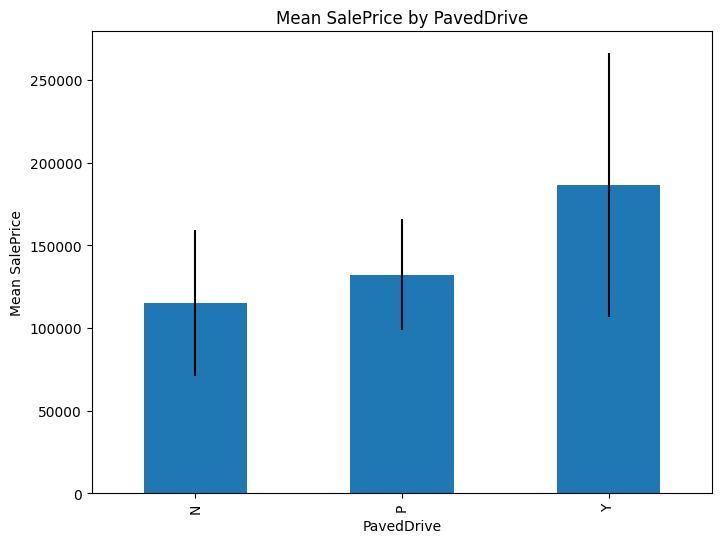

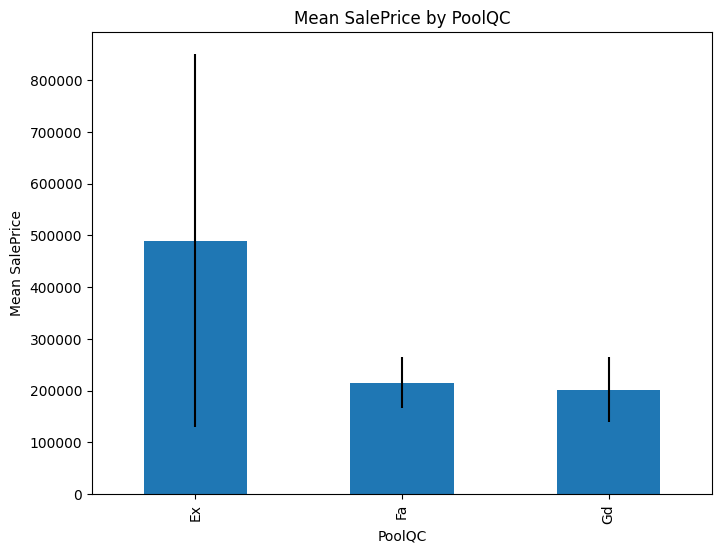

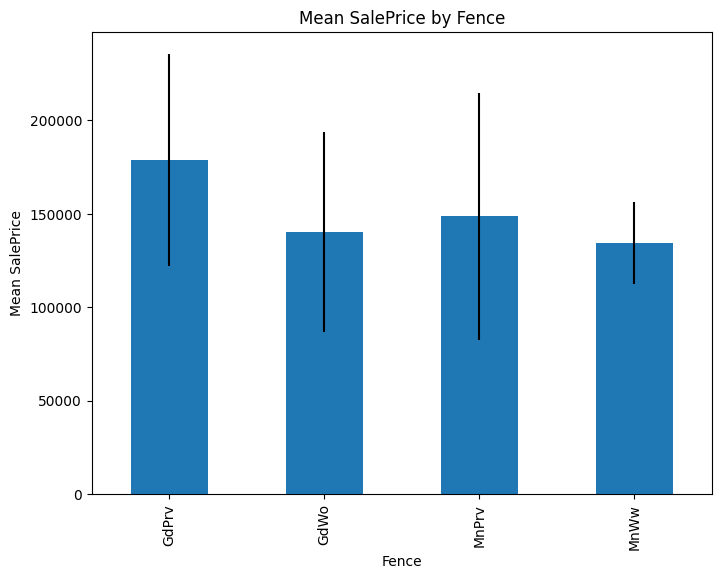

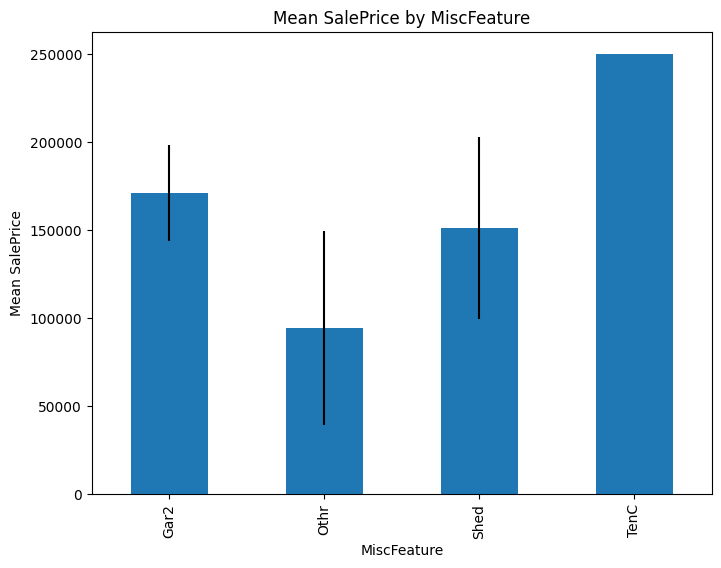

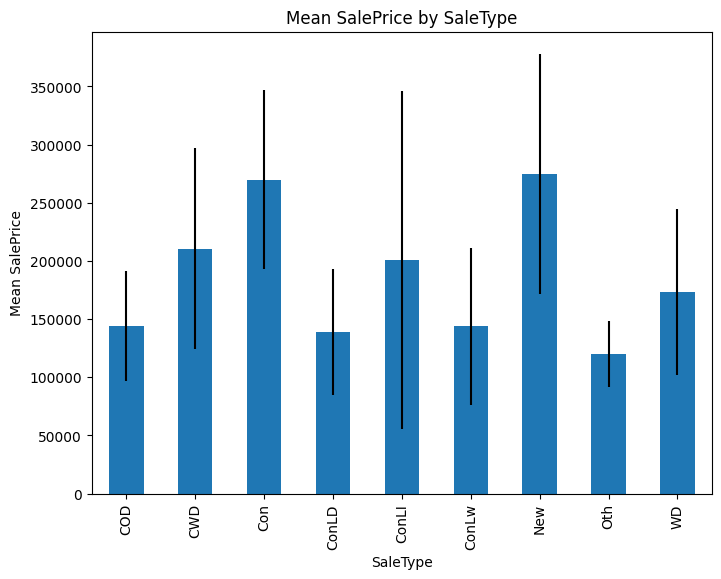

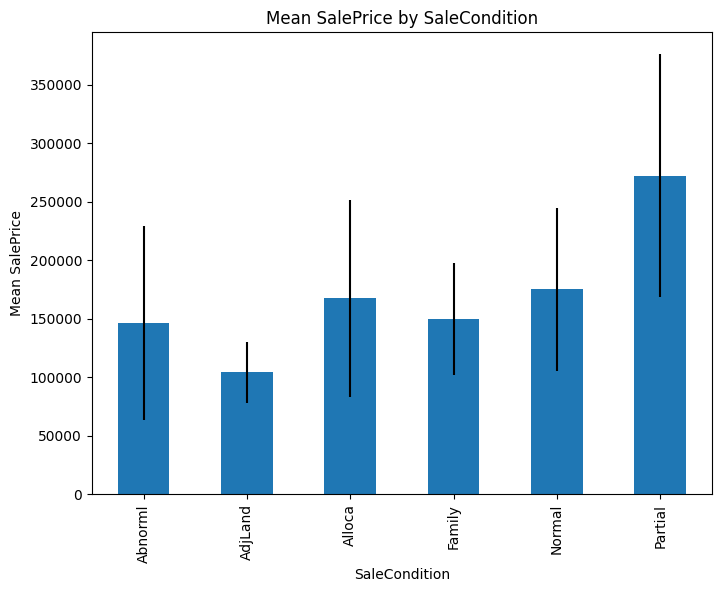

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    grouped_data = df.groupby(feature)['SalePrice']
    mean_price = grouped_data.mean()
    std_price = grouped_data.std()
    mean_price.plot(kind='bar', yerr=std_price)
    plt.title(f'Mean SalePrice by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mean SalePrice')
    plt.show()

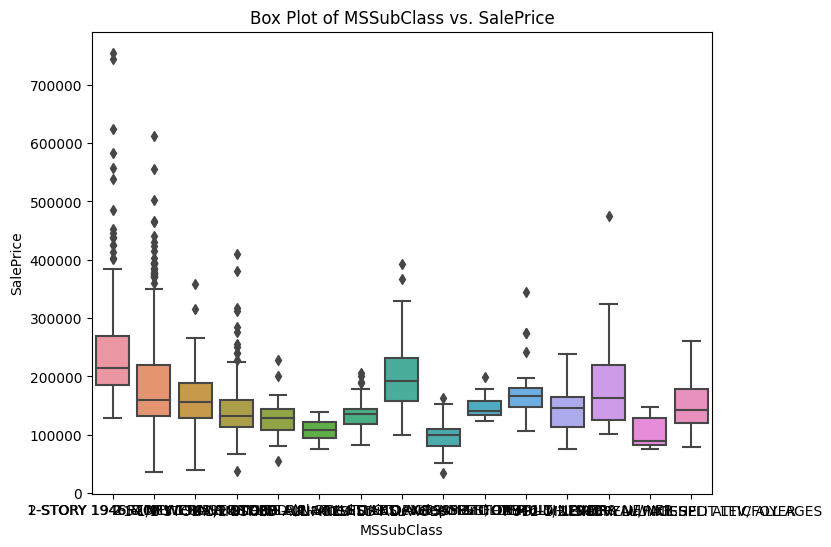

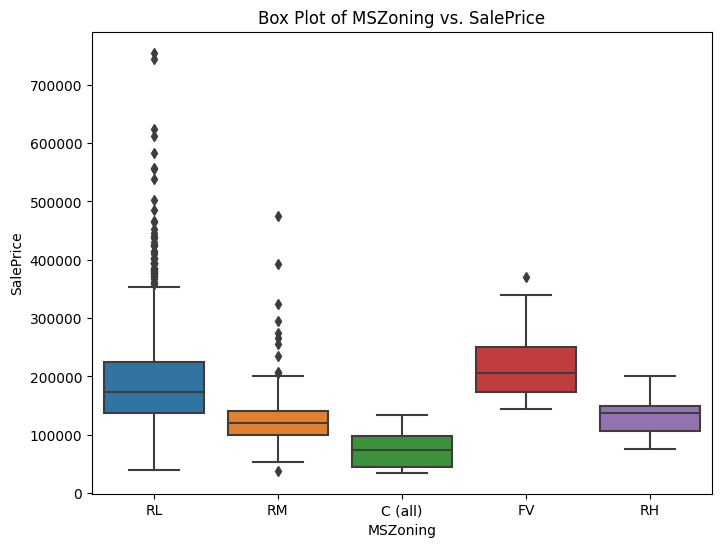

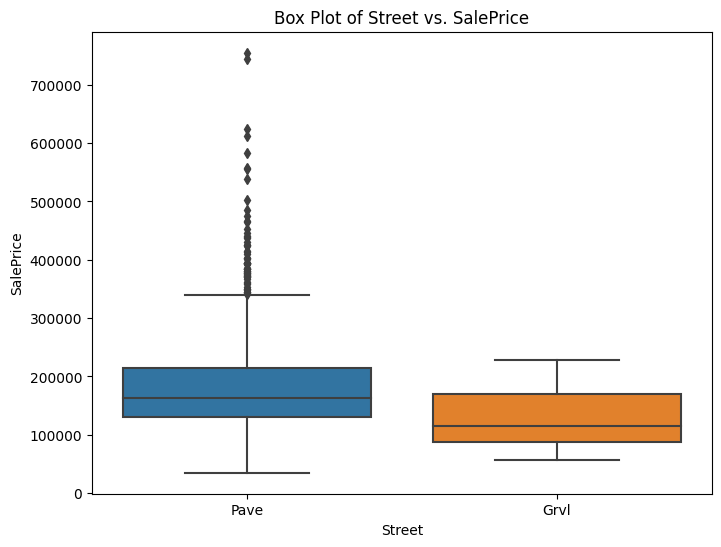

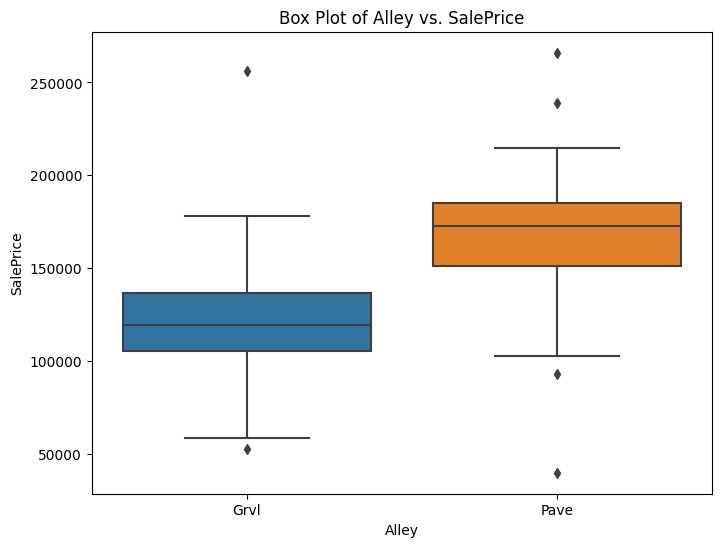

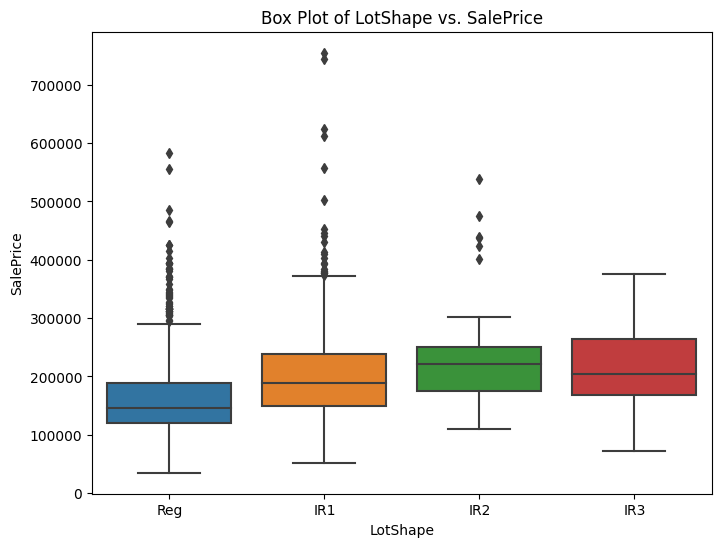

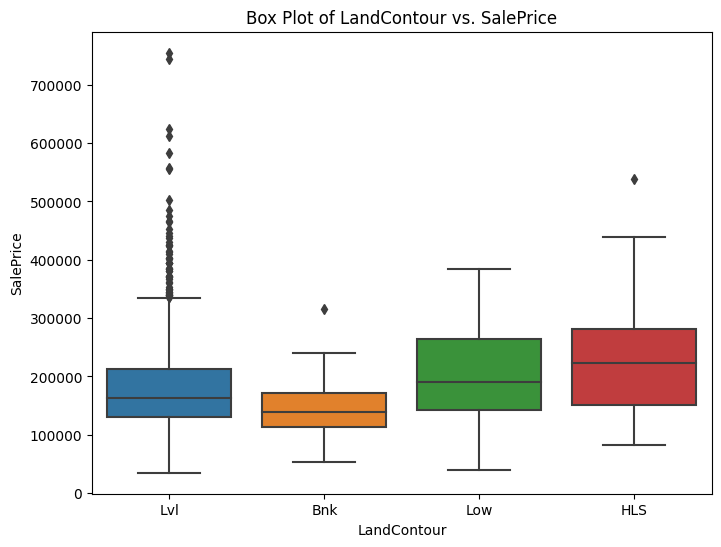

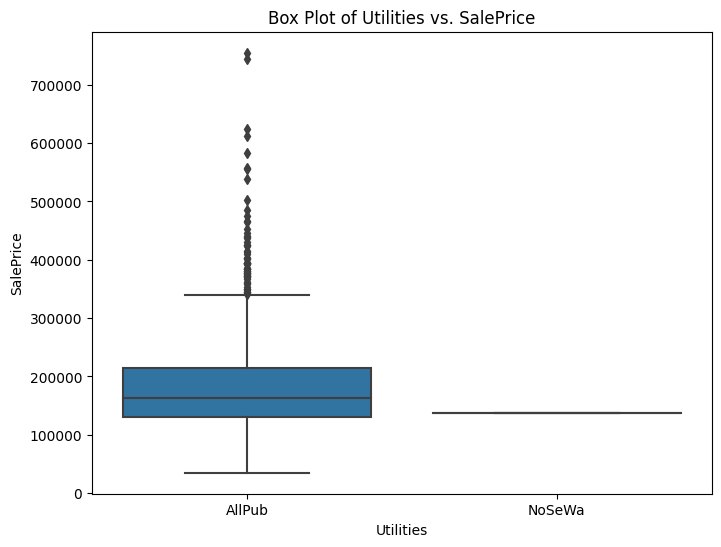

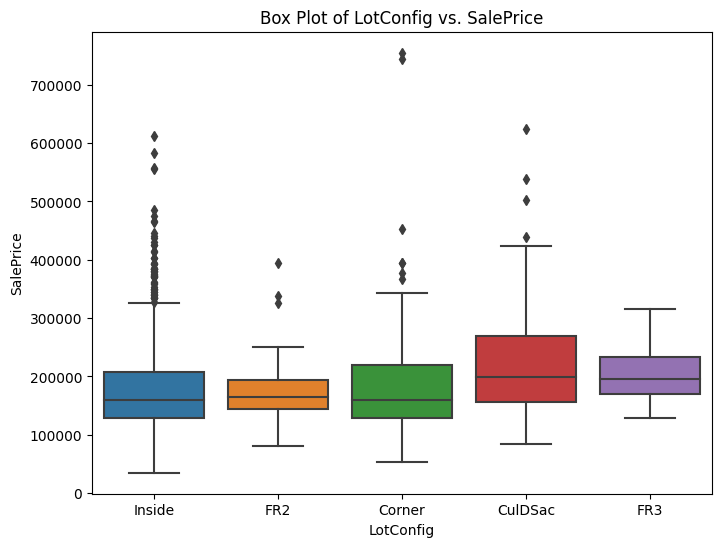

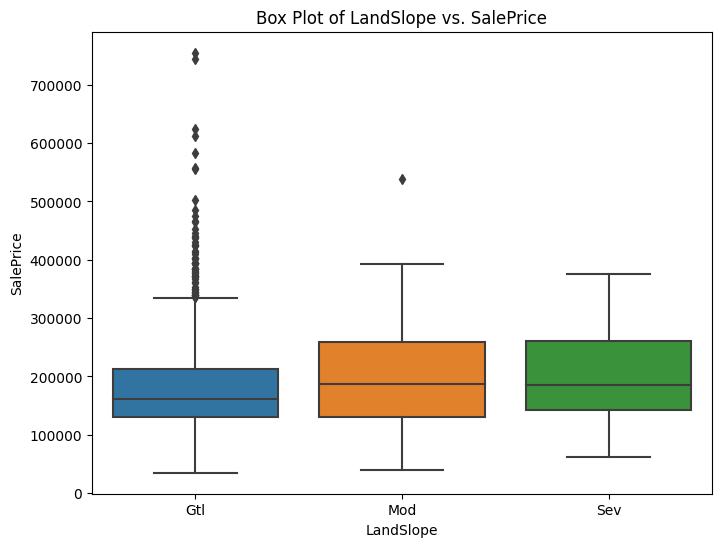

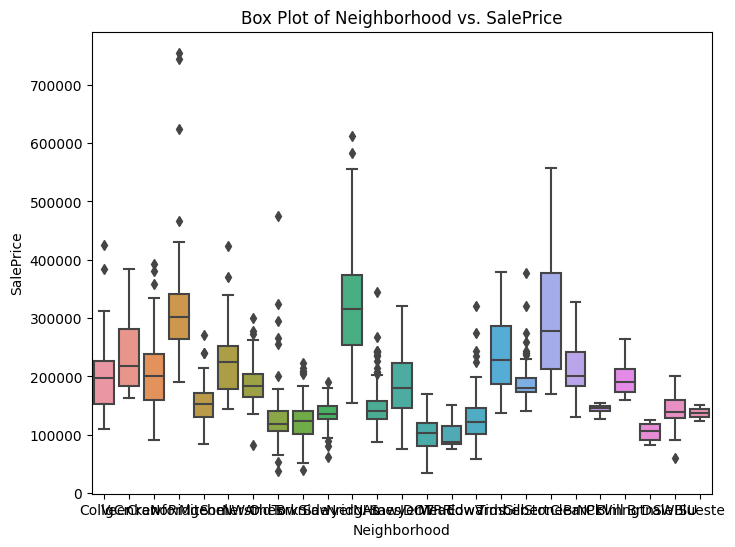

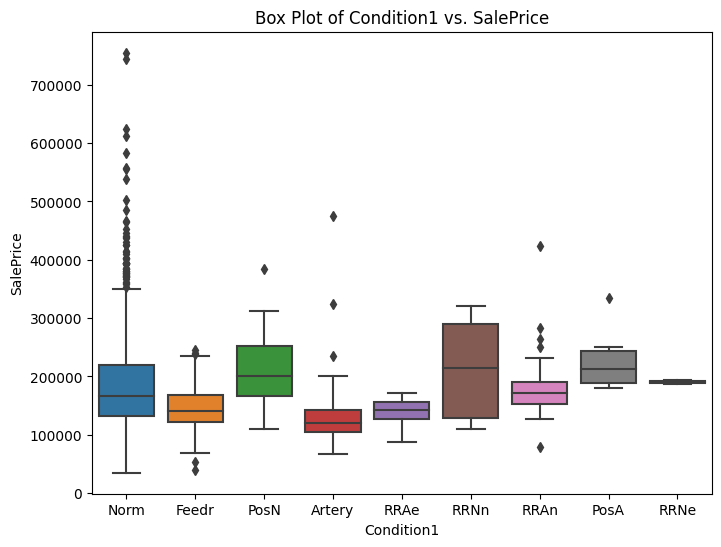

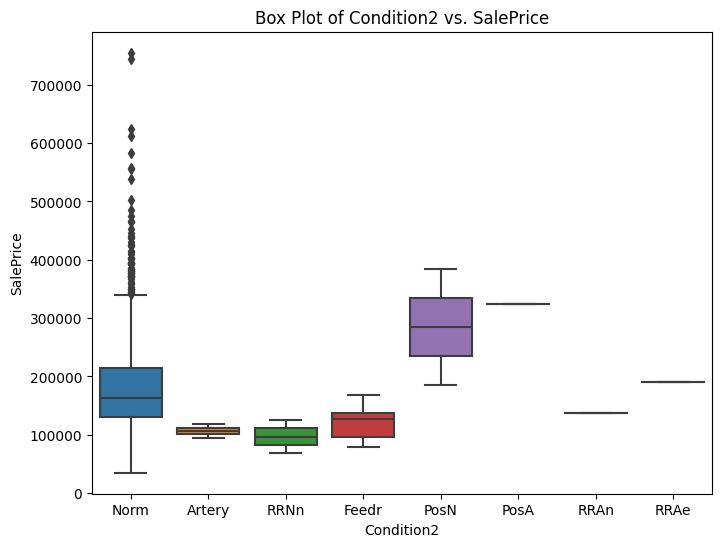

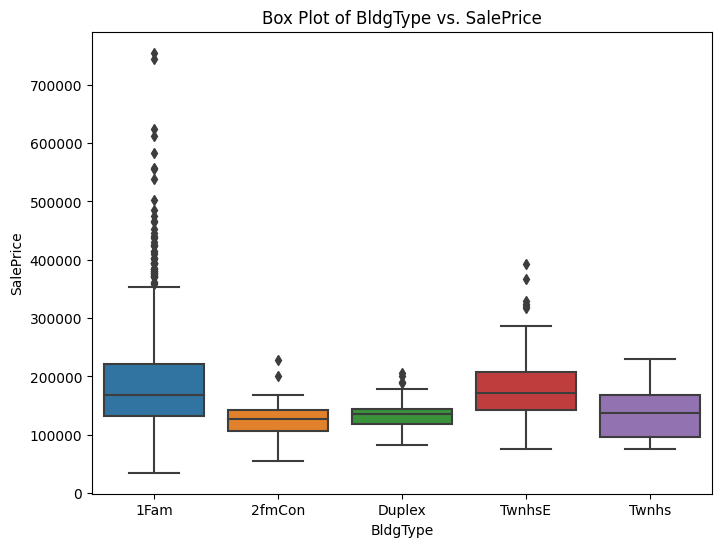

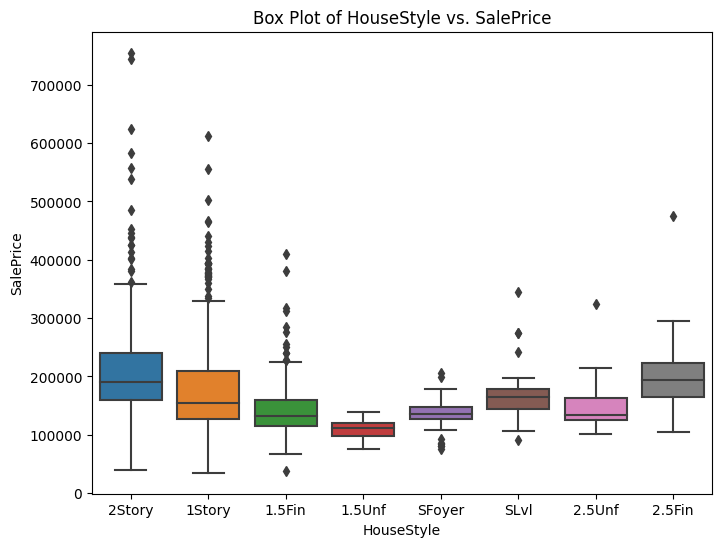

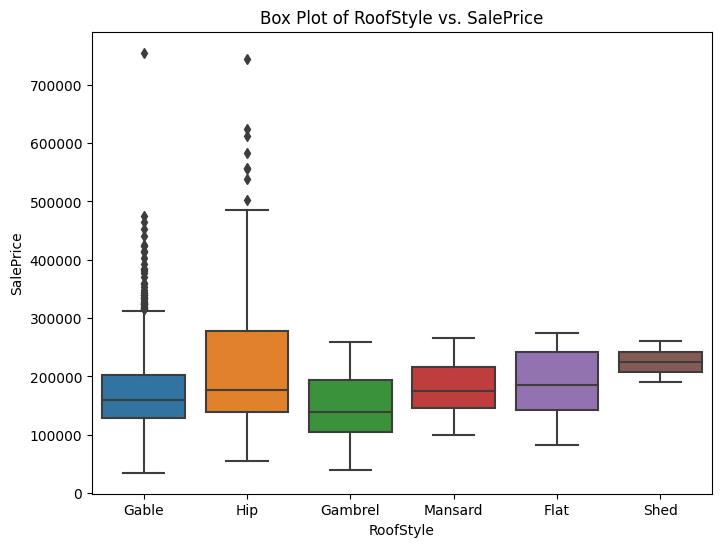

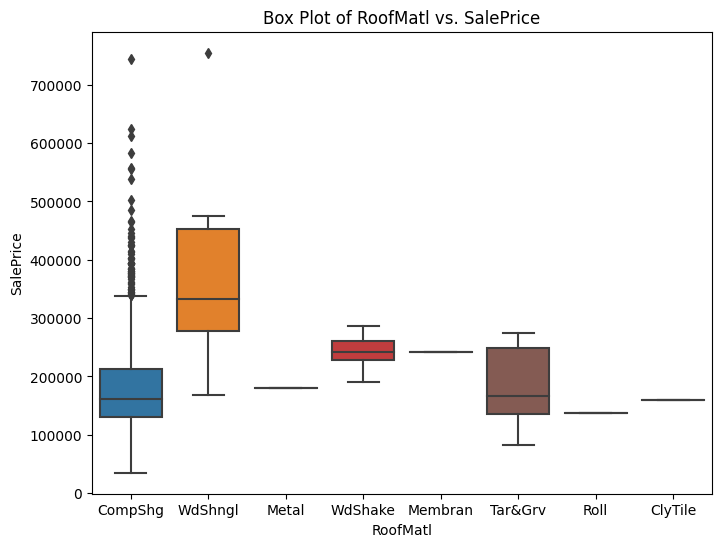

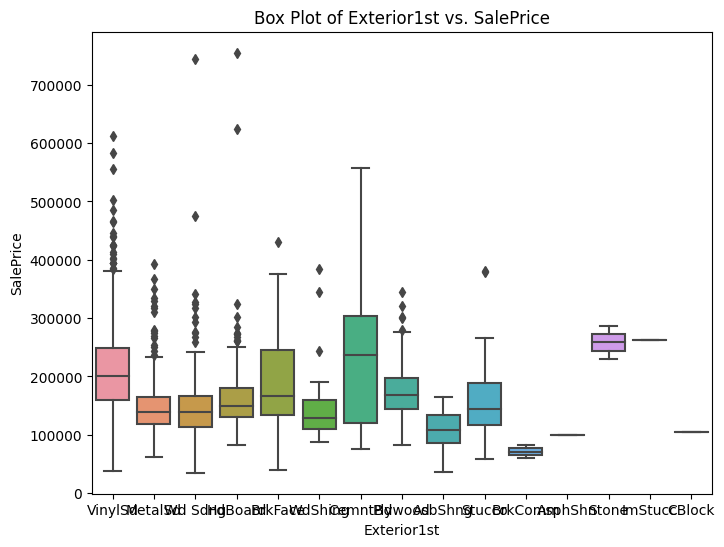

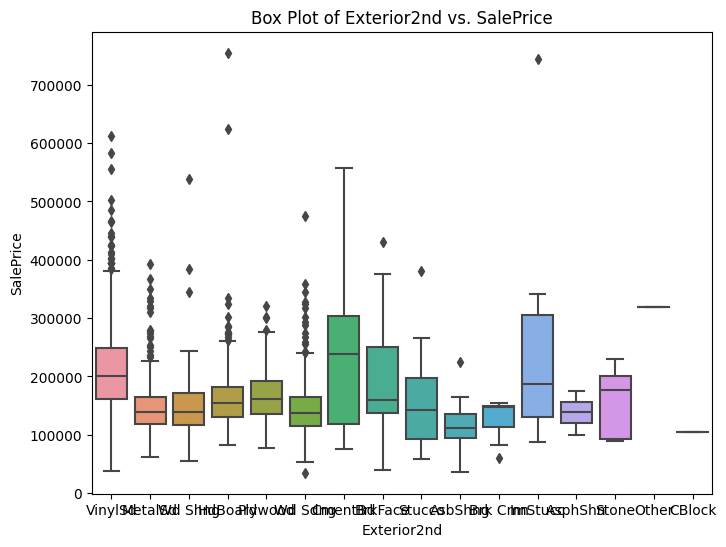

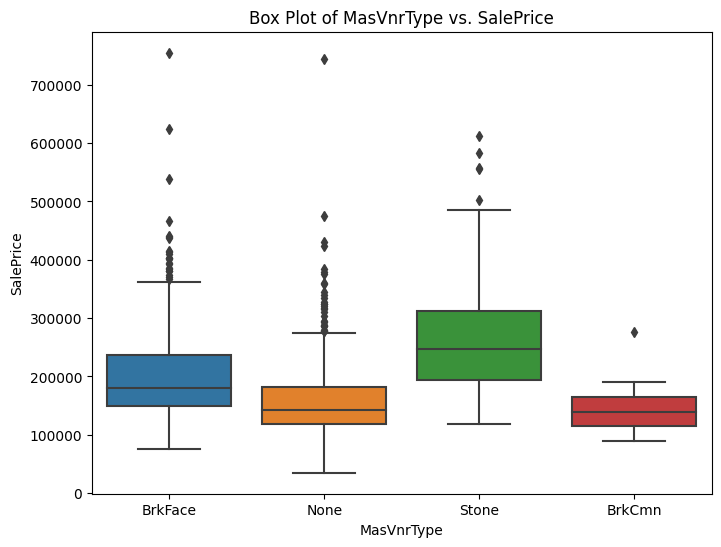

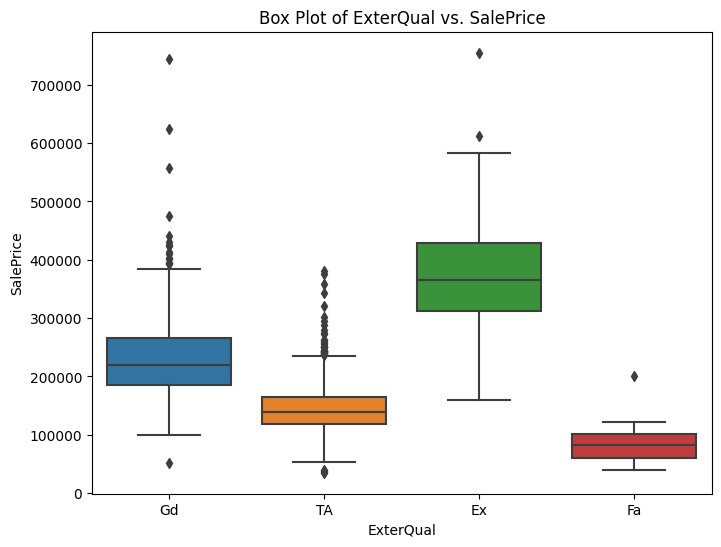

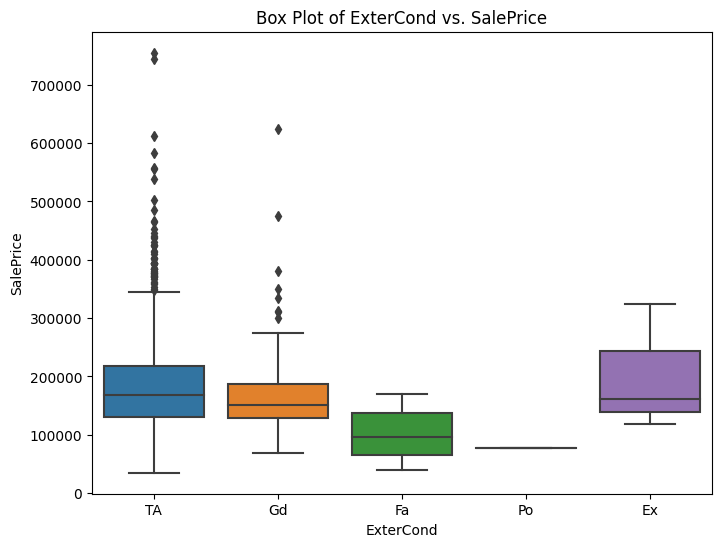

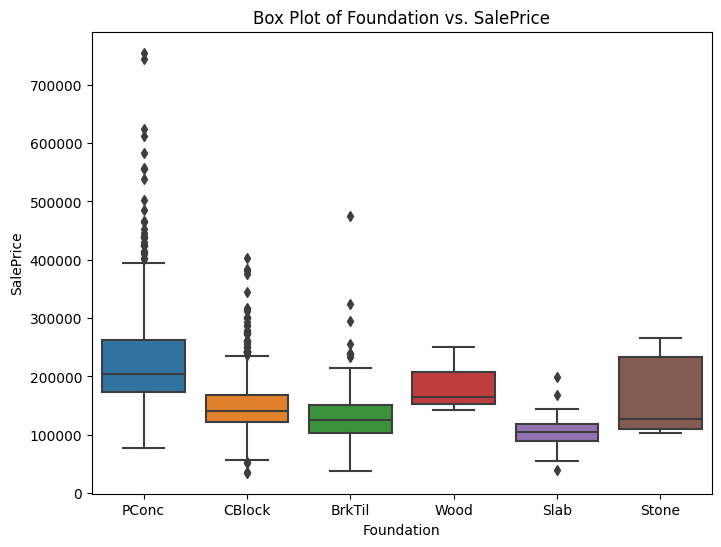

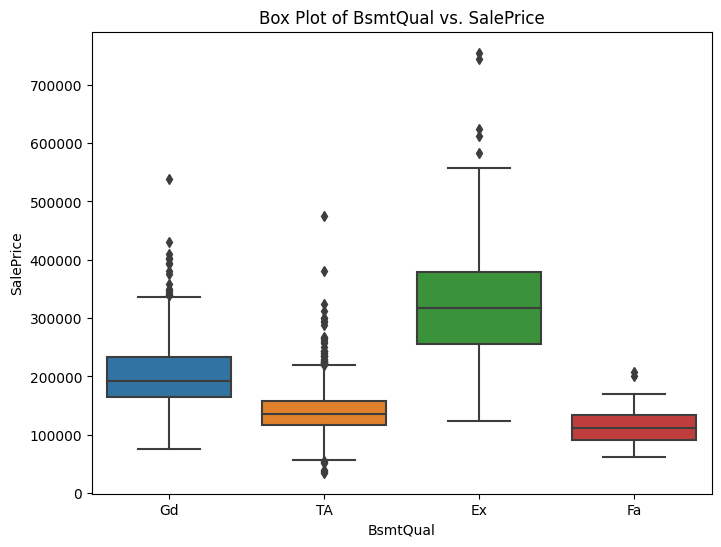

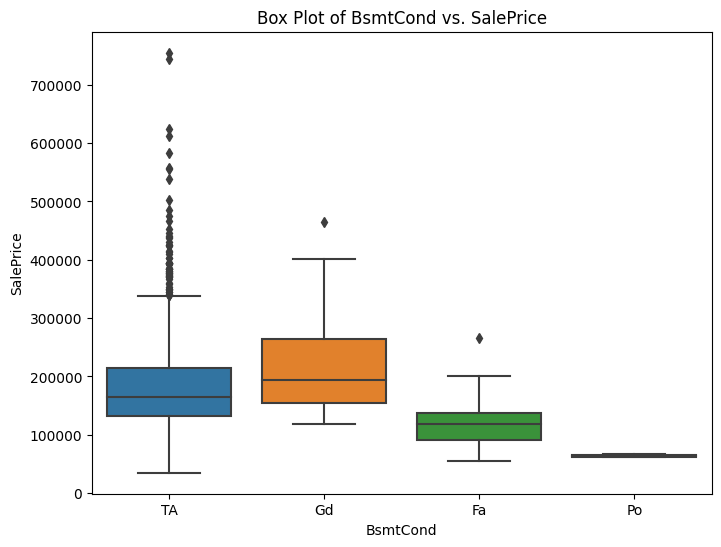

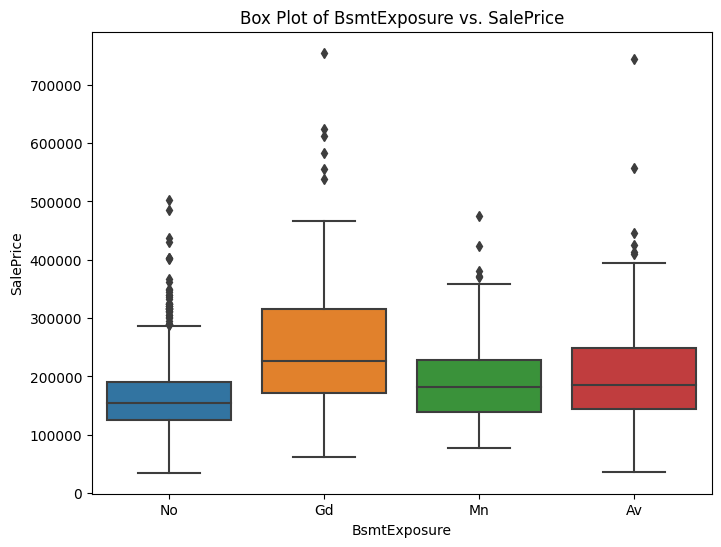

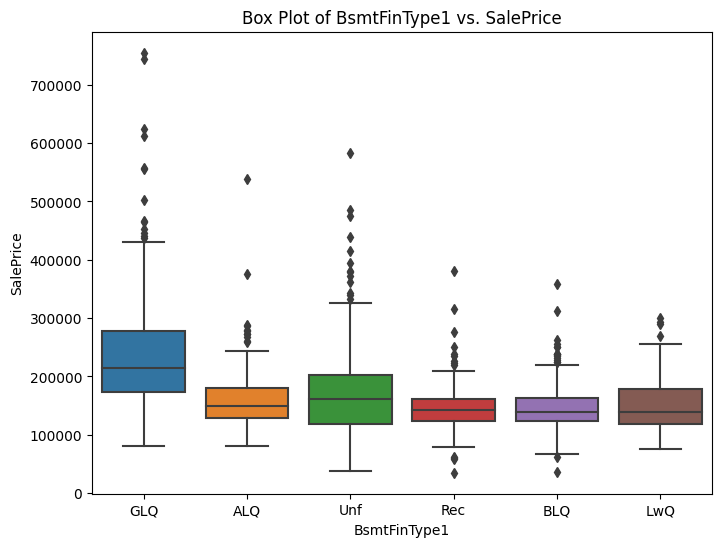

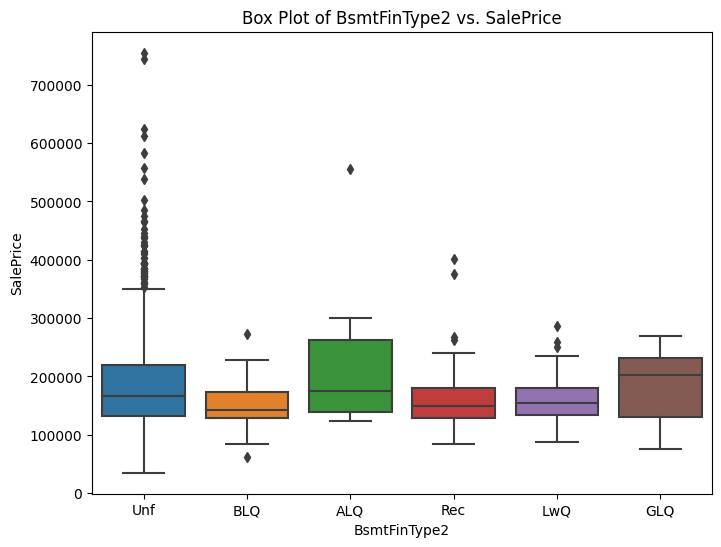

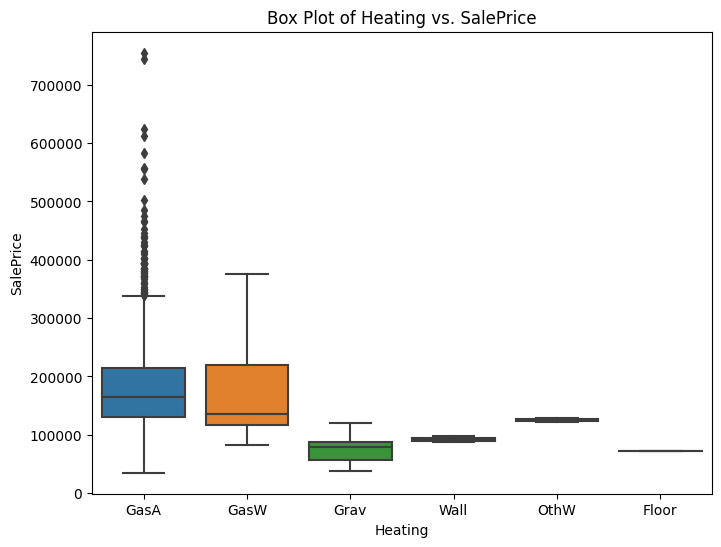

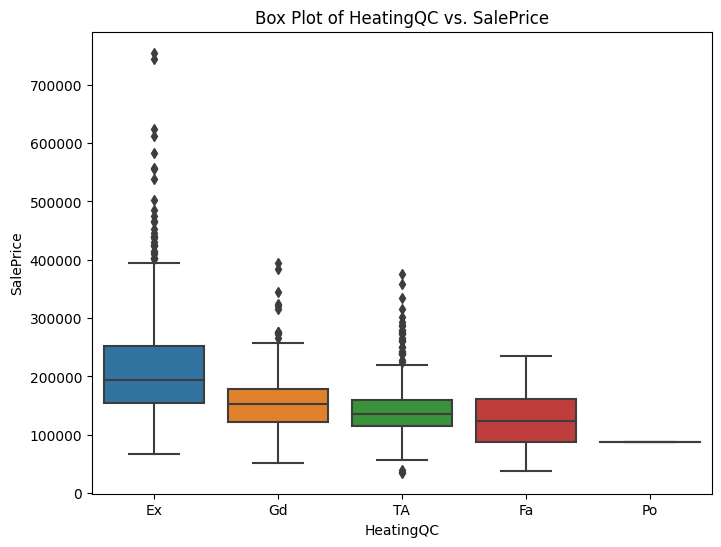

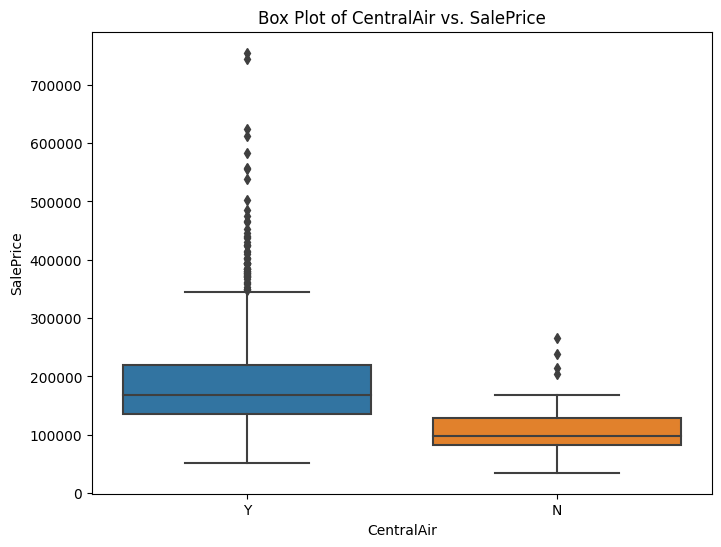

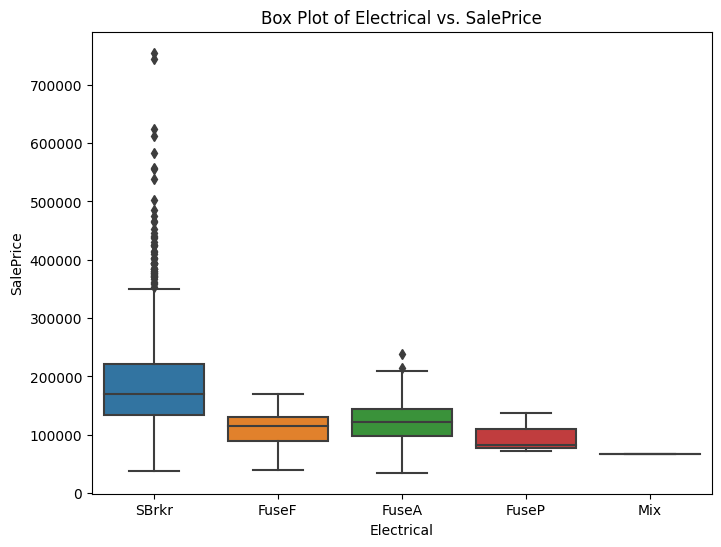

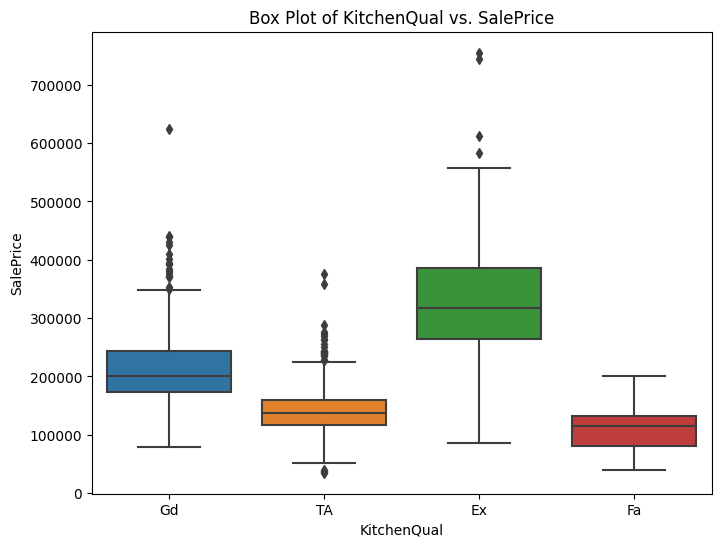

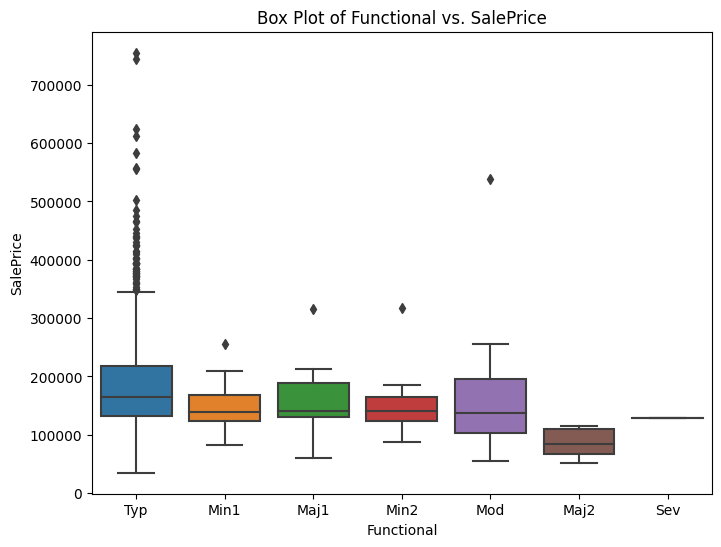

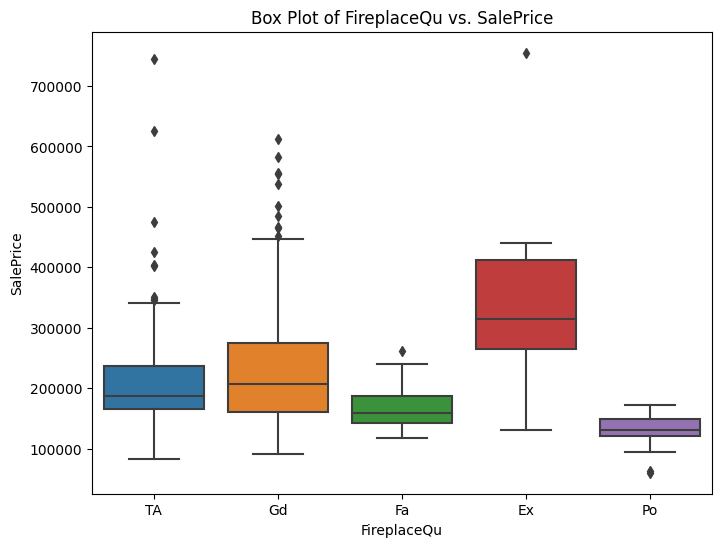

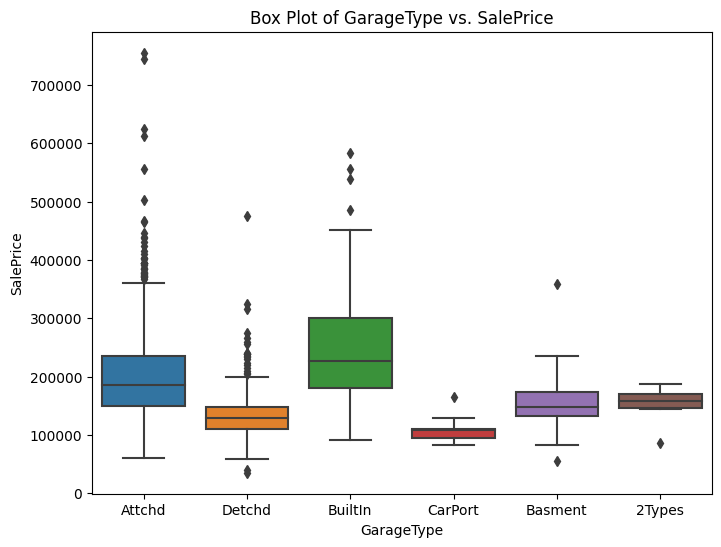

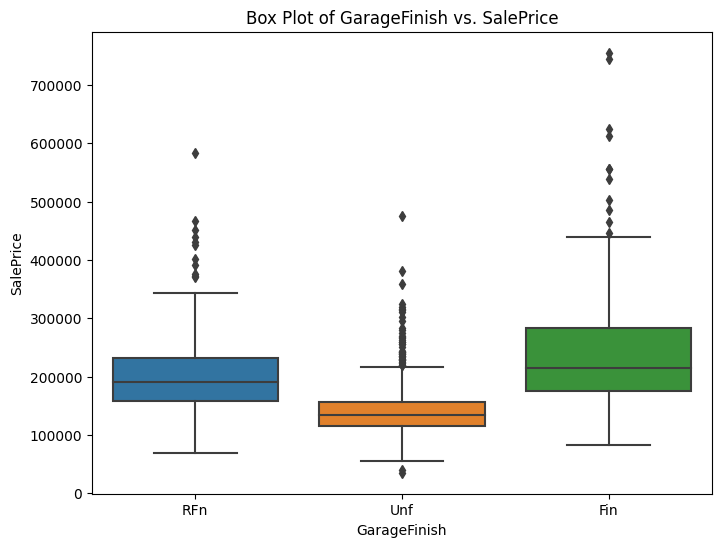

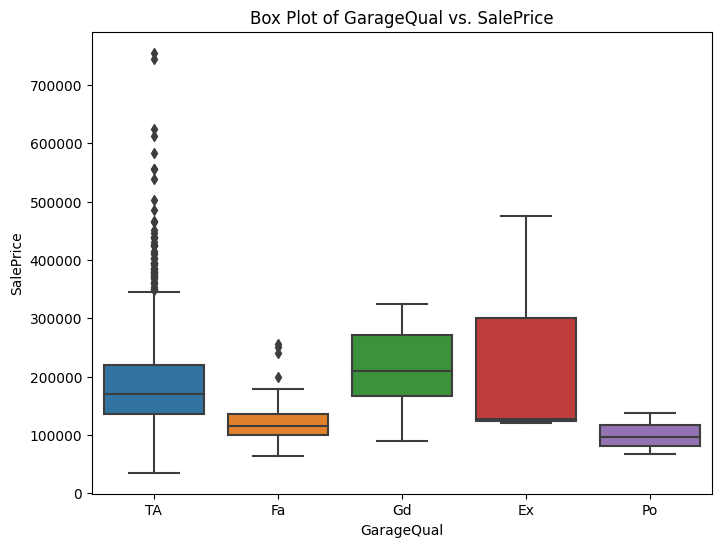

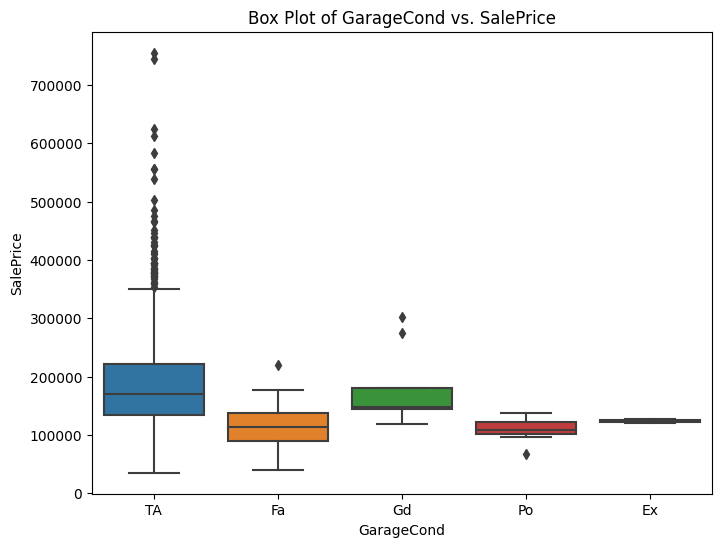

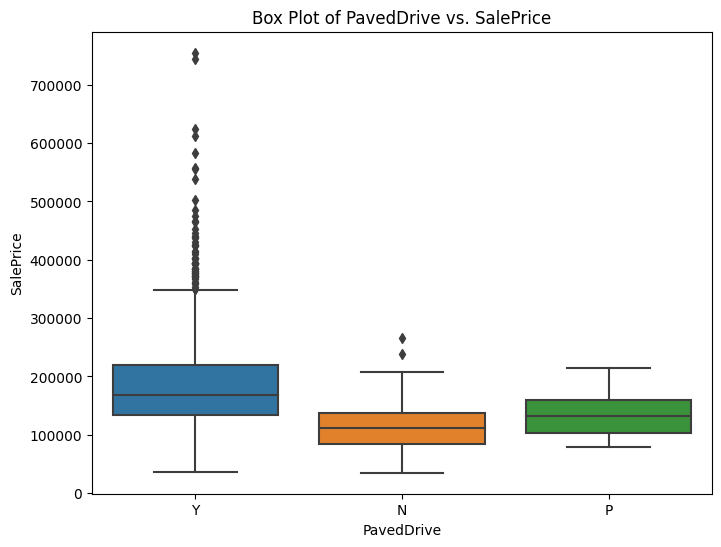

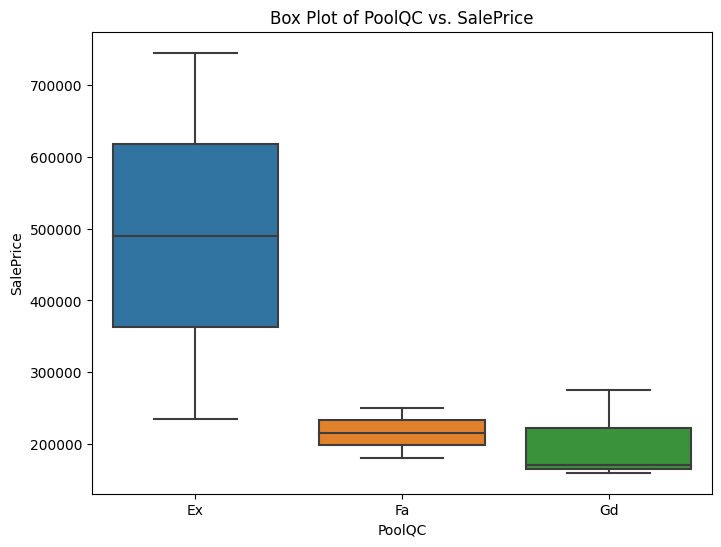

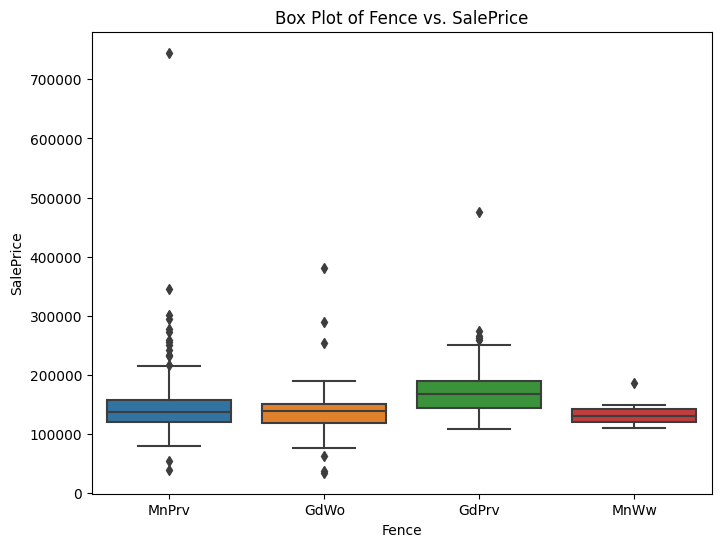

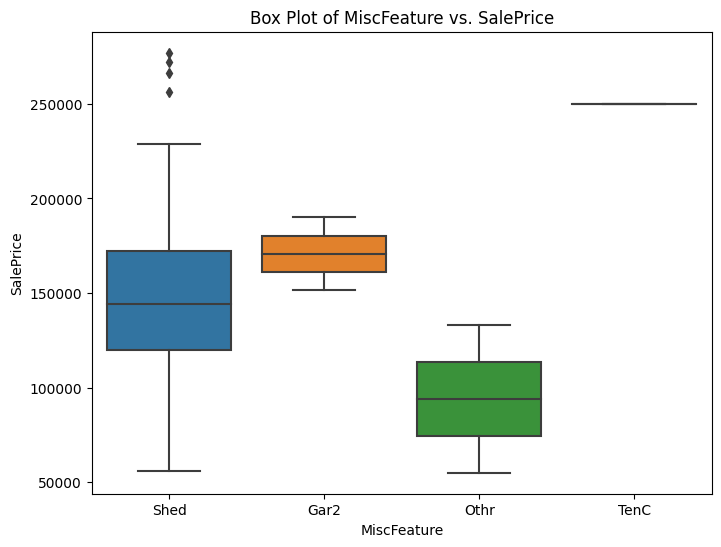

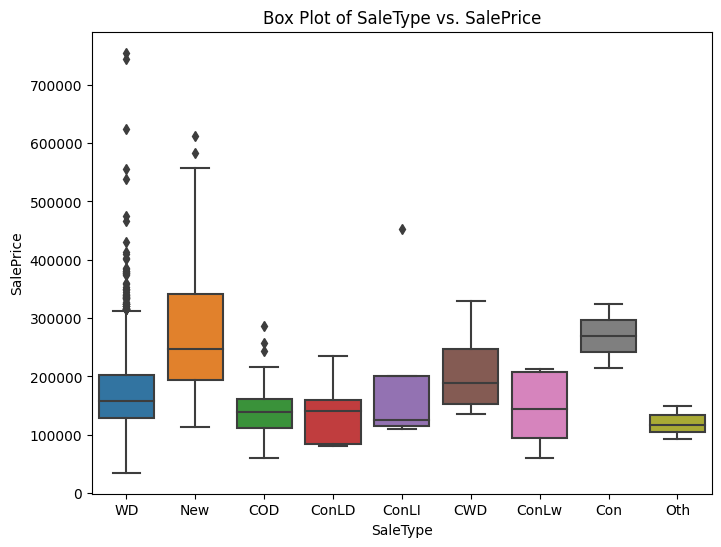

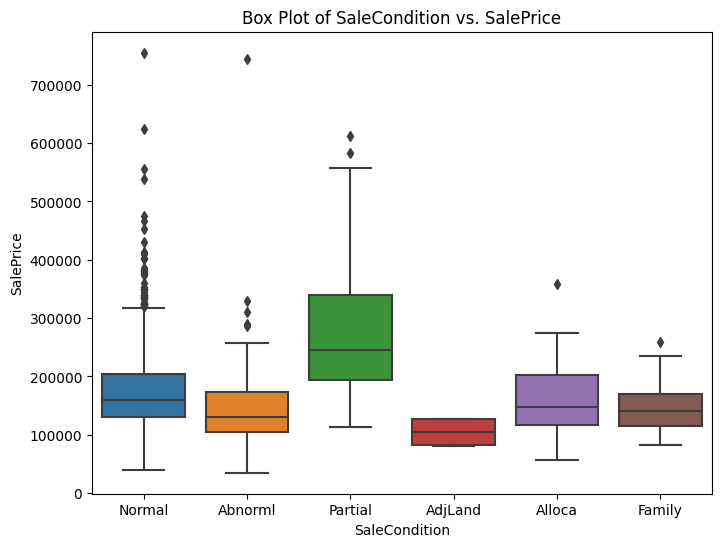

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x=feature, y='SalePrice', data=df)
    plt.title(f'Box Plot of {feature} vs. SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
categorical_cols_with_nullValues = df.loc[:, df.isnull().sum()> 0].select_dtypes(include=["object"]).columns.to_list()

In [ ]:
len(categorical_cols_with_nullValues)

16

In [ ]:
df[categorical_cols_with_nullValues].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

we can also analyze the number of categorical columns with lets say more than 50 null values and less than that

In [ ]:
cat_cols_with_fewer_nullValues = []
for i in categorical_cols_with_nullValues:
    if df[i].isnull().sum() < 50:
        cat_cols_with_fewer_nullValues.append(i)
        print(i, df[i].isnull().sum())
print("------------------------------------------------------")
cat_cols_with_more_nullValues = []
for i in categorical_cols_with_nullValues:
    if df[i].isnull().sum() > 50:
        cat_cols_with_more_nullValues.append(i)
        print(i, df[i].isnull().sum())

MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
------------------------------------------------------
Alley 1369
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

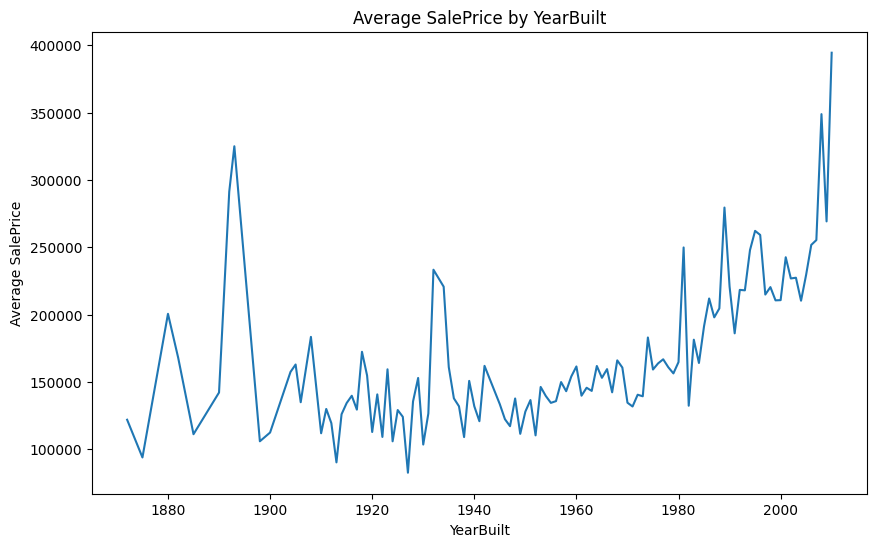

In [ ]:
avg_price_by_year = df.groupby('YearBuilt')['SalePrice'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values)
plt.xlabel('YearBuilt')
plt.ylabel('Average SalePrice')
plt.title('Average SalePrice by YearBuilt')
plt.show()

In [ ]:
datasets_to_clean = [train,test]

In [ ]:
for dataset in datasets_to_clean:
    dataset['Has Bsmt'] = 0
    for index,row in dataset.iterrows():
        if row['TotalBsmtSF'] > 0: # aka has basement
            dataset.at[index,'Has Bsmt'] = 1
            dataset.at[index,'TotalBsmtSF'] = np.log1p(dataset.at[index,'TotalBsmtSF'])


 mu = 6.93 and sigma = 0.36



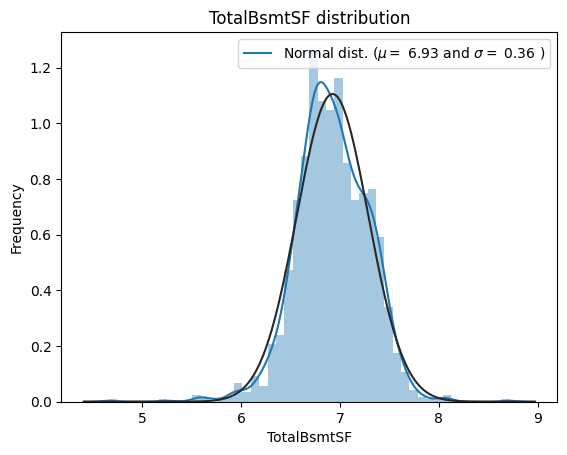

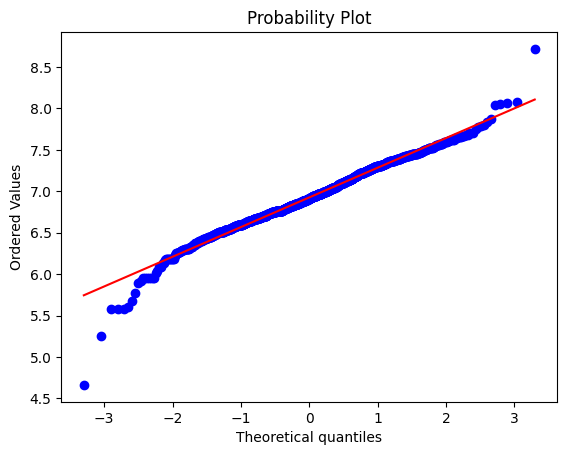

In [ ]:
filter_data = train[train['Has Bsmt'] == 1]['TotalBsmtSF']

sns.distplot(filter_data , fit=norm);
(mu, sigma) = norm.fit(filter_data)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('TotalBsmtSF distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(filter_data, plot=plt)
plt.show()

## Data Preparation

In [ ]:
datasets_to_clean = [train, test]

In [ ]:
missing_value_features = []

for dataset in datasets_to_clean:
    print("dataset")
    for col in dataset.columns:
        if dataset[col].isnull().any():
            print(f"{col}: {dataset[col].isnull().sum()}  {dataset[col].dtype}")
            if col not in missing_value_features:
                missing_value_features.append(col)
    print("-" * 50)

dataset
LotFrontage: 259  float64
Alley: 1369  object
MasVnrType: 8  object
MasVnrArea: 8  float64
BsmtQual: 37  object
BsmtCond: 37  object
BsmtExposure: 38  object
BsmtFinType1: 37  object
BsmtFinType2: 38  object
Electrical: 1  object
FireplaceQu: 690  object
GarageType: 81  object
GarageYrBlt: 81  float64
GarageFinish: 81  object
GarageQual: 81  object
GarageCond: 81  object
PoolQC: 1453  object
Fence: 1179  object
MiscFeature: 1406  object
--------------------------------------------------
dataset
MSZoning: 4  object
LotFrontage: 227  float64
Alley: 1352  object
Utilities: 2  object
Exterior1st: 1  object
Exterior2nd: 1  object
MasVnrType: 16  object
MasVnrArea: 15  float64
BsmtQual: 44  object
BsmtCond: 45  object
BsmtExposure: 44  object
BsmtFinType1: 42  object
BsmtFinSF1: 1  float64
BsmtFinType2: 42  object
BsmtFinSF2: 1  float64
BsmtUnfSF: 1  float64
TotalBsmtSF: 1  float64
BsmtFullBath: 2  float64
BsmtHalfBath: 2  float64
KitchenQual: 1  object
Functional: 2  object
Fireplac

Dealing with missing values in numerical variable

In [ ]:
for dataset in datasets_to_clean:
    for feature in missing_value_features:
        if dataset[feature].dtypes == 'float64':
            if 'Yr' in feature:
                dataset[feature] = pd.to_datetime(dataset[feature], format="%Y")
                dataset[feature].fillna(method='bfill', inplace=True) # fill the null year with previous year
            else:
                dataset[feature].fillna(dataset[feature].mean(), inplace=True)
        else:
            if 'Bsmt' in feature:  # for all Bsmt feature, NA means no basement
                dataset[feature].fillna('No Basement', inplace=True)
            elif 'Garage' in feature:  # for all Garage feature, NA means no Garage
                dataset[feature].fillna('No Garage', inplace=True)

In [ ]:
# Training dataset
train['Alley'].fillna('No alley', inplace=True) # NA means no alley
train['MasVnrType'].fillna('None', inplace=True)
train['Electrical'].fillna('Unknown', inplace=True)
train['FireplaceQu'].fillna('No fireplace', inplace=True) # description says NA mean no fireplace
train['PoolQC'].fillna('No pool', inplace=True) # same here
train['Fence'].fillna('No fence', inplace=True) # here
train['MiscFeature'].fillna('None', inplace=True) # here

# Testing dataset
test['Alley'].fillna('No alley', inplace=True)
test['MSZoning'].fillna('Unknown', inplace=True)
test['Utilities'].fillna('Unknown', inplace=True)
test['Exterior1st'].fillna('Unknown', inplace=True)
test['Exterior2nd'].fillna('Unknown', inplace=True)
test['MasVnrType'].fillna('None', inplace=True)
test['KitchenQual'].fillna('No kitchen', inplace=True)
test['Functional'].fillna('None', inplace=True)
test['FireplaceQu'].fillna('No fireplace', inplace=True)
test['PoolQC'].fillna('None', inplace=True)
test['Fence'].fillna('None', inplace=True)
test['MiscFeature'].fillna('None', inplace=True)
test['SaleType'].fillna('Normal', inplace=True)

In [ ]:
mssubclass_mapping = {
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '1-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

In [ ]:
train['MSSubClass'] = train['MSSubClass'].map(mssubclass_mapping)
test['MSSubClass'] = test['MSSubClass'].map(mssubclass_mapping)

In [ ]:
datasets = [train,test]

In [ ]:
for dataset in datasets:
    dataset['TotalSFArea'] = dataset['1stFlrSF'] + dataset['2ndFlrSF'] + dataset['TotalBsmtSF'] + dataset['GarageArea']

In [ ]:
train.head(2)

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   

      Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No alley      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No alley      Reg         Lvl    AllPub       FR2       Gtl      Veenker   

  Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm     1Fam     2Story            7            5   
1      Feedr       Norm     1Fam     1Story            6            8   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0     6.753438    GasA        Ex          Y      SBrkr       856       854   
1     7.141245    GasA        Ex          Y      SBrkr      1262         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   

   Fireplaces   FireplaceQu GarageType GarageYrBlt GarageFinish  GarageCars  \
0           0  No fireplace     Attchd  2003-01-01          RFn           2   
1           1            TA     Attchd  1976-01-01          RFn           2   

   GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548         TA         TA          Y           0           61   
1         460         TA         TA          Y         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence  \
0              0          0            0         0  No pool  No fence   
1              0          0            0         0  No pool  No fence   

  MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  \
0        None        0       2    2008       WD        Normal     208500   
1        None        0       5    2007       WD        Normal     181500   

   Has Bsmt  TotalSFArea  
0         1  2264.753438  
1         1  1729.141245

In [ ]:
cols = [col for col in train if train[col].dtypes == 'datetime64[ns]']

for c in cols:
    for dataset in datasets:
        dataset[c] = dataset[c].dt.year.astype(float)

In [ ]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train[feature]=train['YrSold']-train[feature]
    test[feature]=test['YrSold']-test[feature]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
cols = [col for col in train.columns if train[col].dtypes == 'object']

for c in cols:
    for dataset in datasets:
        ord = OrdinalEncoder()
        ord.fit(list(dataset[c].values.reshape(-1, 1)))
        dataset[c] = ord.transform(list(dataset[c].values.reshape(-1, 1)))

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = [col for col in train.columns if col not in ['Id', 'SalePrice'] and pd.api.types.is_numeric_dtype(train[col])]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply Min-Max scaling to the numerical columns
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [ ]:
train.head(2)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1    0.642857      0.75     0.150685  0.033420     1.0    0.5       1.0   
1   2    0.214286      0.75     0.202055  0.038795     1.0    0.5       1.0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0          1.0        0.0        1.0        0.0      0.208333       0.250   
1          1.0        0.0        0.5        0.0      1.000000       0.125   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0    0.285714       0.0    0.714286     0.666667        0.500   0.036765   
1    0.285714       0.0    0.285714     0.555556        0.875   0.227941   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.098361        0.2  0.142857     0.857143     0.866667    0.333333   
1      0.524590        0.2  0.142857     0.571429     0.533333    0.666667   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0      0.1225   0.666667        1.0         0.4       0.5       1.0   
1      0.0000   1.000000        1.0         0.2       0.5       1.0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0          0.75      0.333333    0.125089           1.0         0.0   
1          0.25      0.000000    0.173281           1.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.774668      0.2        0.0         1.0         0.8   
1   0.121575     0.819153      0.2        0.0         1.0         0.8   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.119780  0.413559           0.0   0.259231      0.333333           0.0   
1  0.212942  0.000000           0.0   0.174830      0.000000           0.5   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     1.000000      0.333333   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0         1.0    0.000000          0.6    0.166667     0.064220      0.666667   
1         1.0    0.333333          1.0    0.166667     0.302752      0.666667   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0         0.5    0.386460         1.0         1.0         1.0    0.000000   
1         0.5    0.324401         1.0         1.0         1.0    0.347725   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0     0.111517            0.0        0.0          0.0       0.0     1.0   
1     0.000000            0.0        0.0          0.0       0.0     1.0   

   Fence  MiscFeature  MiscVal    MoSold  YrSold  SaleType  SaleCondition  \
0    1.0         0.25      0.0  0.090909    0.50       1.0            0.8   
1    1.0         0.25      0.0  0.363636    0.25       1.0            0.8   

   SalePrice  Has Bsmt  TotalSFArea  
0     208500       1.0     0.286687  
1     181500       1.0     0.207157

In [ ]:
numerical_cols = [col for col in test.columns if col not in ['Id', 'SalePrice'] and pd.api.types.is_numeric_dtype(test[col])]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply Min-Max scaling to the numerical columns
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])

## Feature Selection

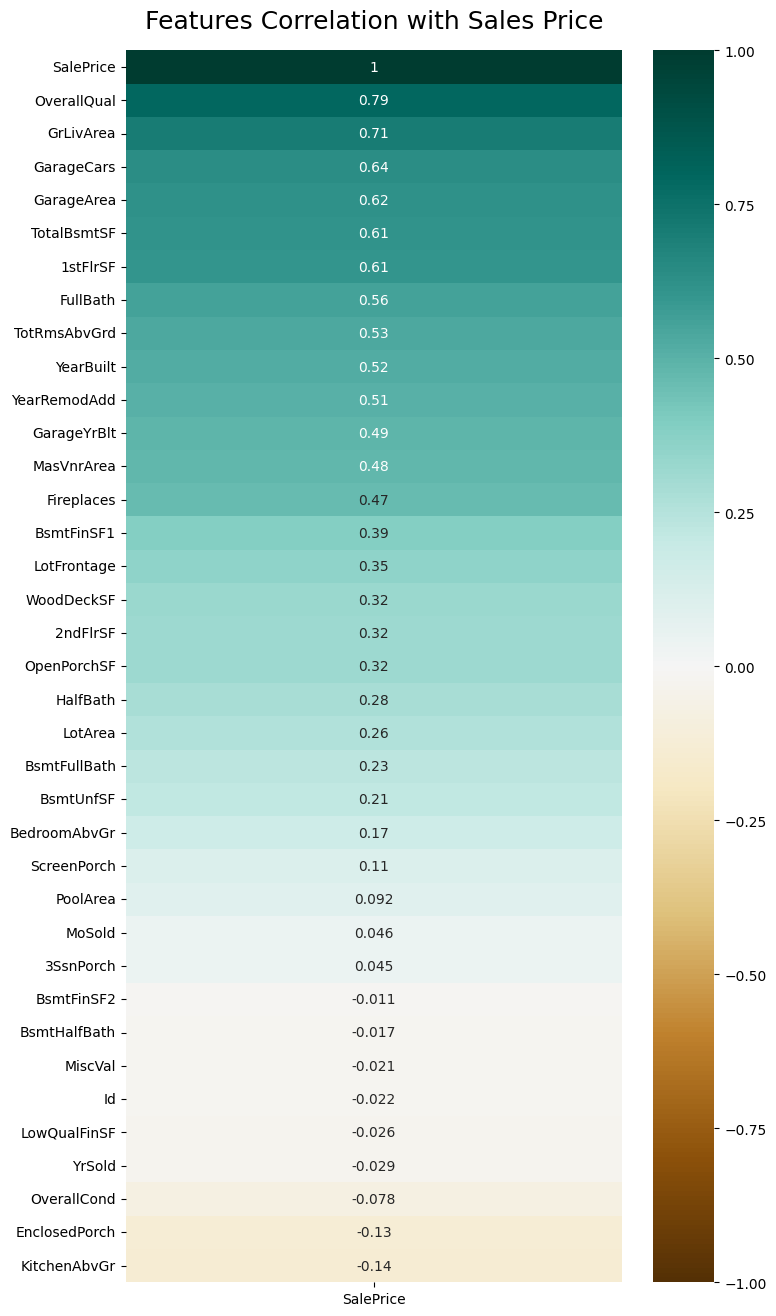

In [ ]:
corr_mat = df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

plt.figure(figsize=(8, 16))
heatmap = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlation with Sales Price', fontdict={'fontsize':18}, pad=16);

## Model Training

In [ ]:
#we dont really need the id column as it is merely an identifier and doesnt contribute to the result
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [ ]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']
# Split the data into training (70%), testing (15%), and validation (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

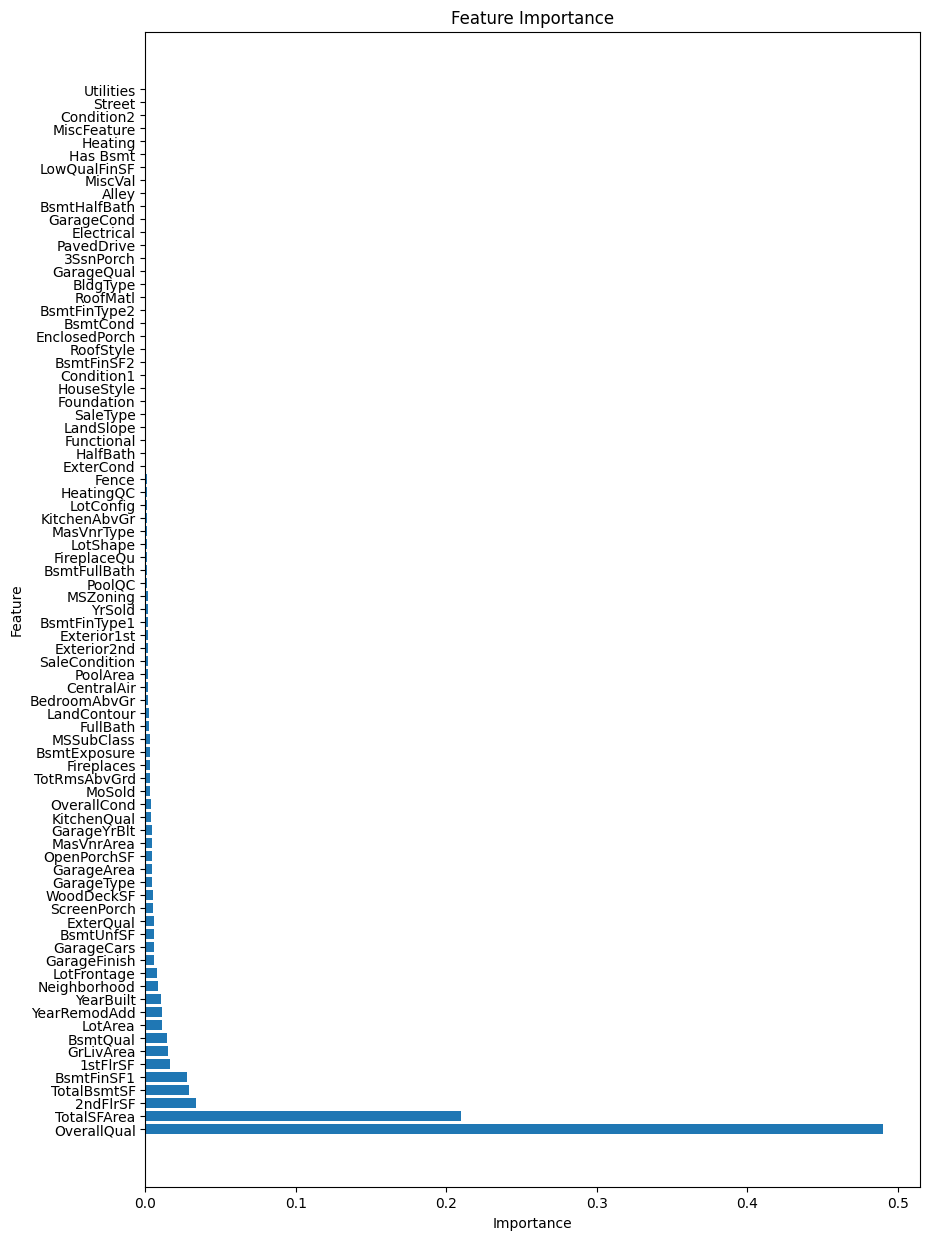

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
importances_df['Feature'].to_list()

['OverallQual',
 'TotalSFArea',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'GrLivArea',
 'BsmtQual',
 'LotArea',
 'YearRemodAdd',
 'YearBuilt',
 'Neighborhood',
 'LotFrontage',
 'GarageFinish',
 'GarageCars',
 'BsmtUnfSF',
 'ExterQual',
 'ScreenPorch',
 'WoodDeckSF',
 'GarageType',
 'GarageArea',
 'OpenPorchSF',
 'MasVnrArea',
 'GarageYrBlt',
 'KitchenQual',
 'OverallCond',
 'MoSold',
 'TotRmsAbvGrd',
 'Fireplaces',
 'BsmtExposure',
 'MSSubClass',
 'FullBath',
 'LandContour',
 'BedroomAbvGr',
 'CentralAir',
 'PoolArea',
 'SaleCondition',
 'Exterior2nd',
 'Exterior1st',
 'BsmtFinType1',
 'YrSold',
 'MSZoning',
 'PoolQC',
 'BsmtFullBath',
 'FireplaceQu',
 'LotShape',
 'MasVnrType',
 'KitchenAbvGr',
 'LotConfig',
 'HeatingQC',
 'Fence',
 'ExterCond',
 'HalfBath',
 'Functional',
 'LandSlope',
 'SaleType',
 'Foundation',
 'HouseStyle',
 'Condition1',
 'BsmtFinSF2',
 'RoofStyle',
 'EnclosedPorch',
 'BsmtCond',
 'BsmtFinType2',
 'RoofMatl',
 'BldgType',
 'GarageQual',
 '3SsnPor

In [ ]:
X_train = X_train.drop(['MasVnrType',
 'KitchenAbvGr',
 'LotConfig',
 'HeatingQC',
 'Fence',
 'ExterCond',
 'HalfBath',
 'Functional',
 'LandSlope',
 'SaleType',
 'Foundation',
 'HouseStyle',
 'Condition1',
 'BsmtFinSF2',
 'RoofStyle',
 'EnclosedPorch',
 'BsmtCond',
 'BsmtFinType2',
 'RoofMatl',
 'BldgType',
 'GarageQual',
 '3SsnPorch',
 'PavedDrive',
 'Electrical',
 'GarageCond',
 'BsmtHalfBath',
 'Alley',
 'MiscVal',
 'LowQualFinSF',
 'Has Bsmt',
 'Heating',
 'MiscFeature',
 'Condition2',
 'Street',
 'Utilities'] , axis = 1)
X_test = X_test.drop(['MasVnrType',
 'KitchenAbvGr',
 'LotConfig',
 'HeatingQC',
 'Fence',
 'ExterCond',
 'HalfBath',
 'Functional',
 'LandSlope',
 'SaleType',
 'Foundation',
 'HouseStyle',
 'Condition1',
 'BsmtFinSF2',
 'RoofStyle',
 'EnclosedPorch',
 'BsmtCond',
 'BsmtFinType2',
 'RoofMatl',
 'BldgType',
 'GarageQual',
 '3SsnPorch',
 'PavedDrive',
 'Electrical',
 'GarageCond',
 'BsmtHalfBath',
 'Alley',
 'MiscVal',
 'LowQualFinSF',
 'Has Bsmt',
 'Heating',
 'MiscFeature',
 'Condition2',
 'Street',
 'Utilities'] , axis = 1)

In [ ]:
X_val = X_val.drop(['MasVnrType',
 'KitchenAbvGr',
 'LotConfig',
 'HeatingQC',
 'Fence',
 'ExterCond',
 'HalfBath',
 'Functional',
 'LandSlope',
 'SaleType',
 'Foundation',
 'HouseStyle',
 'Condition1',
 'BsmtFinSF2',
 'RoofStyle',
 'EnclosedPorch',
 'BsmtCond',
 'BsmtFinType2',
 'RoofMatl',
 'BldgType',
 'GarageQual',
 '3SsnPorch',
 'PavedDrive',
 'Electrical',
 'GarageCond',
 'BsmtHalfBath',
 'Alley',
 'MiscVal',
 'LowQualFinSF',
 'Has Bsmt',
 'Heating',
 'MiscFeature',
 'Condition2',
 'Street',
 'Utilities'] , axis = 1)

### Ridge Regression and Lasso Regression

In [ ]:
alphas = [{
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]
}]

In [ ]:
ridge_model = Ridge()
lasso_model = Lasso()

In [ ]:
ridge_grid_search = GridSearchCV(ridge_model, alphas, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search = GridSearchCV(lasso_model, alphas, scoring='neg_mean_squared_error', cv=5)

In [ ]:
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                    100, 500, 1000]}],
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha_ridge = ridge_grid_search.best_params_['alpha']
best_alpha_lasso = lasso_grid_search.best_params_['alpha']

In [ ]:
ridge_model = Ridge(alpha=best_alpha_ridge)
lasso_model = Lasso(alpha=best_alpha_lasso)

In [ ]:
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=500)

In [ ]:
ridge_val_predictions = ridge_model.predict(X_val)
lasso_val_predictions = lasso_model.predict(X_val)

In [ ]:
#ridge_test_predictions = ridge_model.predict(X_test)
#lasso_test_predictions = lasso_model.predict(X_test)

In [ ]:
ridge_val_error = mean_squared_error(y_val, ridge_val_predictions)
lasso_val_error = mean_squared_error(y_val, lasso_val_predictions)

In [ ]:
ridge_test_error = mean_squared_error(y_test, ridge_test_predictions)
lasso_test_error = mean_squared_error(y_test, lasso_test_predictions)

In [ ]:
alphas = [alpha['alpha'] for alpha in ridge_grid_search.cv_results_['params']]
ridge_errors = -ridge_grid_search.cv_results_['mean_test_score']
lasso_errors = -lasso_grid_search.cv_results_['mean_test_score']

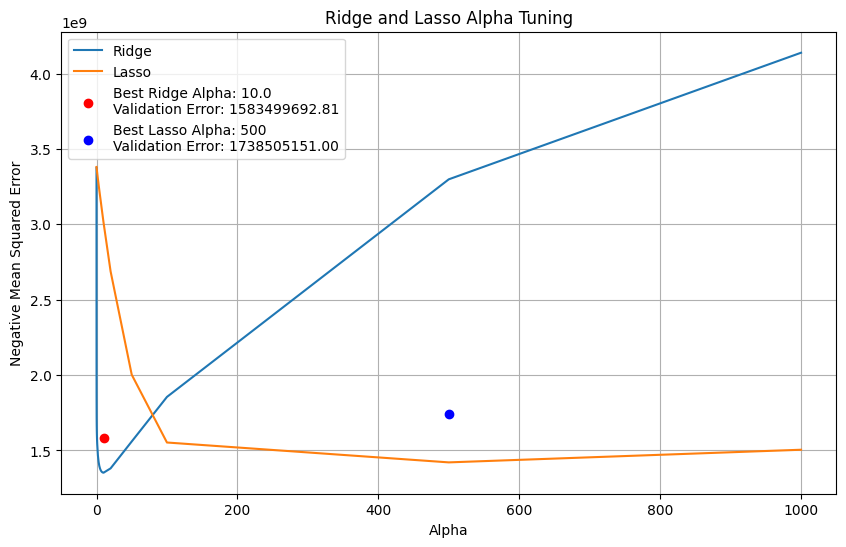

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_errors, label="Ridge")
plt.plot(alphas, lasso_errors, label="Lasso")
plt.scatter(best_alpha_ridge, ridge_val_error, marker='o', color='red', label=f"Best Ridge Alpha: {best_alpha_ridge}\nValidation Error: {ridge_val_error:.2f}")
plt.scatter(best_alpha_lasso, lasso_val_error, marker='o', color='blue', label=f"Best Lasso Alpha: {best_alpha_lasso}\nValidation Error: {lasso_val_error:.2f}")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Ridge and Lasso Alpha Tuning')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Print the best alpha values and test errors
print("Best Ridge Alpha:", best_alpha_ridge)
print("Best Lasso Alpha:", best_alpha_lasso)
print("Ridge Validation Error:", ridge_val_error)
print("Lasso Validation Error:", lasso_val_error)
print("Ridge Test Error:", ridge_test_error)
print("Lasso Test Error:", lasso_test_error)

Best Ridge Alpha: 10.0
Best Lasso Alpha: 500
Ridge Validation Error: 1583499692.812233
Lasso Validation Error: 1738505150.9996834
Ridge Test Error: 814916044.5161237
Lasso Test Error: 861147201.118192


In [ ]:
print(f'The Ridge Regression Score {ridge_model.score(X_test,y_test)}')
print(f'The Lasso Regression Score {lasso_model.score(X_test,y_test)}')

The Ridge Regression Score 0.8702575243640456
The Lasso Regression Score 0.8628970793839403


In [ ]:
ridge_model.predict(X_test.iloc[1:2,:])

array([117337.27602547])

### Basic Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val),verbose=1)

Epoch 1/10
32/32 [==============================] - 2s 17ms/step - loss: 38891249664.0000 - mae: 181308.2969 - val_loss: 37991362560.0000 - val_mae: 174301.5781
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 38880477184.0000 - mae: 181278.4375 - val_loss: 37971357696.0000 - val_mae: 174244.1250
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 38841720832.0000 - mae: 181171.7969 - val_loss: 37911990272.0000 - val_mae: 174073.5469
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 38745292800.0000 - mae: 180904.7344 - val_loss: 37779963904.0000 - val_mae: 173693.5781
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 38551703552.0000 - mae: 180374.3750 - val_loss: 37536636928.0000 - val_mae: 172991.0469
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 38222073856.0000 - mae: 179454.2188 - val_loss: 37138325504.0000 - val_mae: 171834.8750
Epoch 7/10
32/32 [=====================

In [ ]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


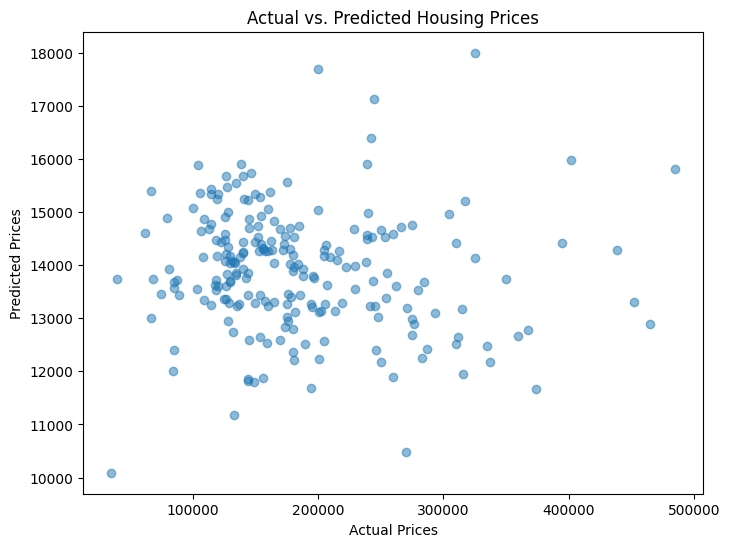

In [ ]:
# Plot actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.show()

### Simple Random Forest Classifier

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:

rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 623596612.95
R-squared: 0.90


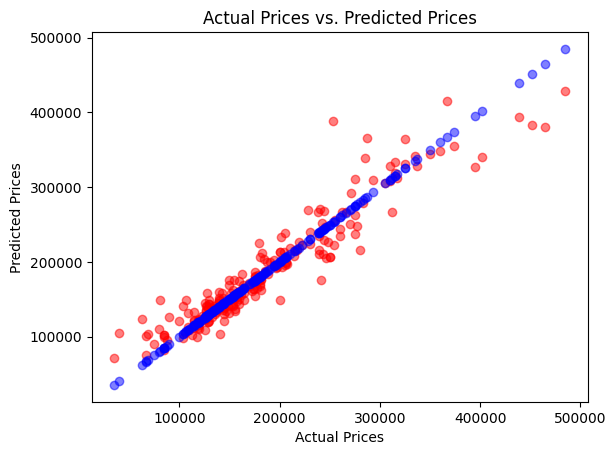

In [ ]:

# Plot the predicted vs. actual prices
plt.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Original')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

Ridge Validation Error: 1583499692.812233

Lasso Validation Error: 1738505150.9996834

Ridge Test Error: 814916044.5161237

Lasso Test Error: 861147201.118192

Random Forest:

Mean Squared Error: 623596612.95

R-squared: 0.90


In [ ]:
#therefore according to this the random forest classifier works better

### SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm_regressor = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = svm_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6702437853.386653
R-squared: -0.06709259898160136
